In [1]:
import csv
from datetime import datetime
import plotly.graph_objs as go
from plotly.offline import iplot 
from IPython.display import Image, display
import os

In [2]:
measurements = list()

with open("data2.csv","r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row['bt1'] is '':
            continue
        measurements.append(row)
print(f"Example: {measurements[0]}")

for m in measurements:
    #print(f"{m['bt1']}, {m['bt2']}, {m['btn']}")
    m['total_build'] = int(m['bt1']) +  int(m['bt2']) +  int(m['btn'])

Example: OrderedDict([('date', '2020-05-11'), ('source', 'op-nl2'), ('quantile', '0.80'), ('timeout', '1500'), ('server', 'onion'), ('circlen', '3'), ('fp1', '8623F7E1'), ('fp2', '303509AB'), ('fpn', '47A83EC4'), ('cw1', '35500'), ('cw2', '64000'), ('cwn', '24300'), ('bt1', '80'), ('bt2', '90'), ('btn', '200'), ('start2req', '3000'), ('req2fb', '340')])


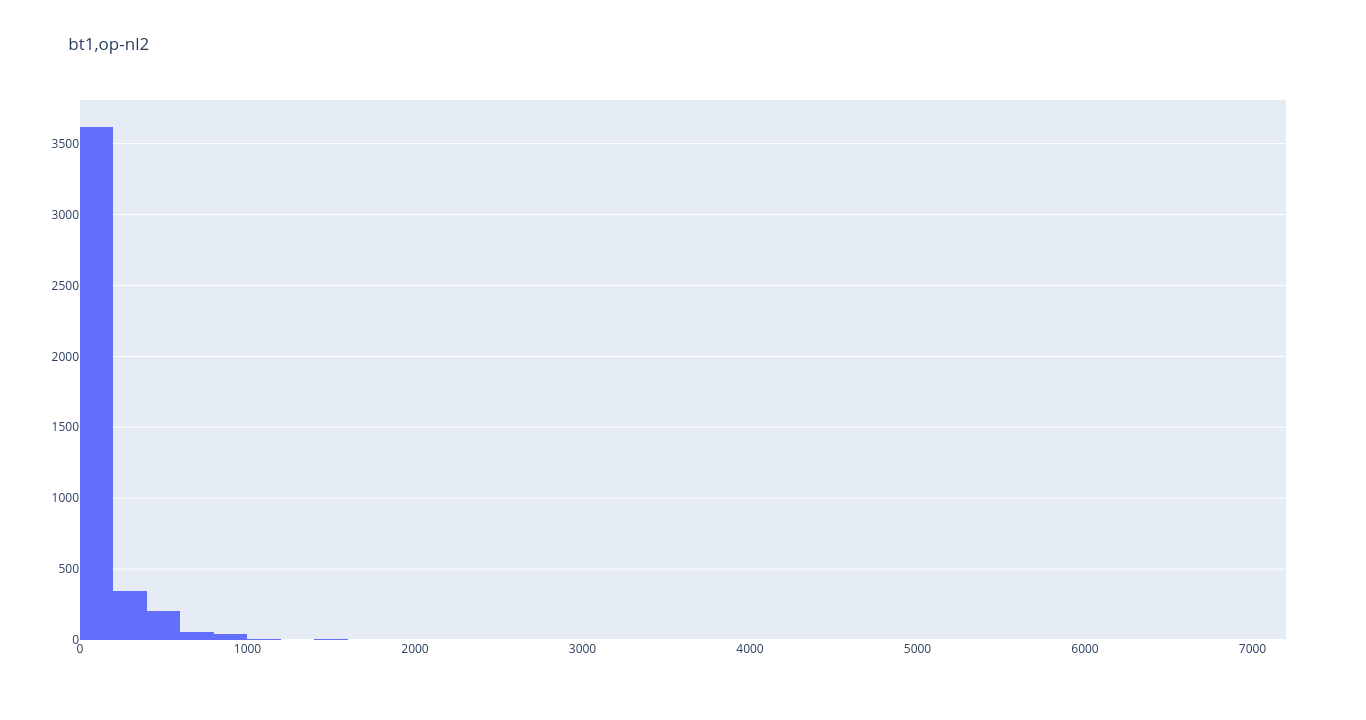

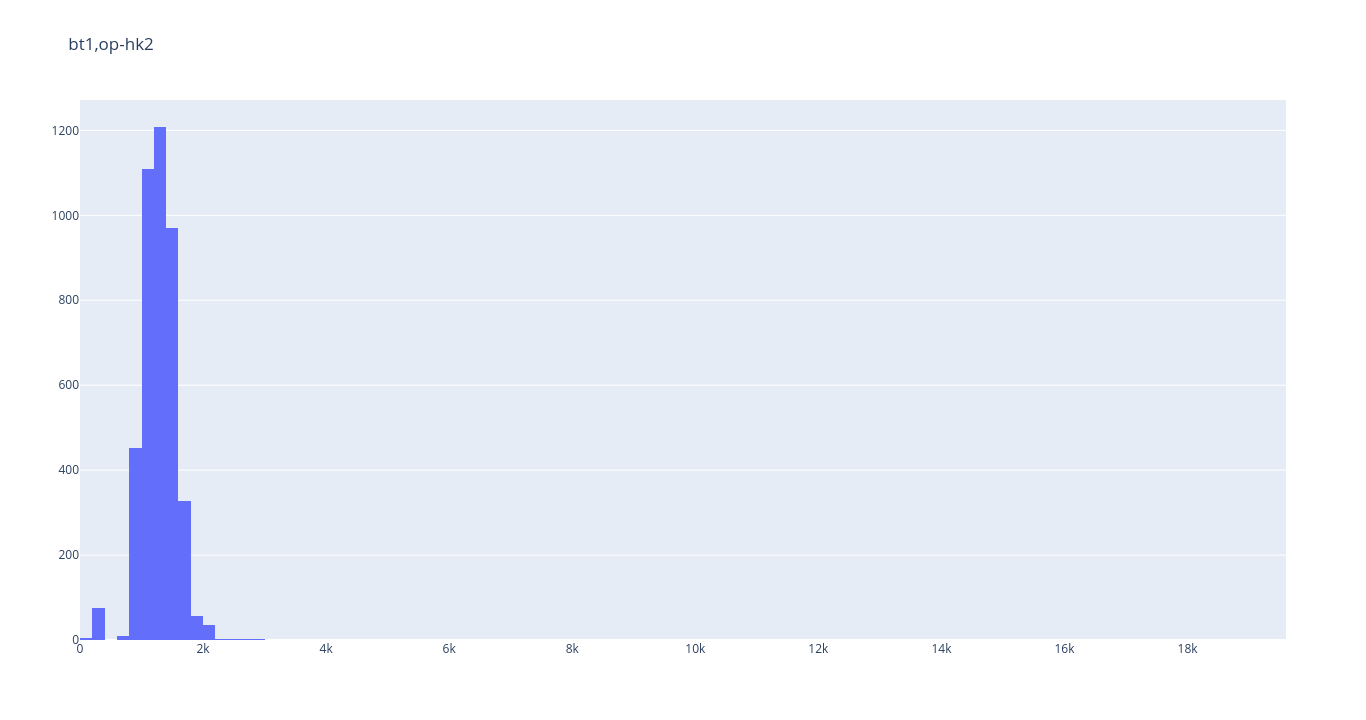

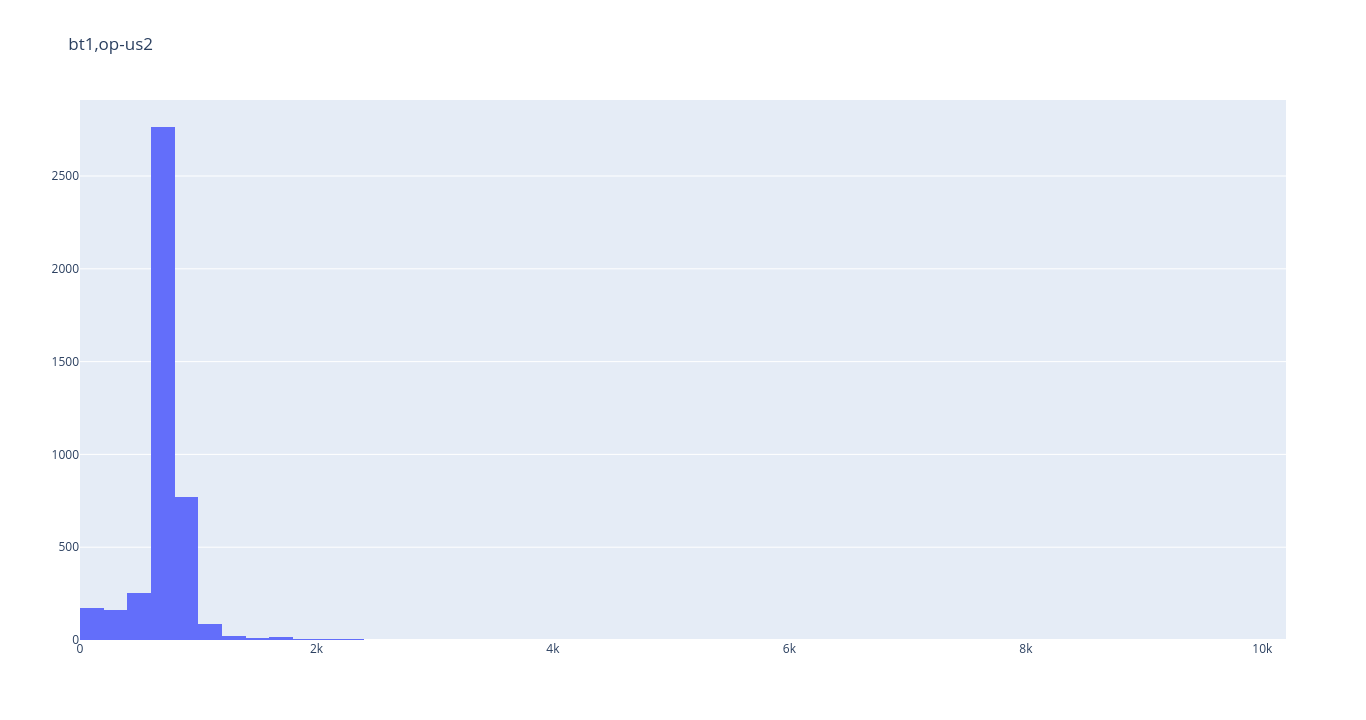

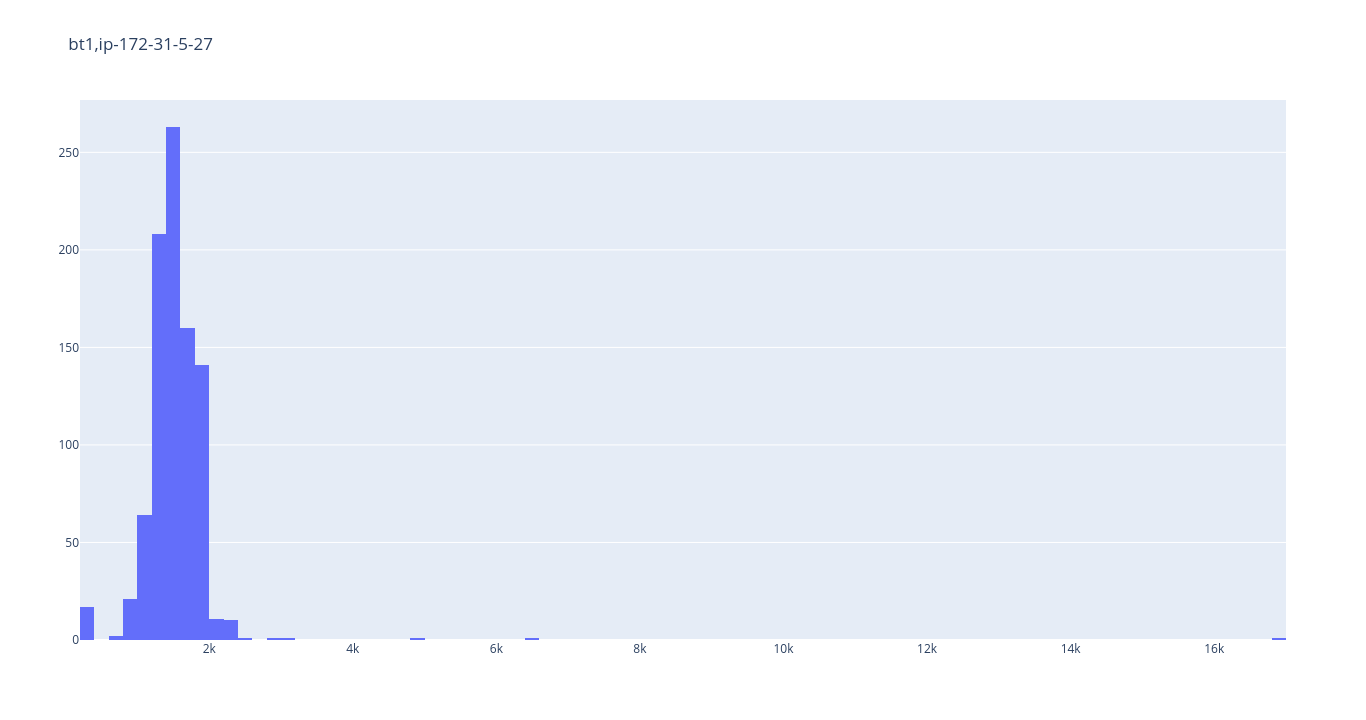

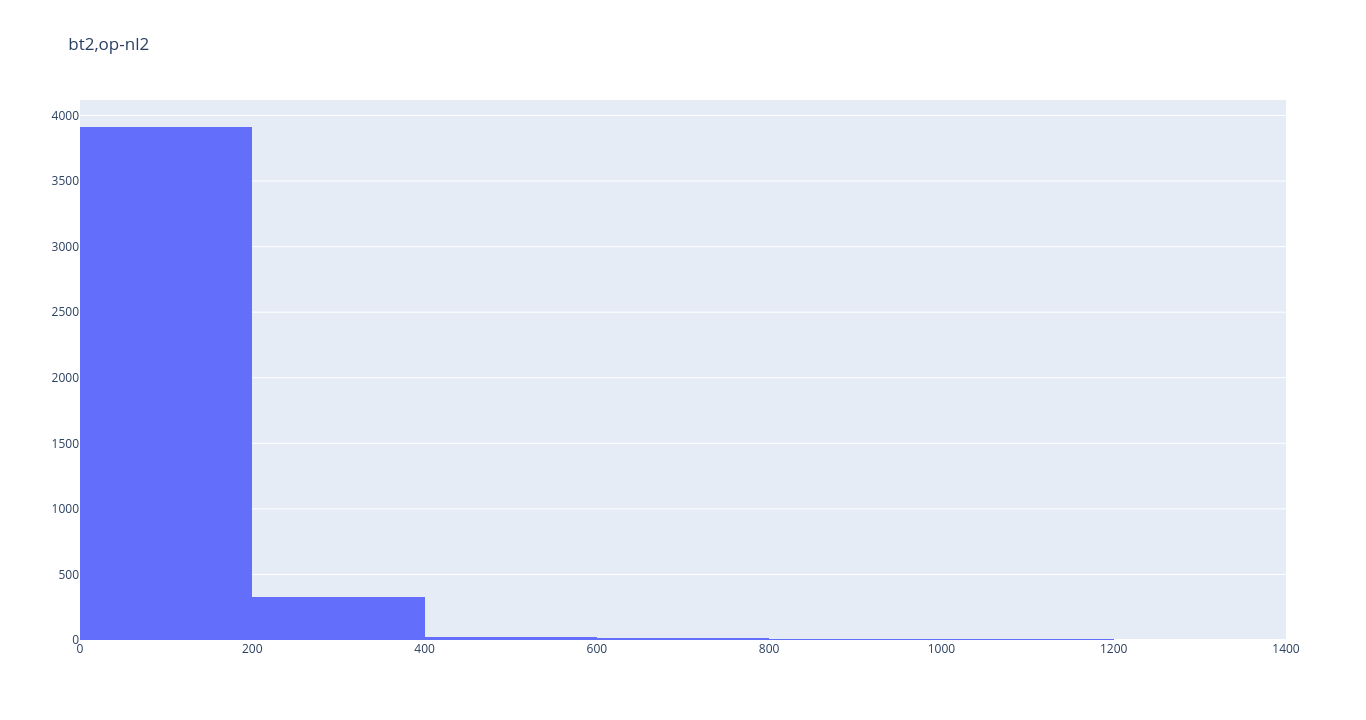

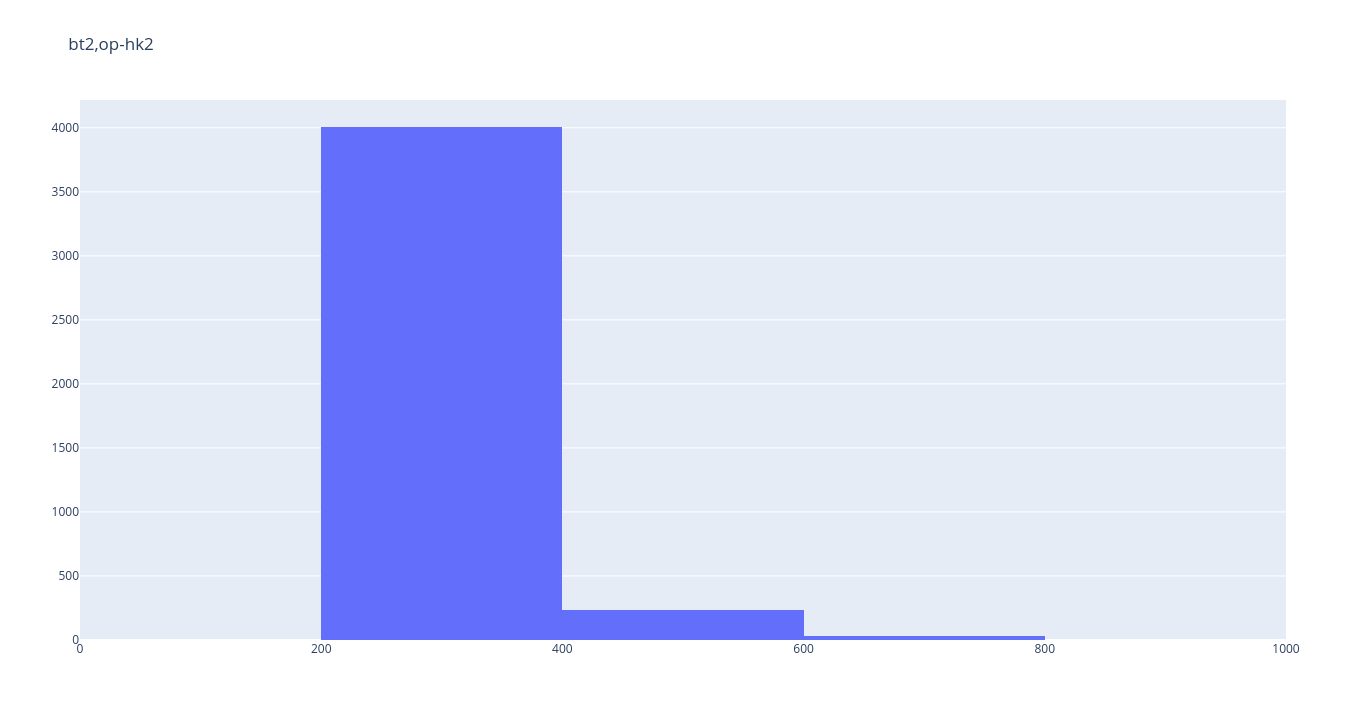

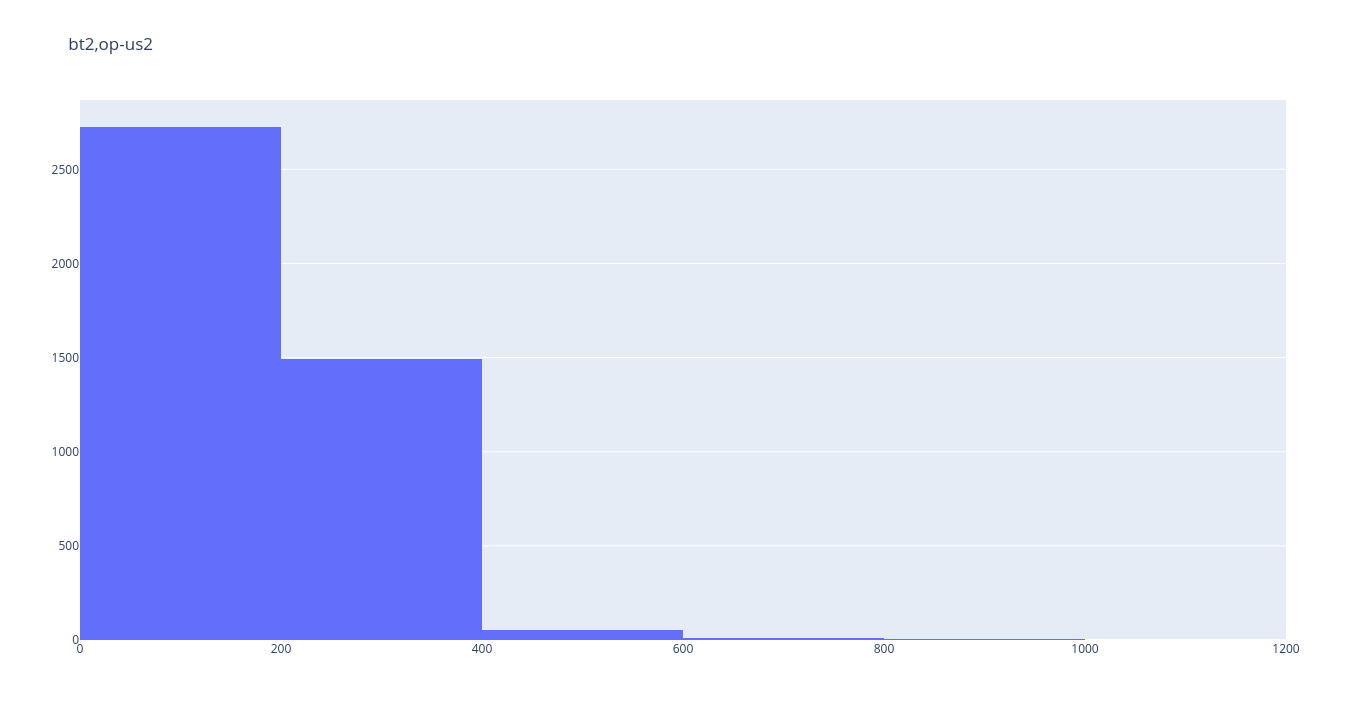

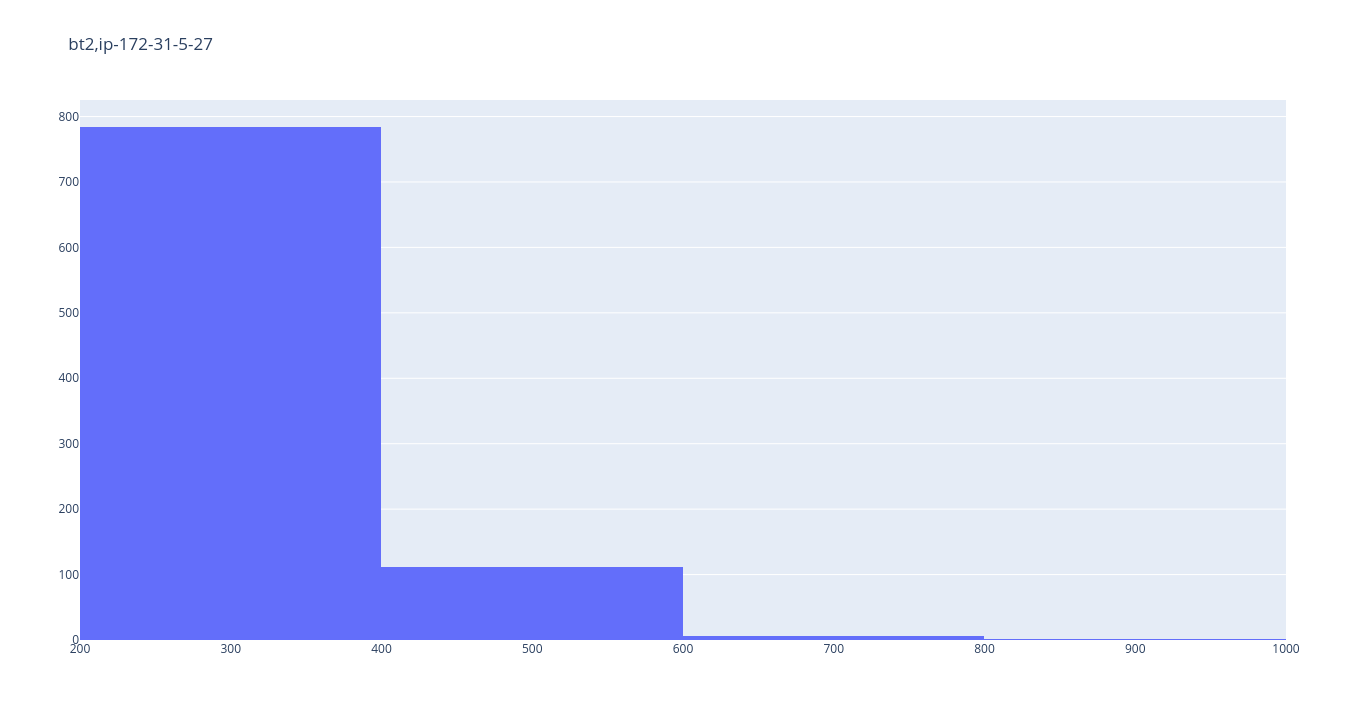

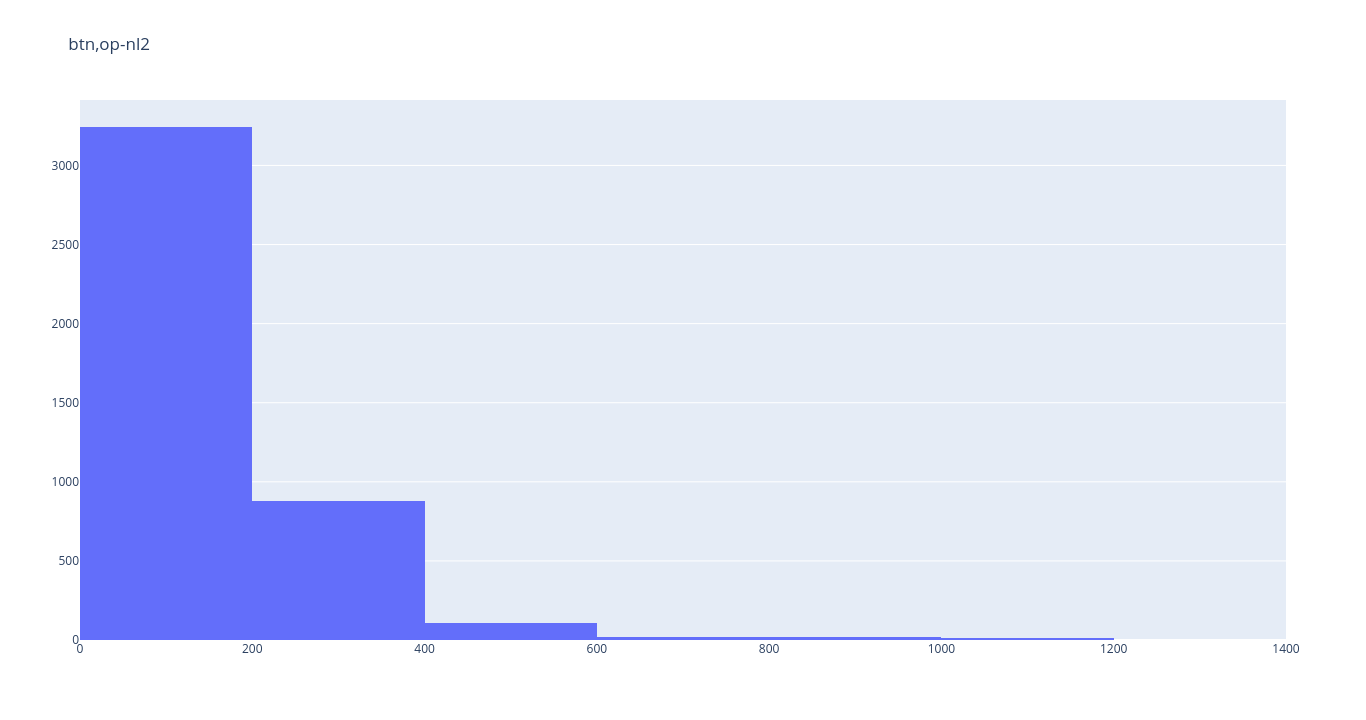

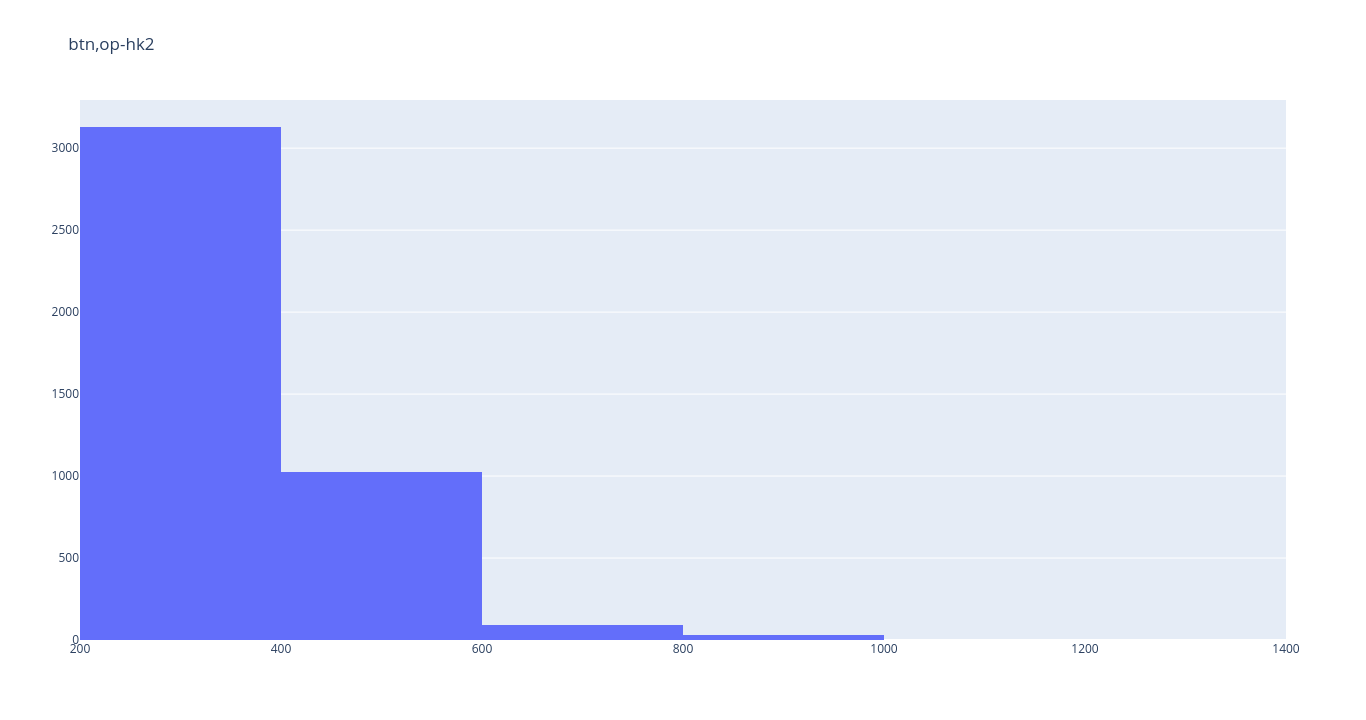

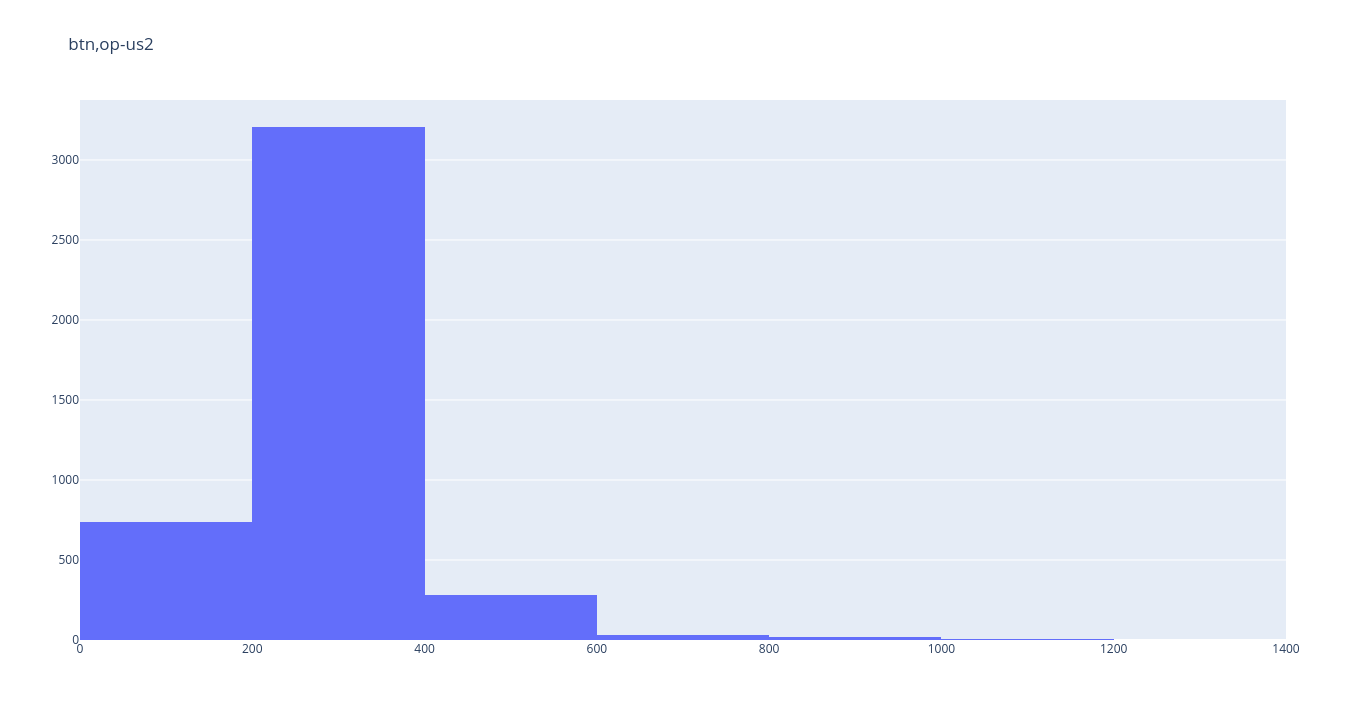

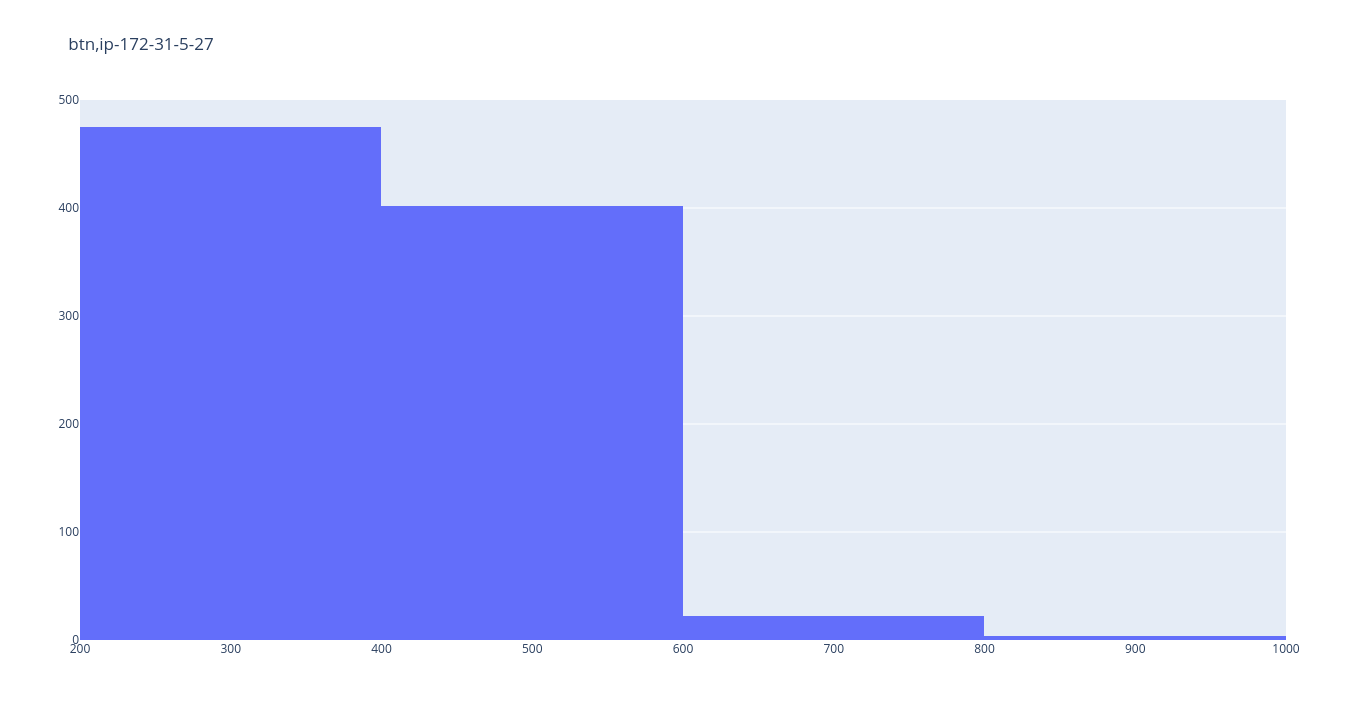

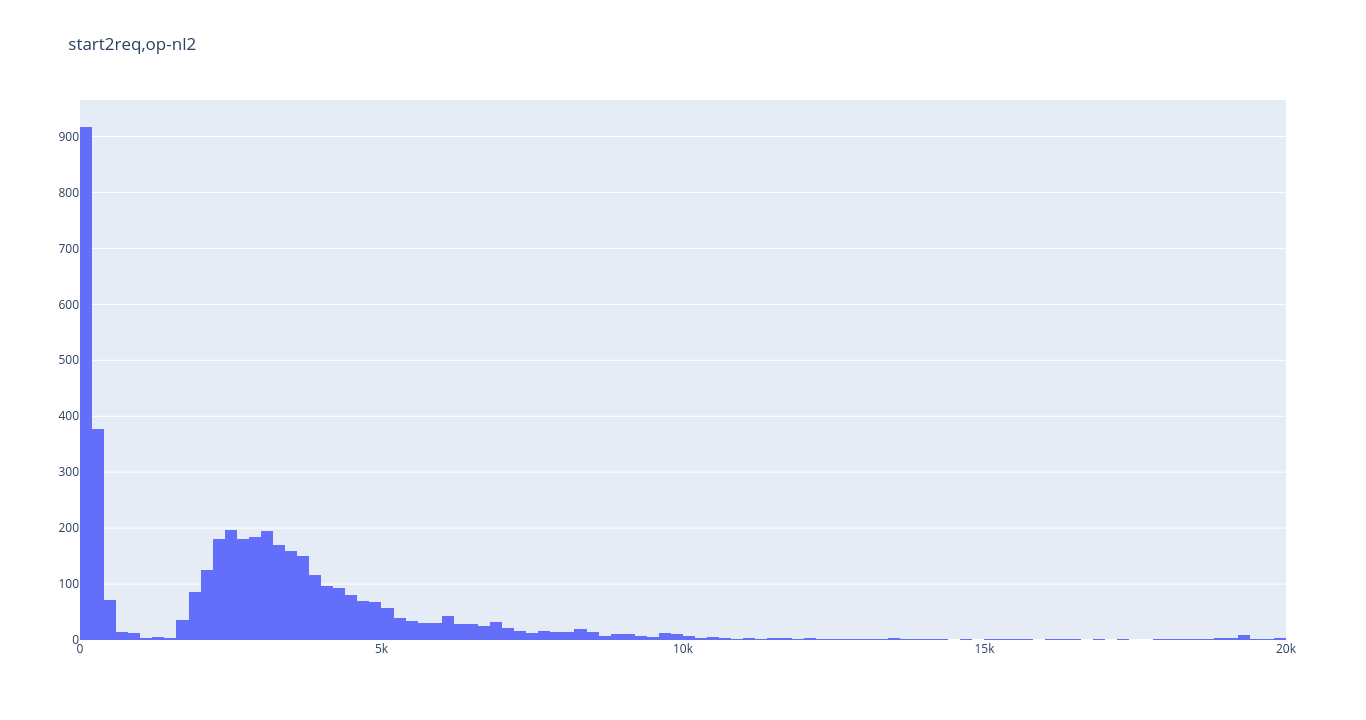

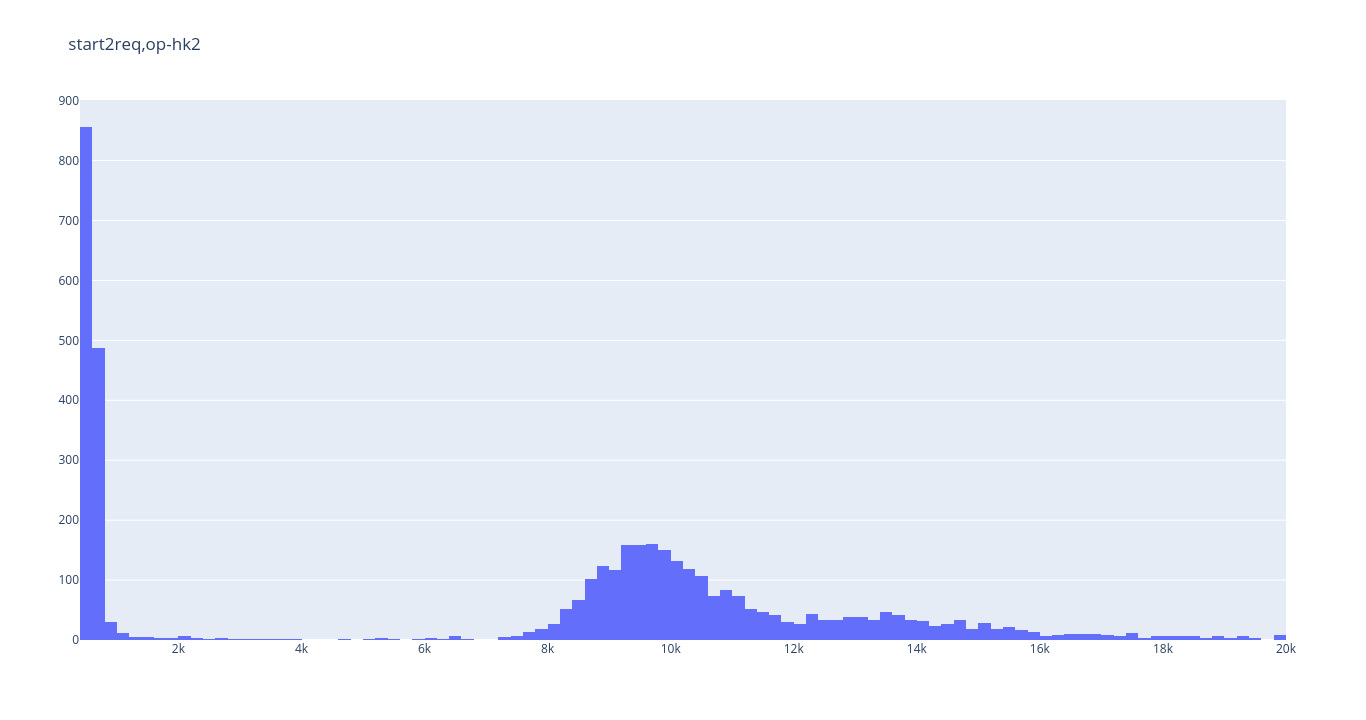

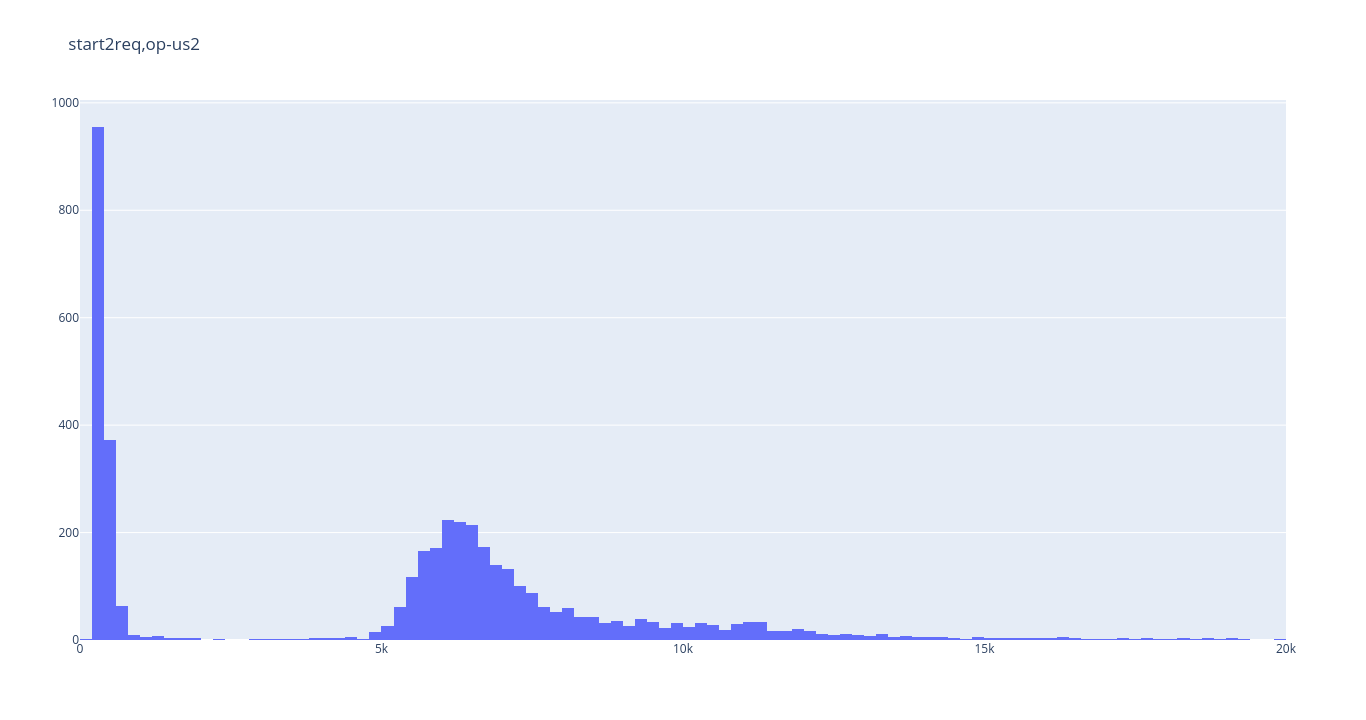

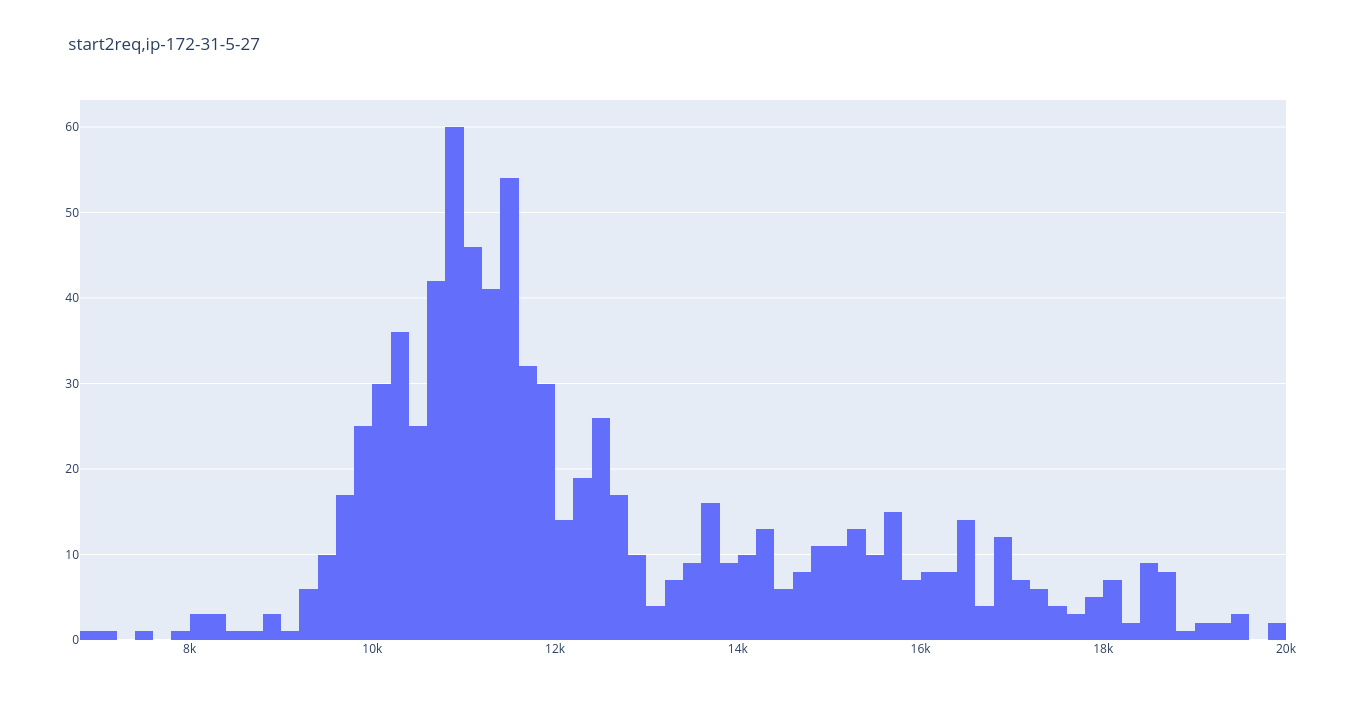

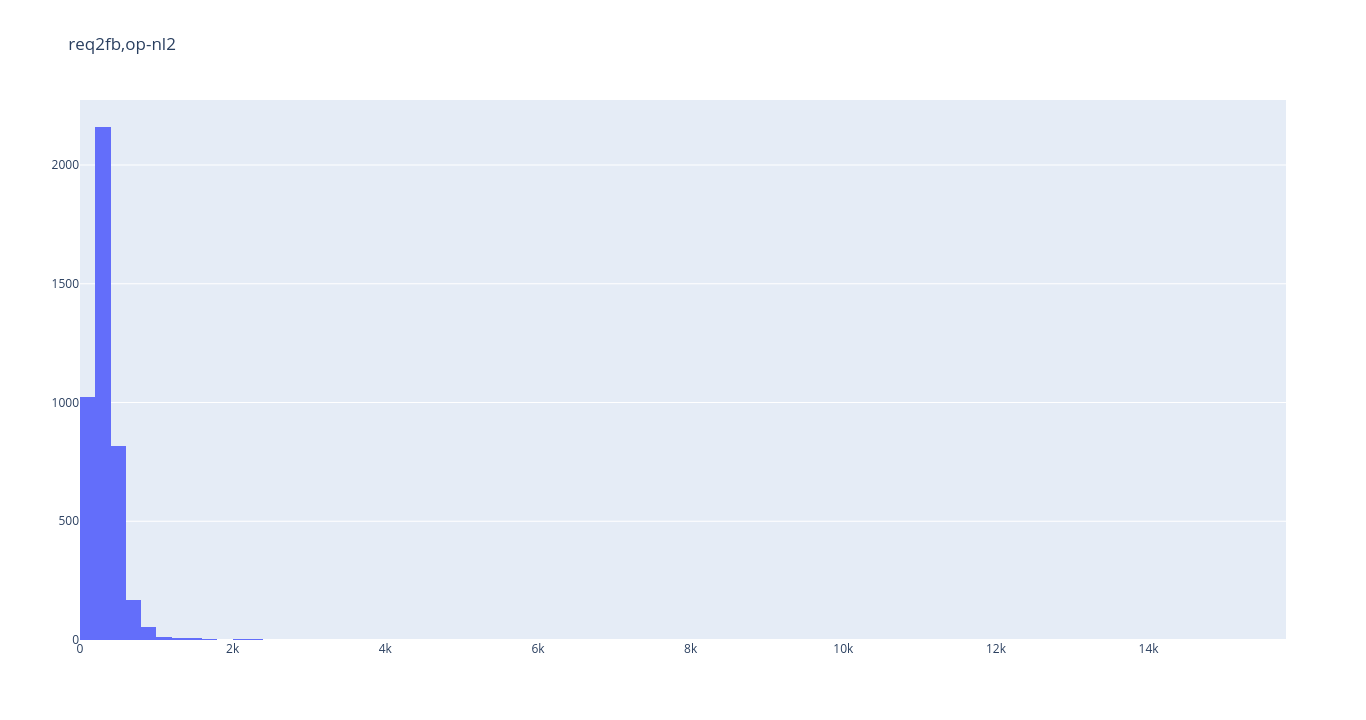

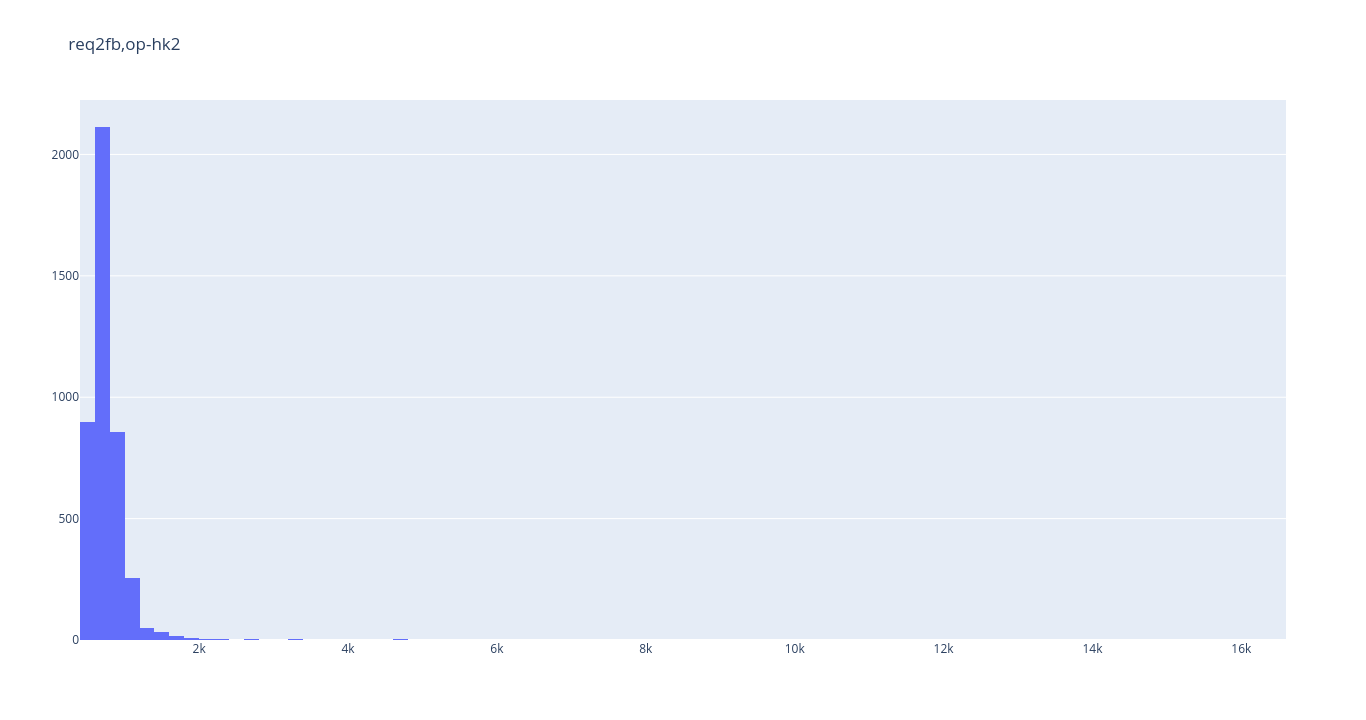

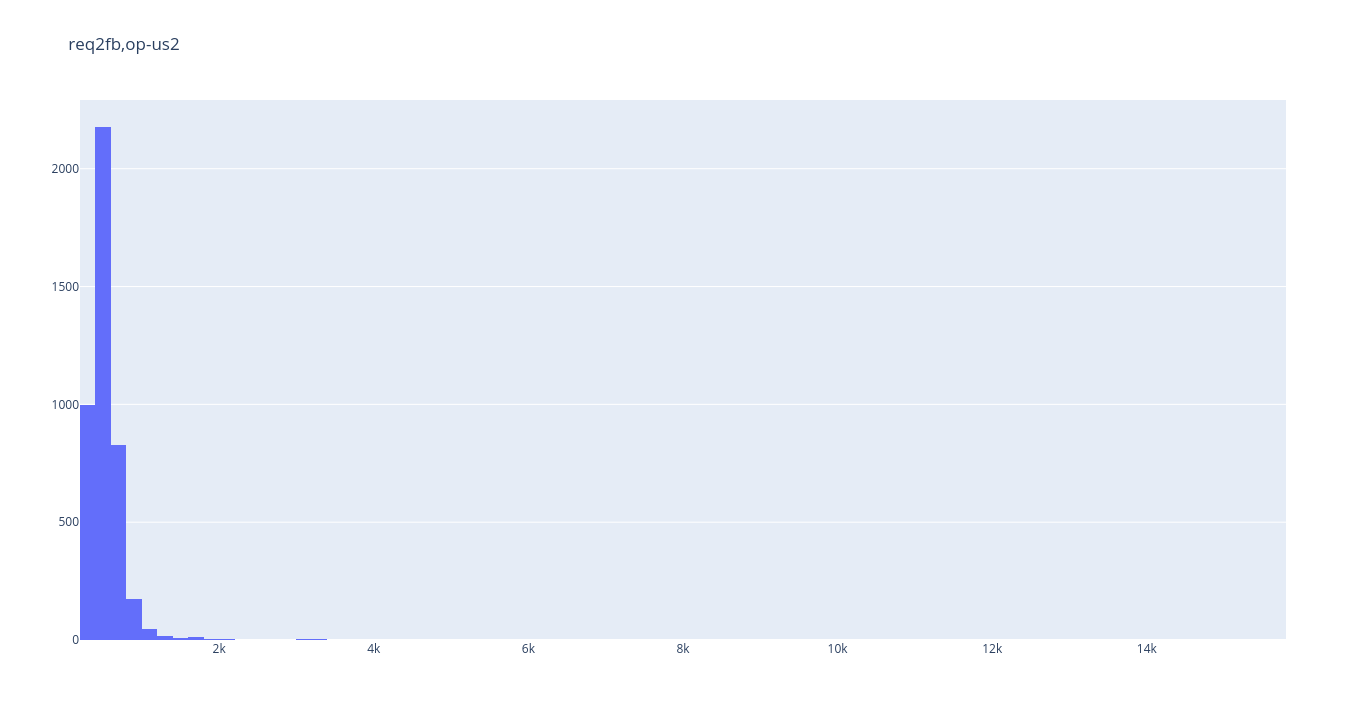

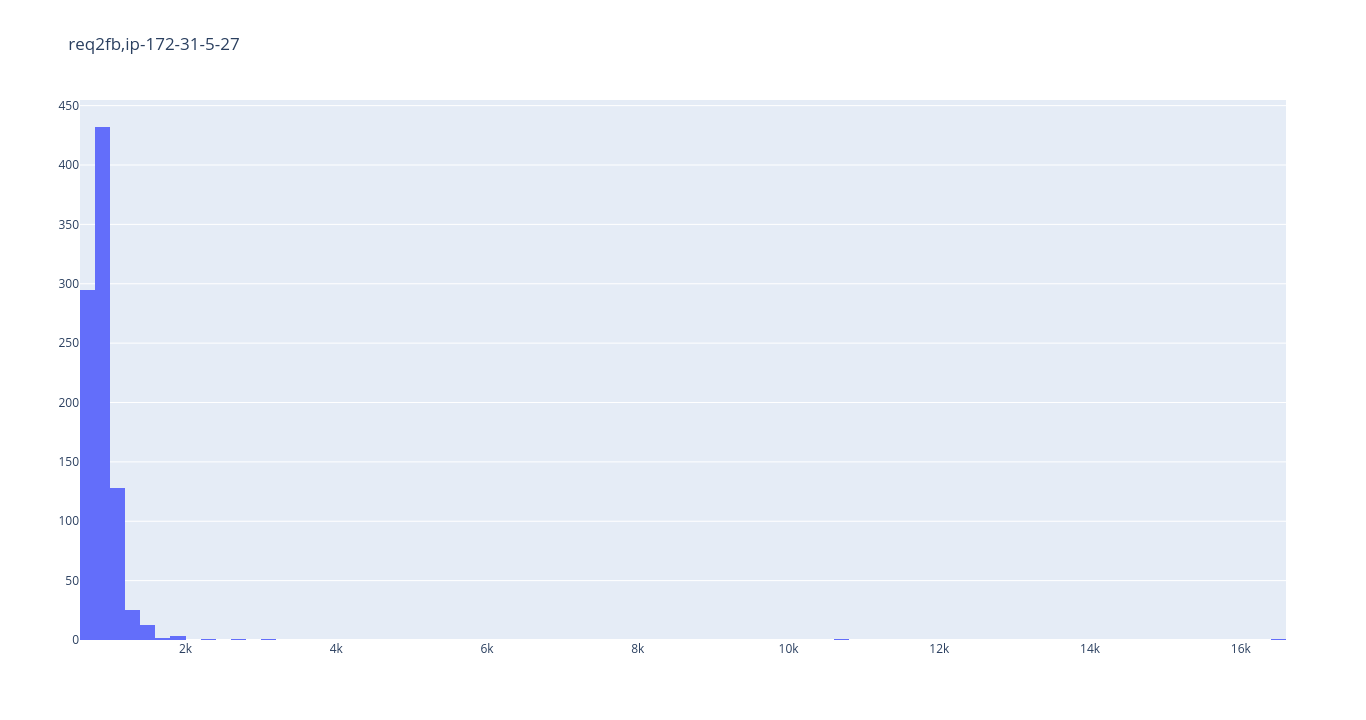

In [3]:
#Do Some Histograms 

if not os.path.exists("images/histograms"):
    os.mkdir("images/histograms")

sources = ['op-nl2','op-hk2','op-us2','ip-172-31-5-27']


values = ['bt1','bt2','btn','start2req','req2fb']

for k in values:
    for s in sources:
        server_measurements = [x for x in measurements if x['source'] == s]
        x=[x[k] for x in server_measurements]

        fig = go.Figure([go.Histogram(x=x,xbins=dict( # bins used for histogram
            start=0,
            end=20000,
            size=200
        ),)])
        fig.update_layout(title_text=f"{k},{s}")
        #fig.update_xaxes(range=[0,2000])
        byt = fig.to_image(format="png",width=1366,height=720)
        fig.write_image(f"images/histograms/{k}_{s}.png",format="png",width=1366,height=720)
        display(Image(byt))

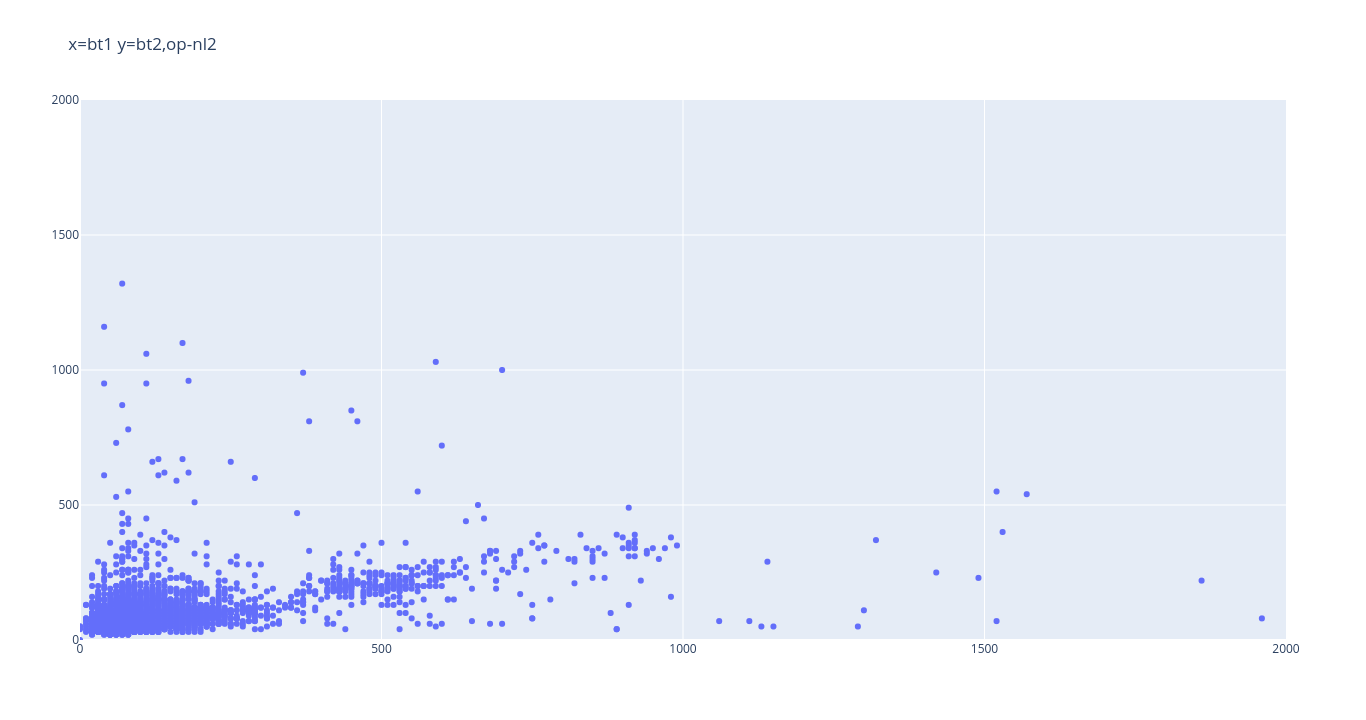

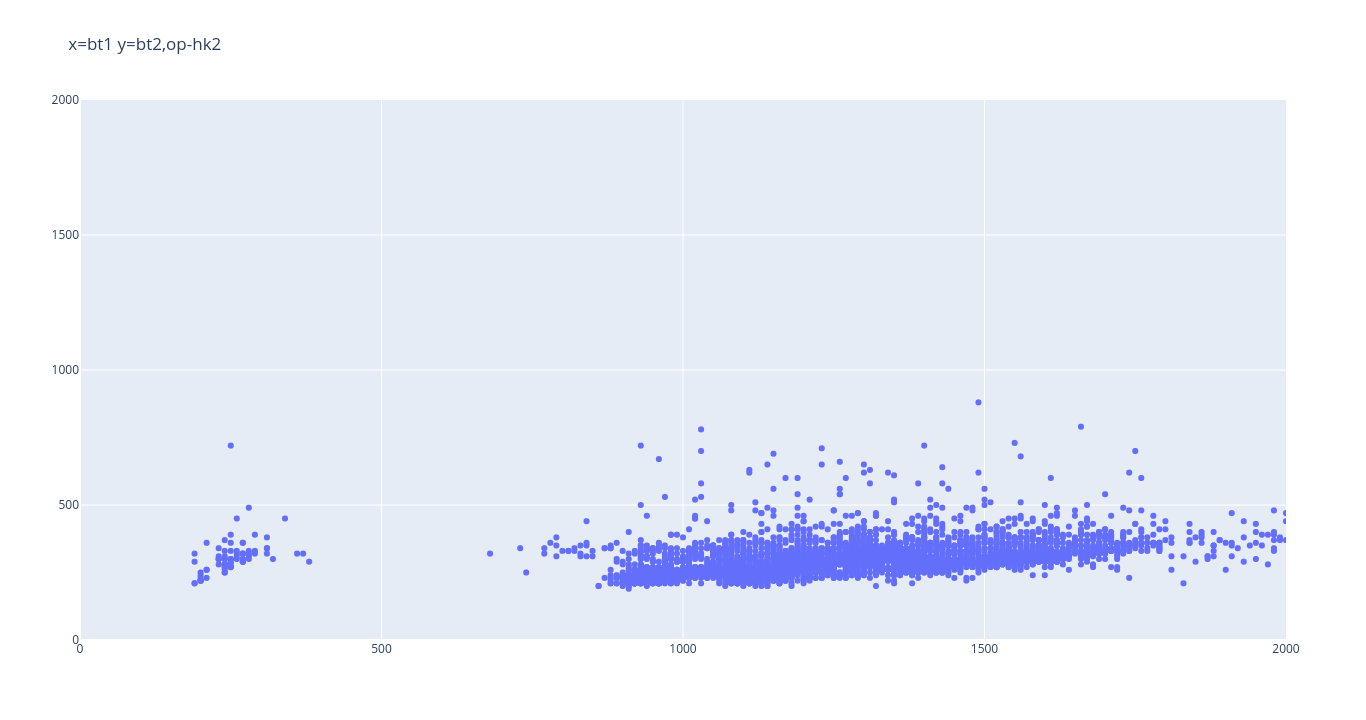

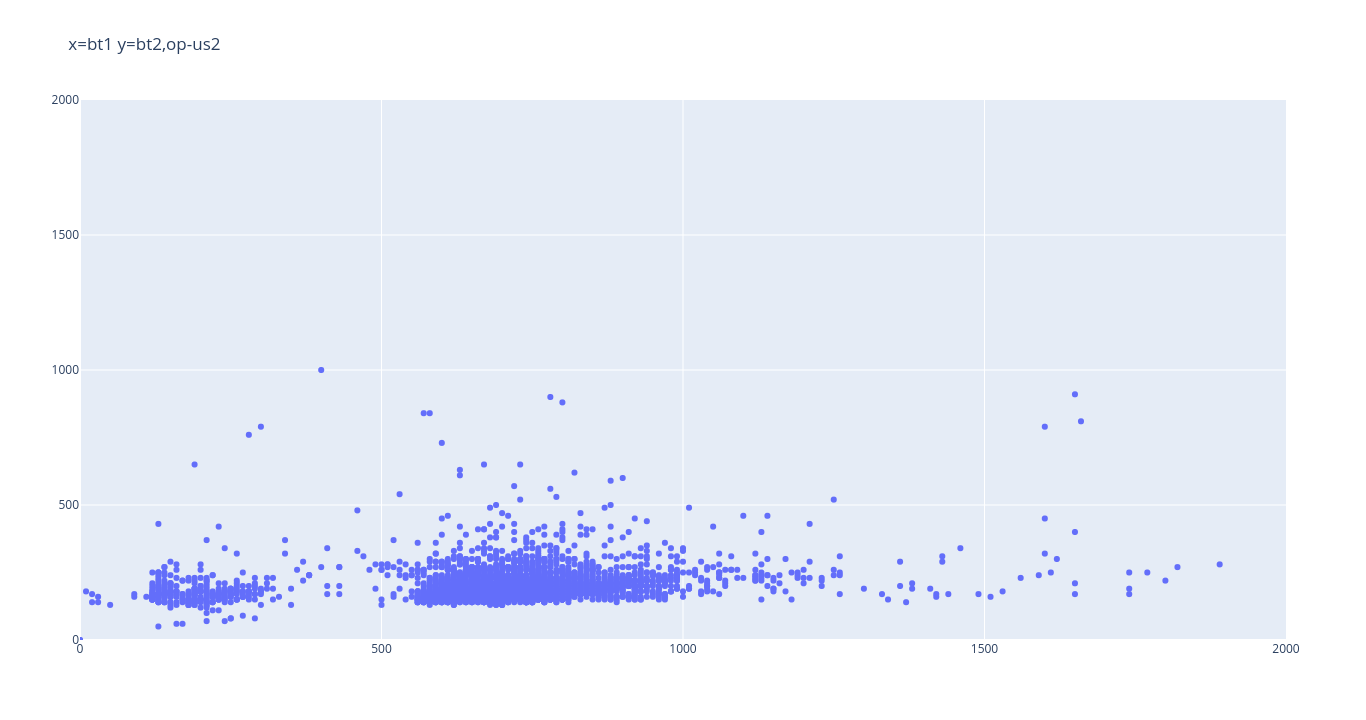

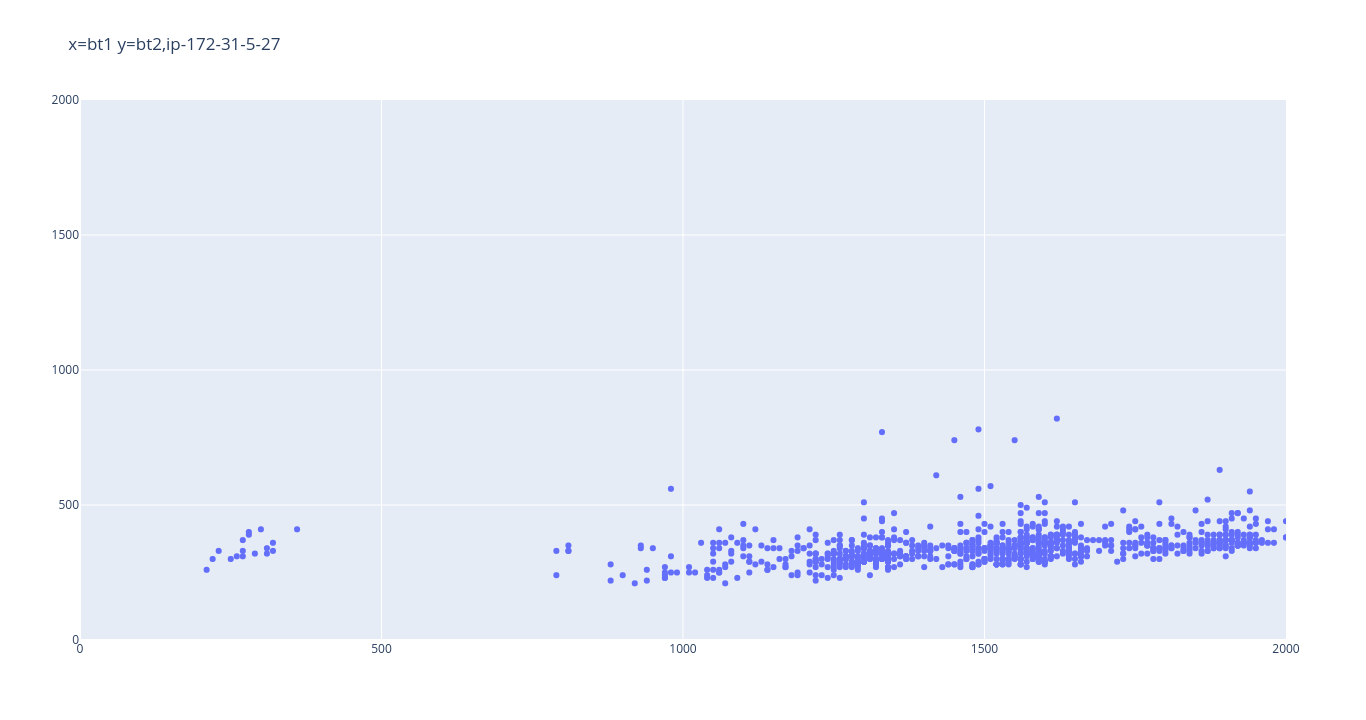

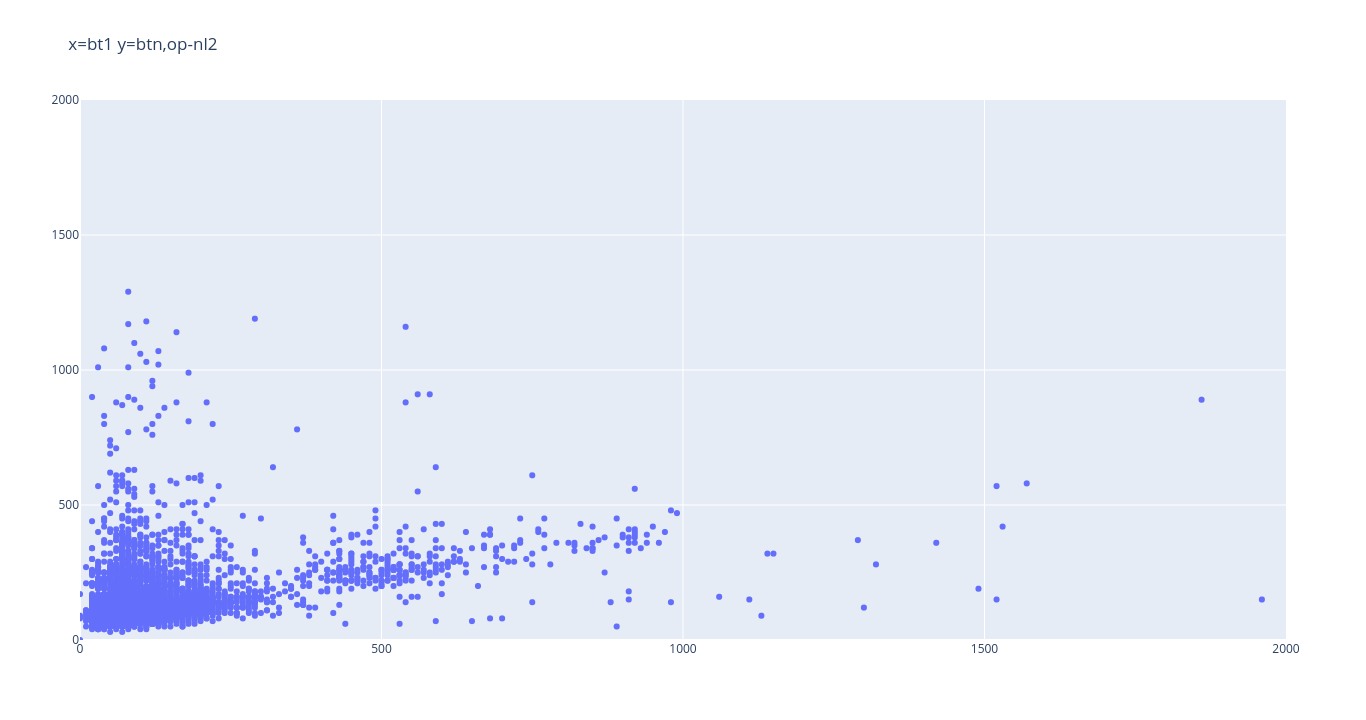

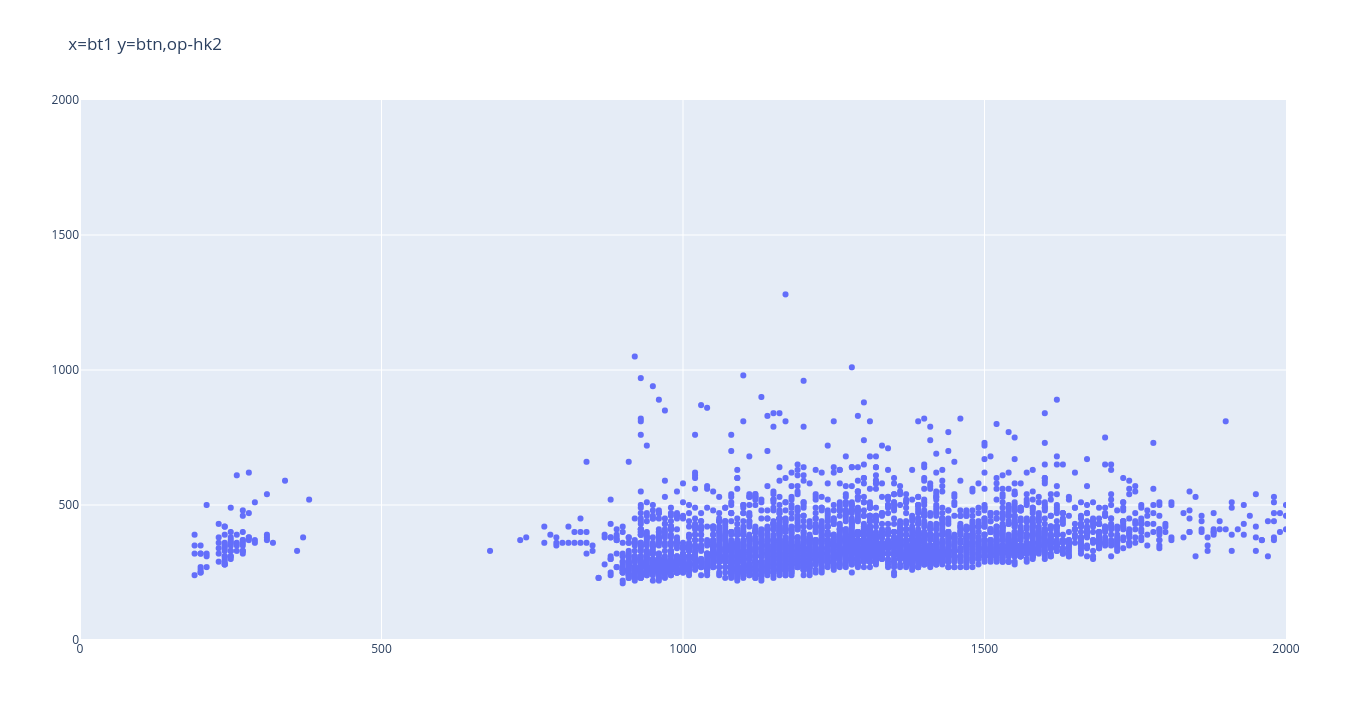

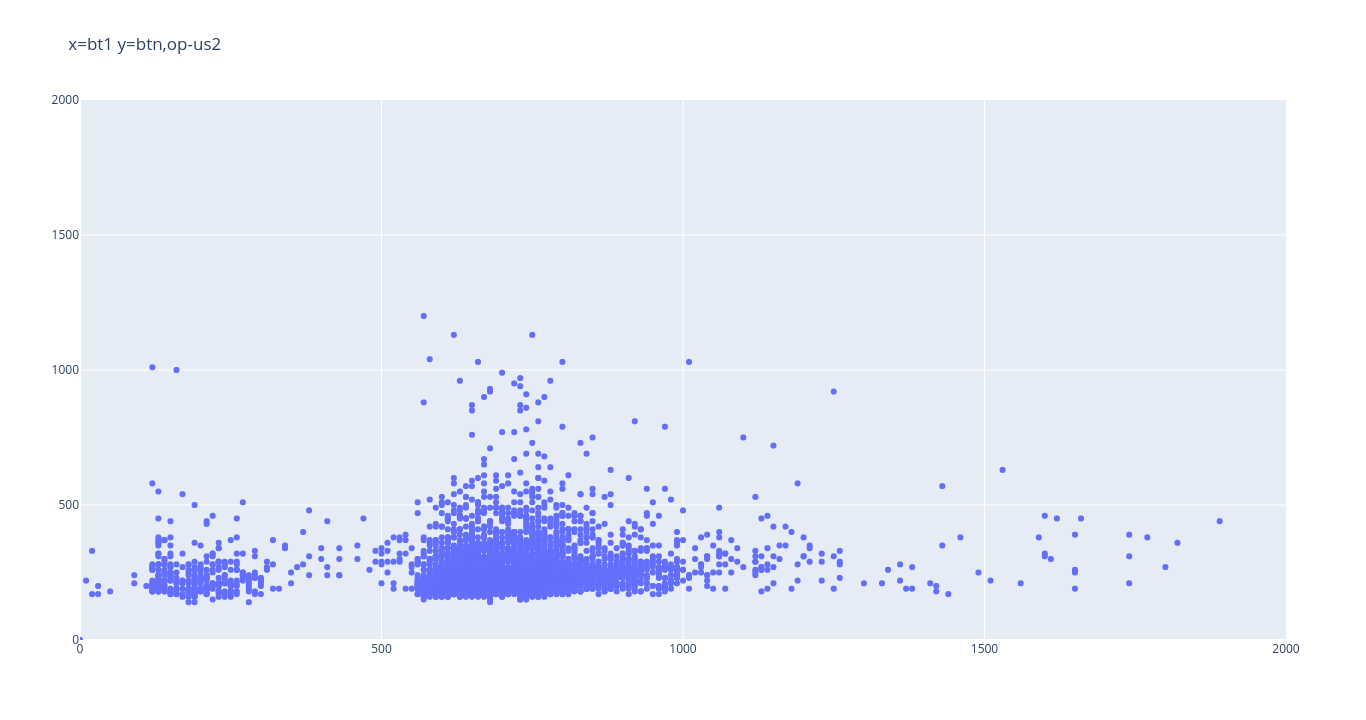

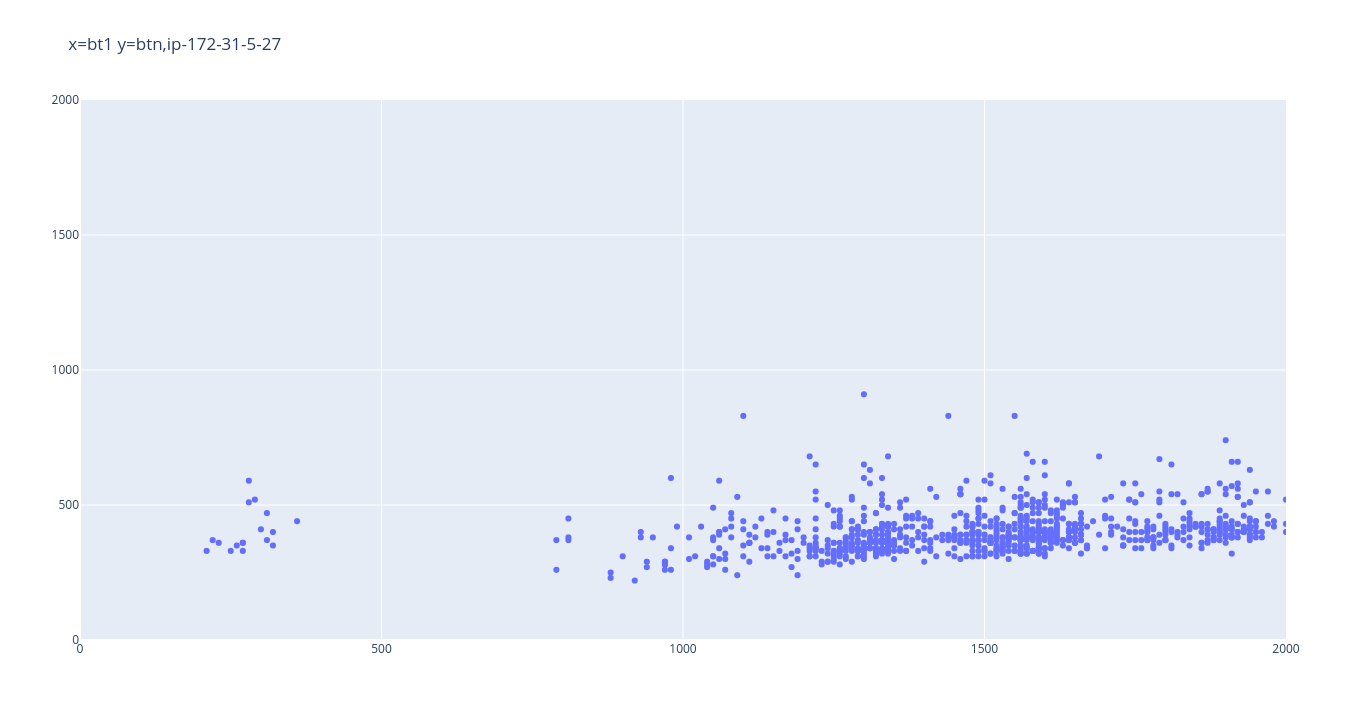

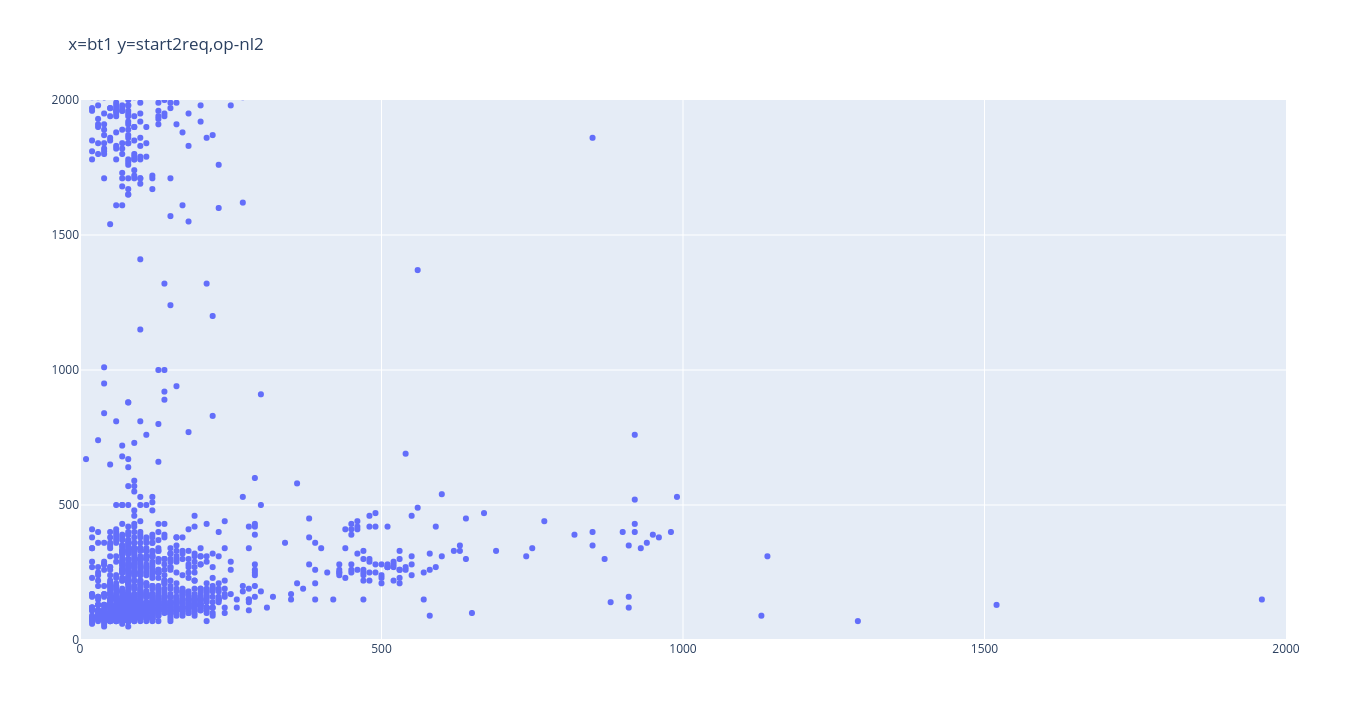

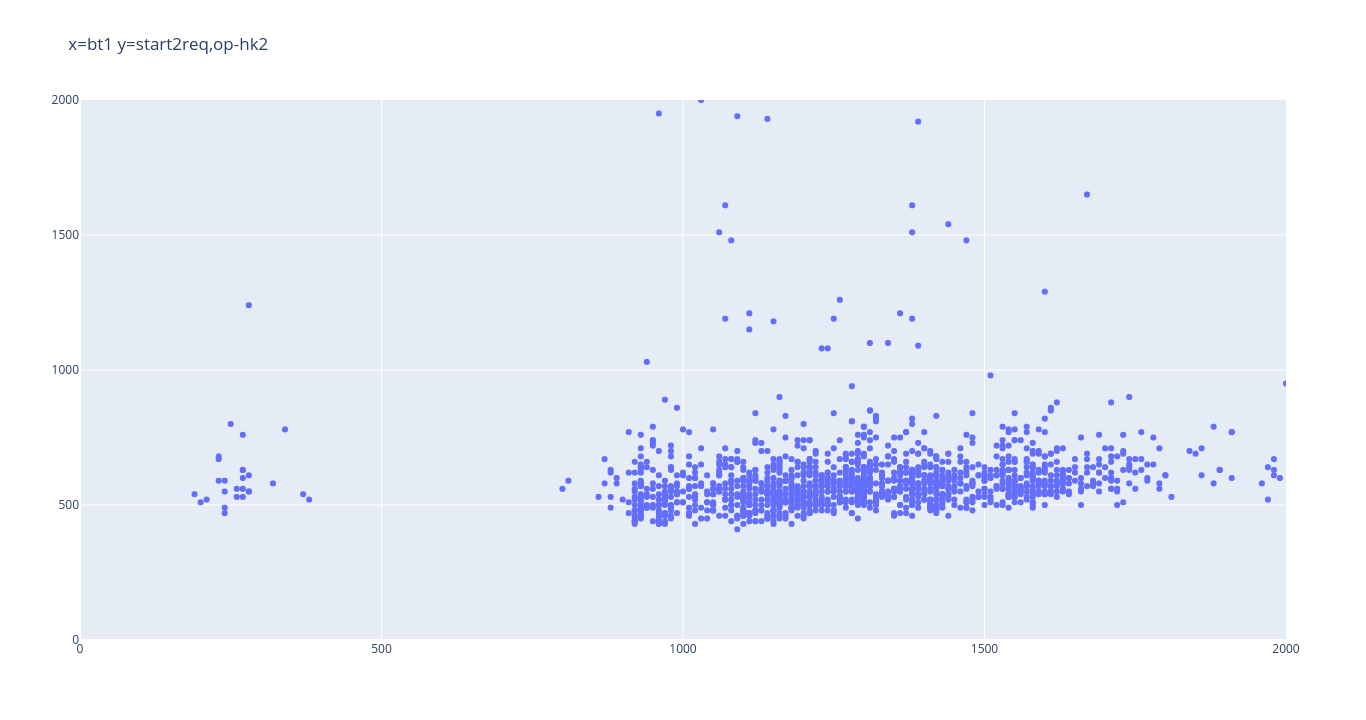

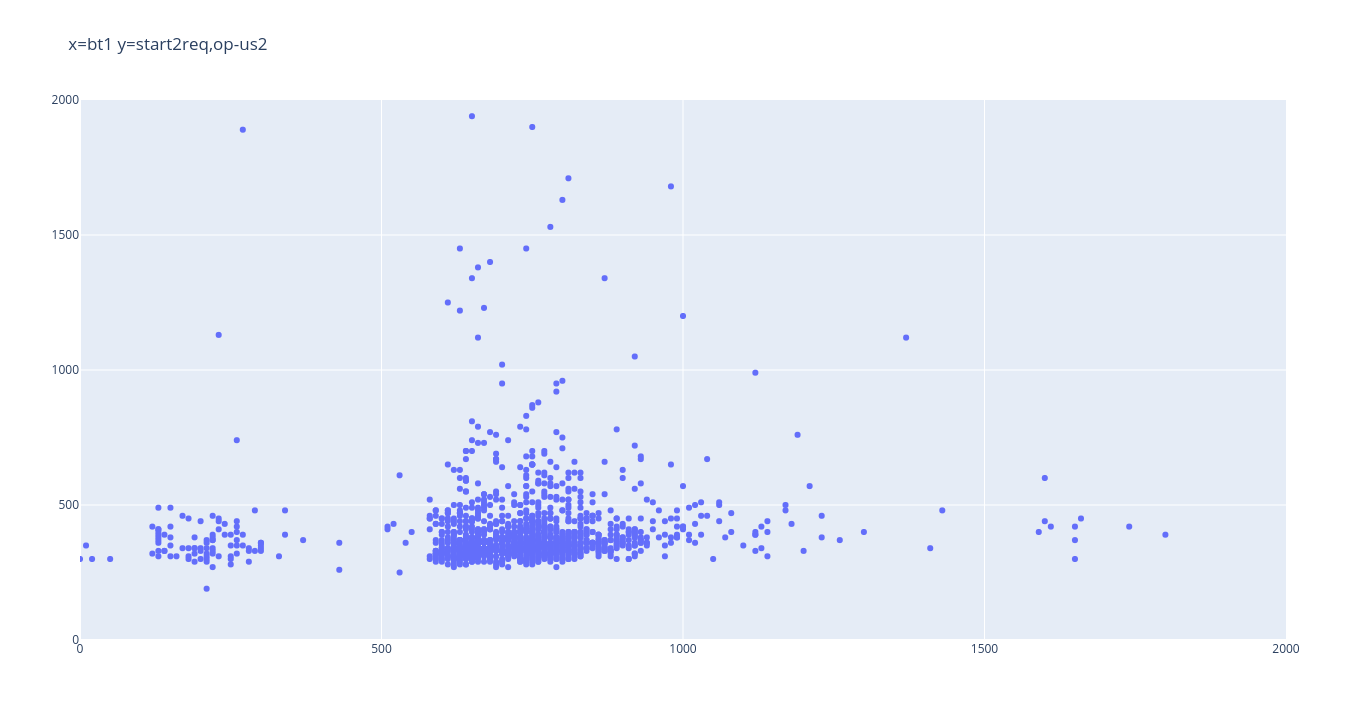

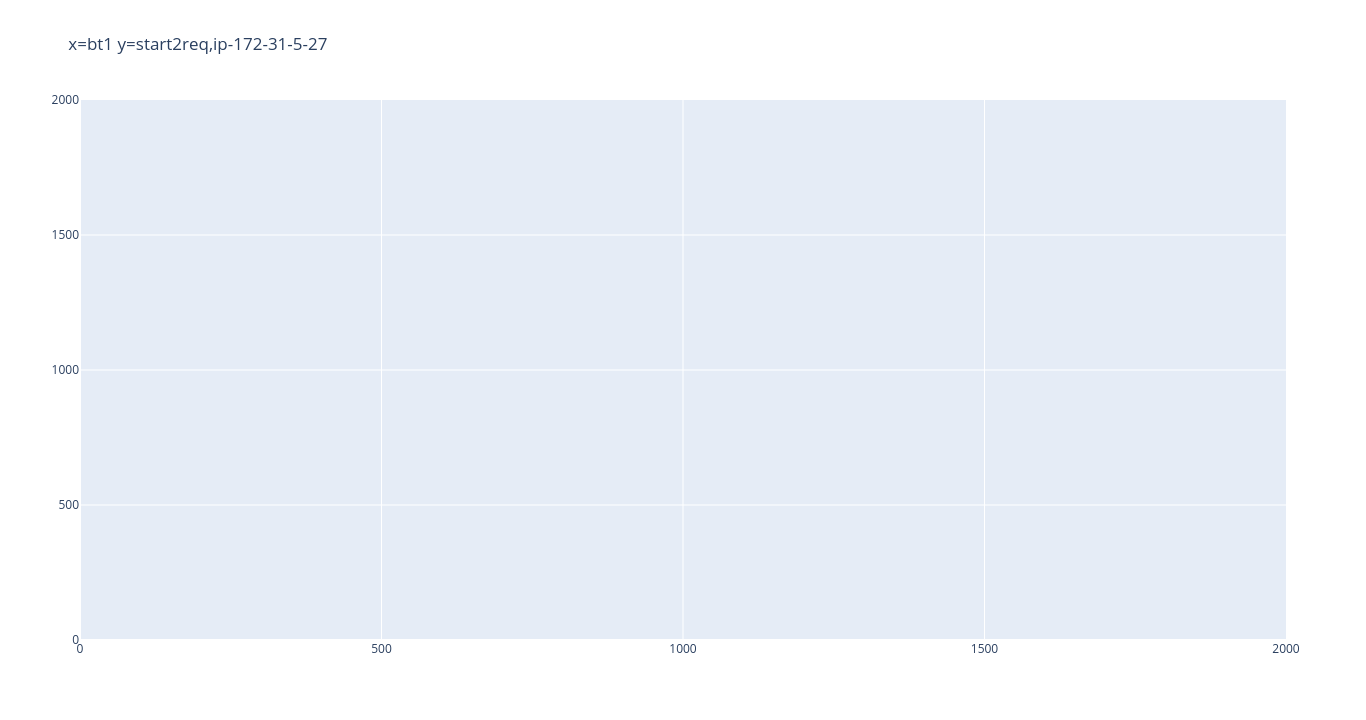

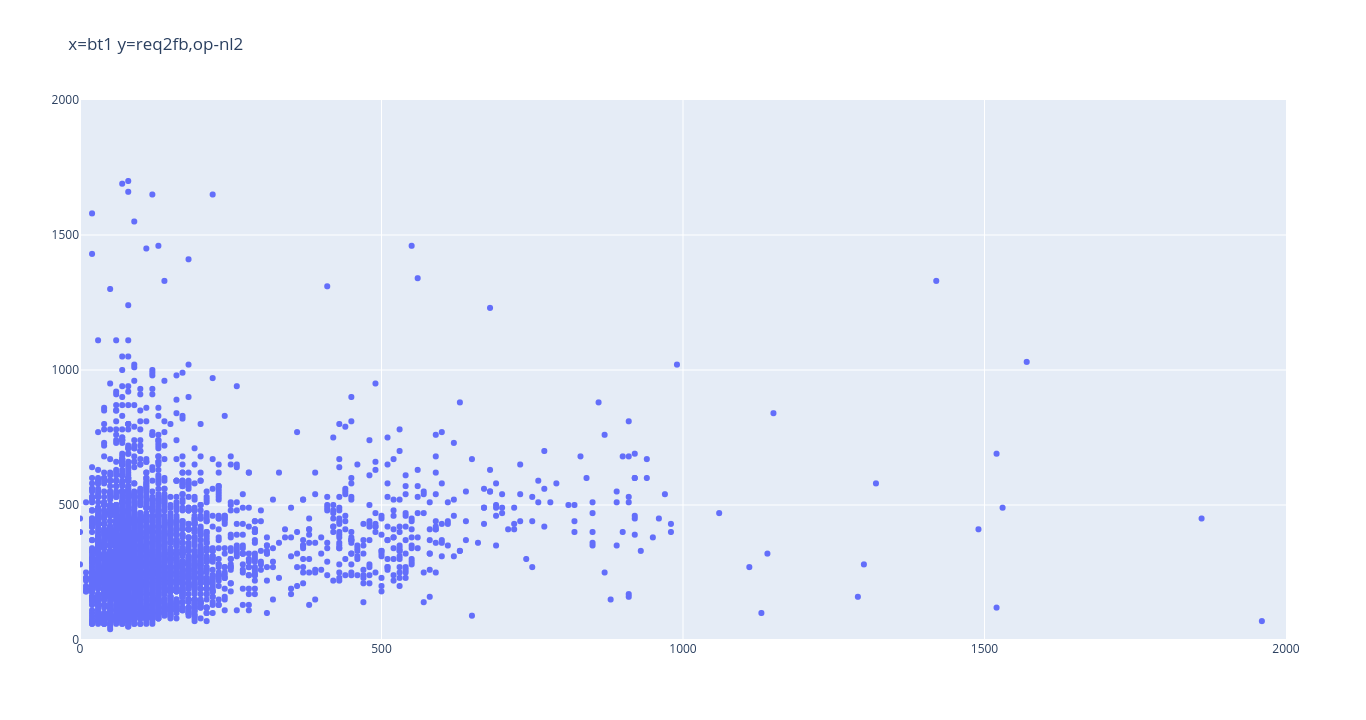

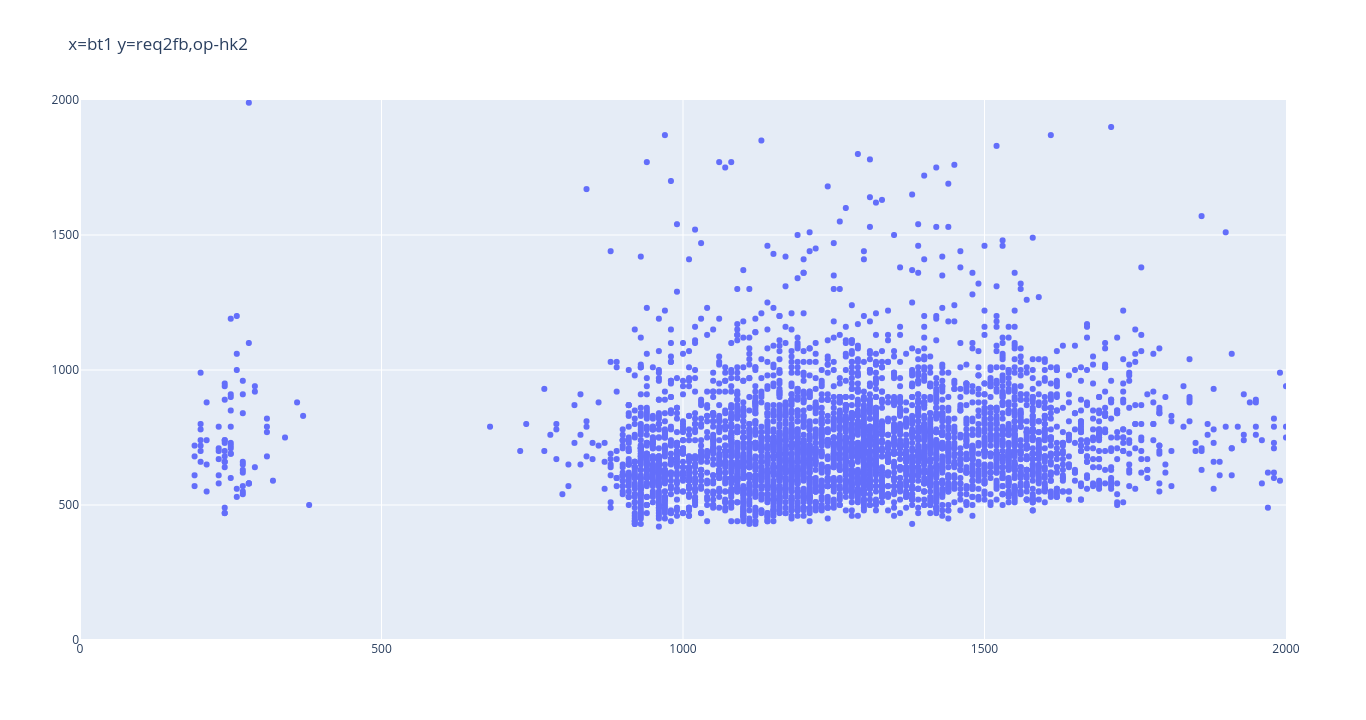

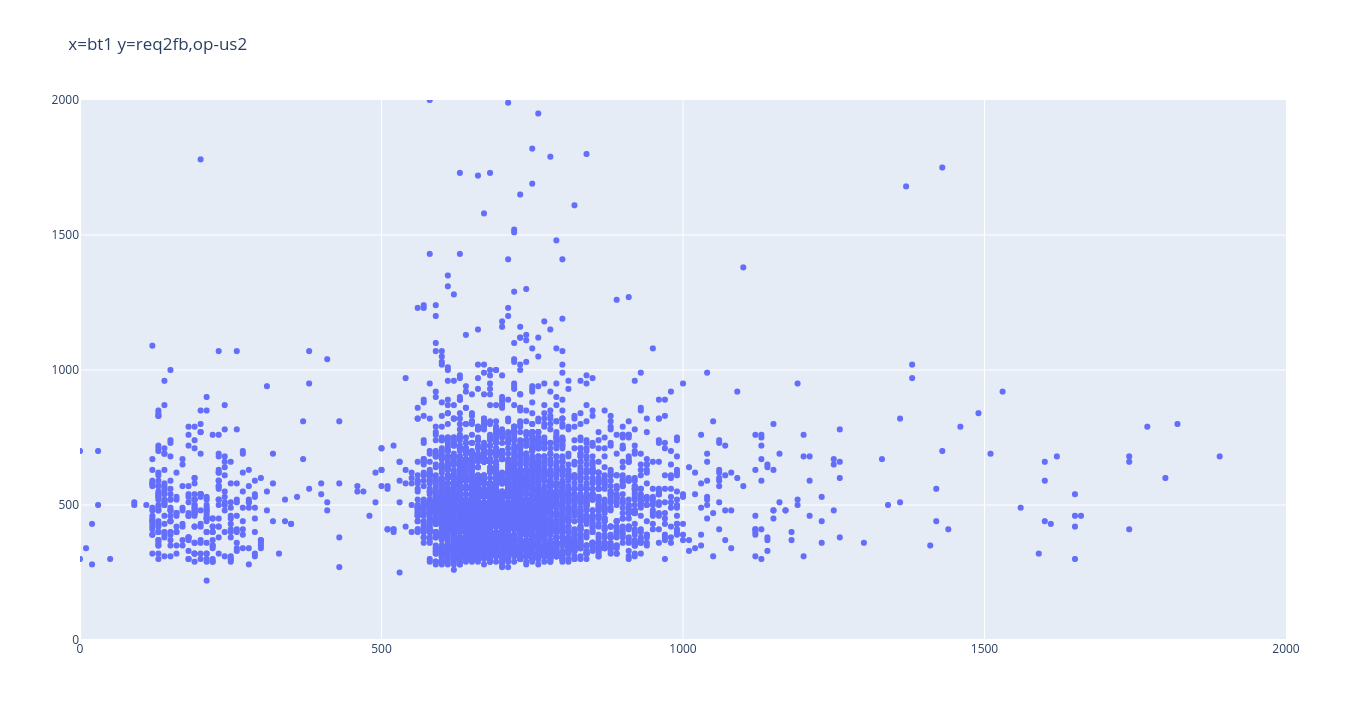

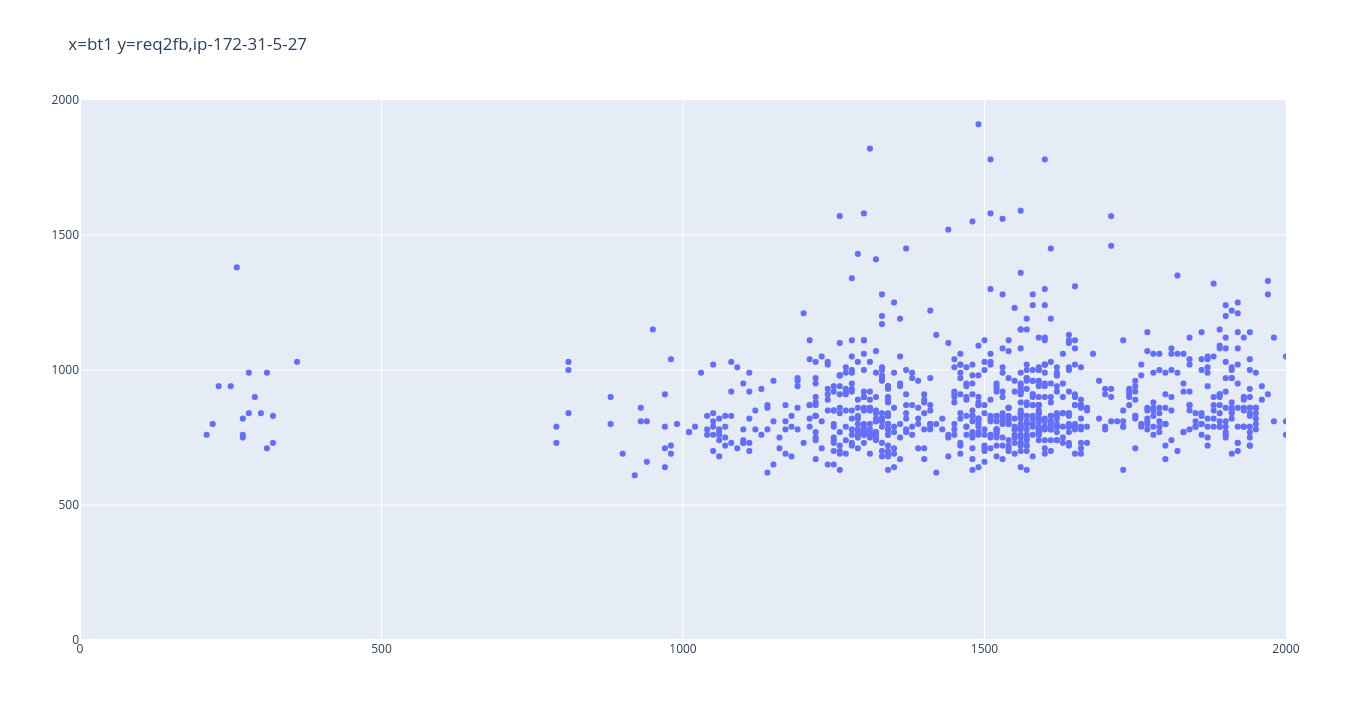

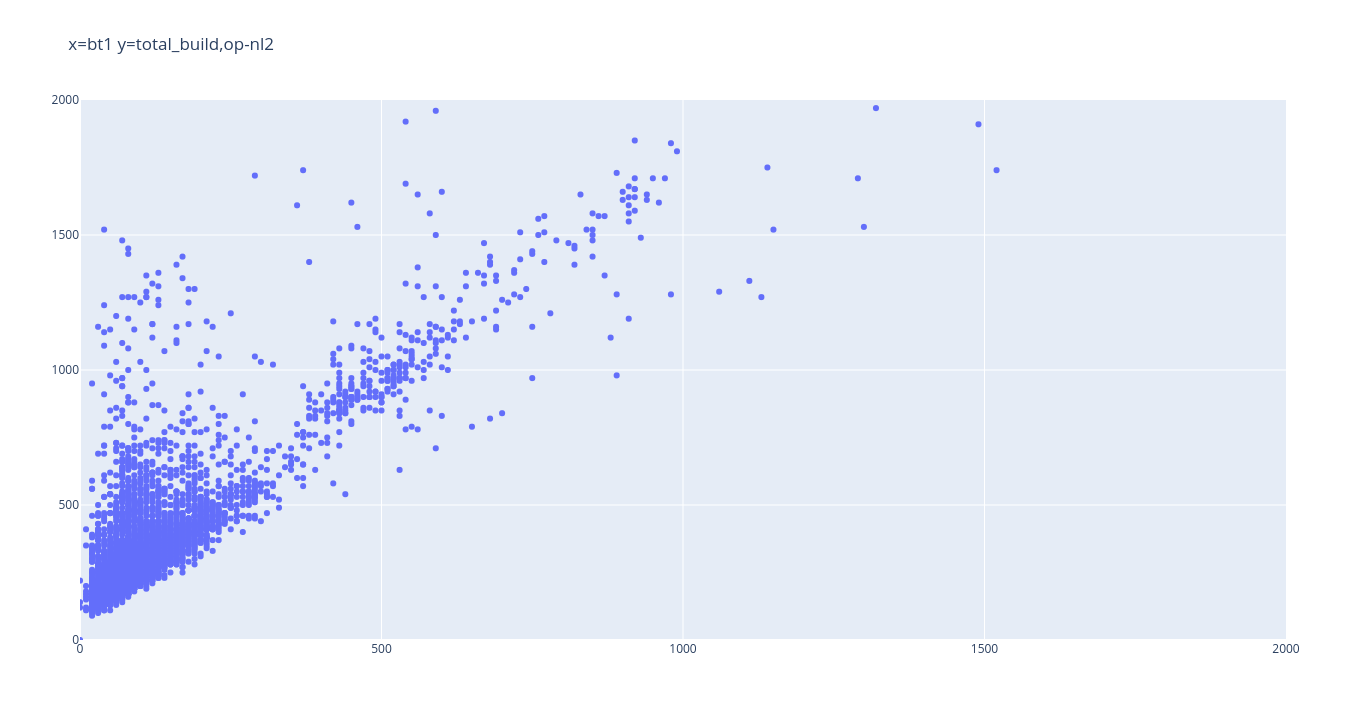

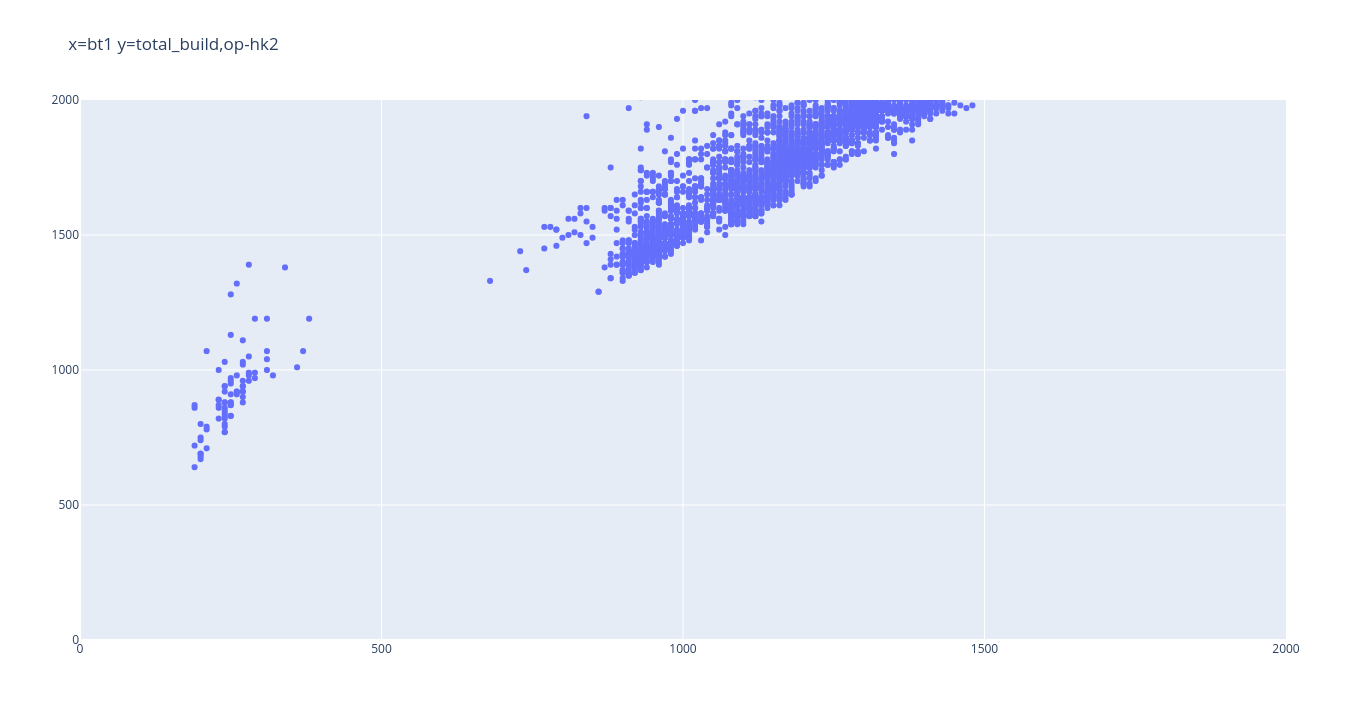

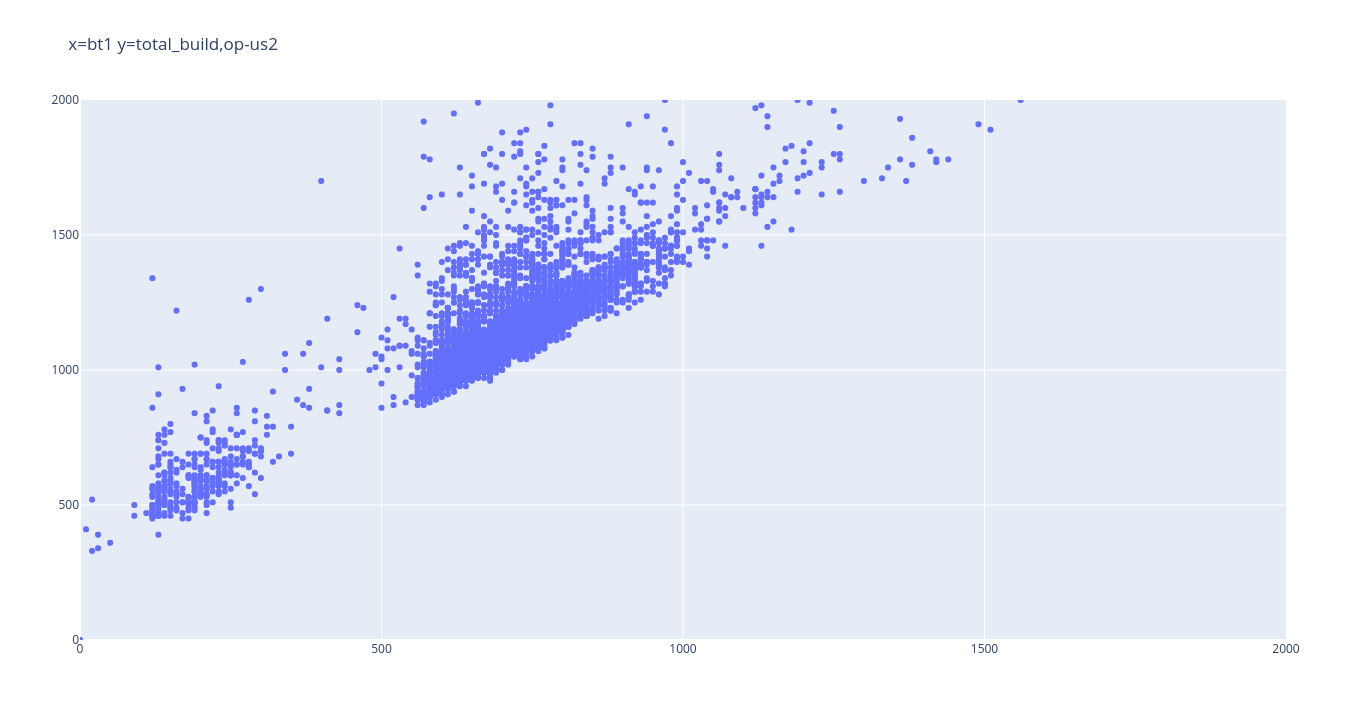

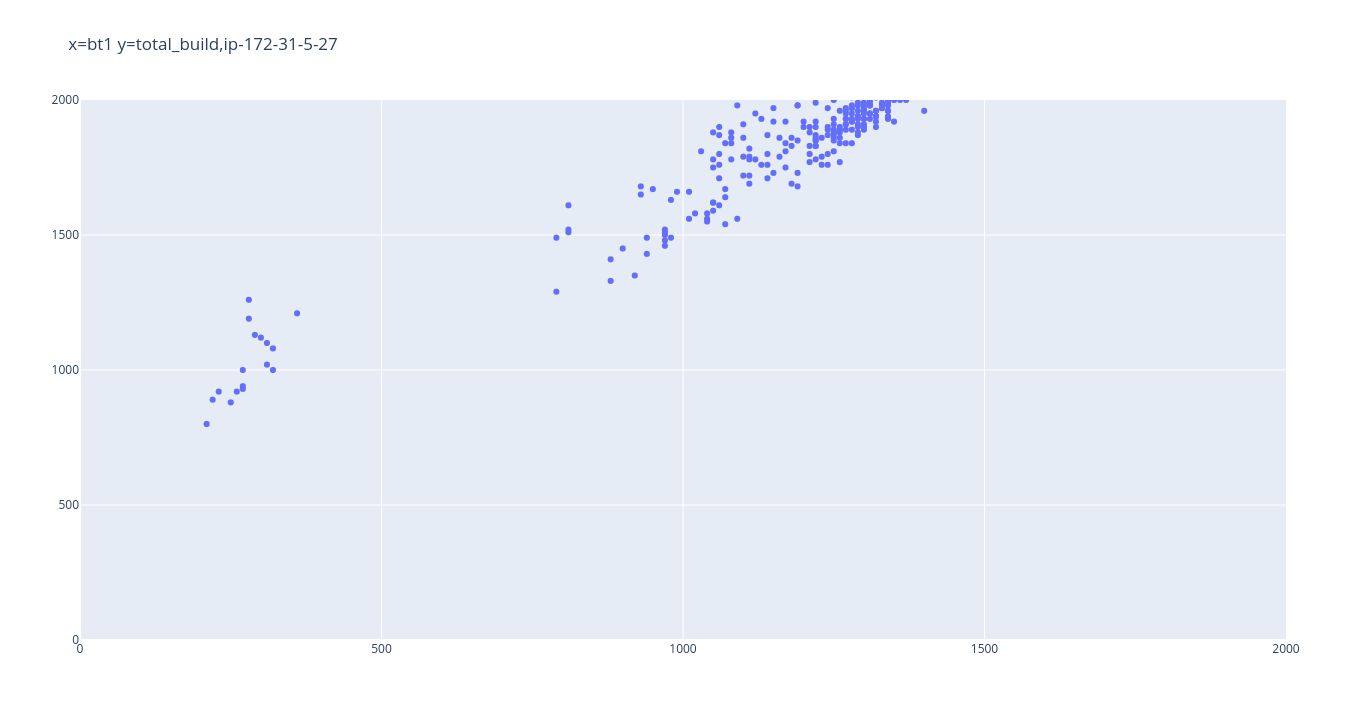

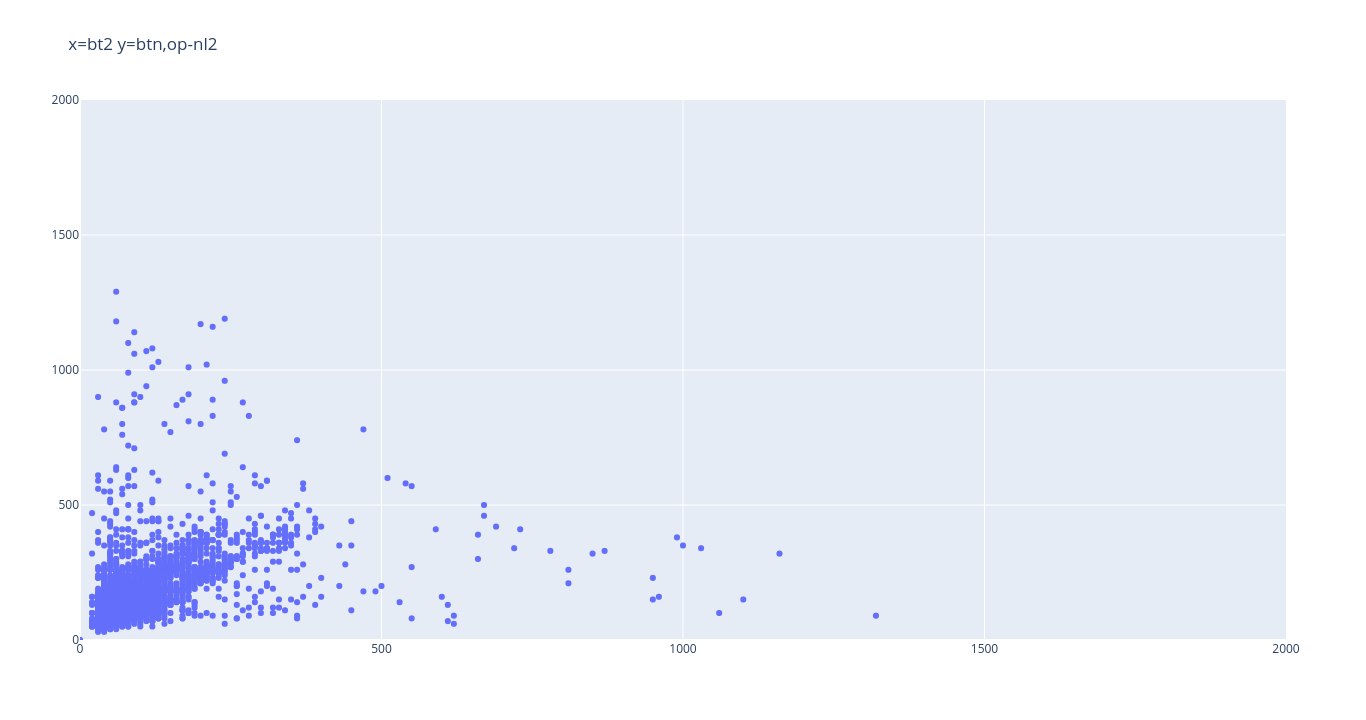

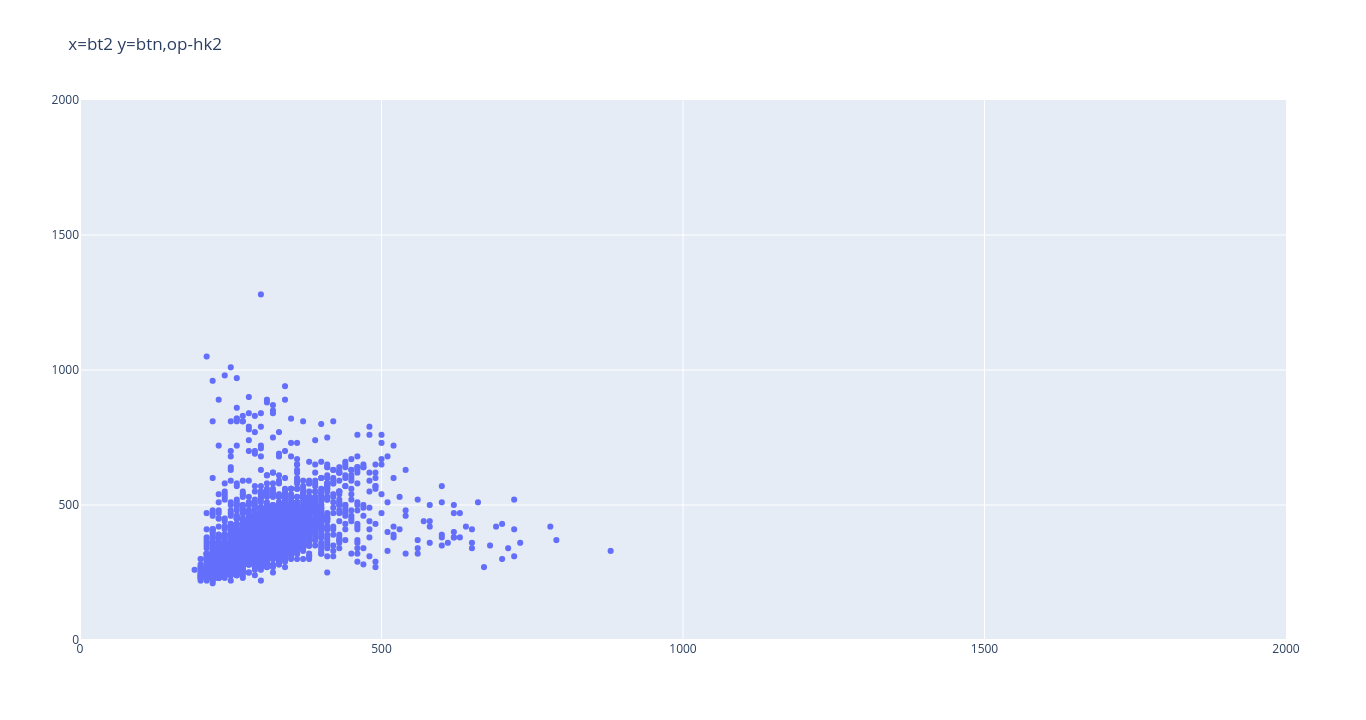

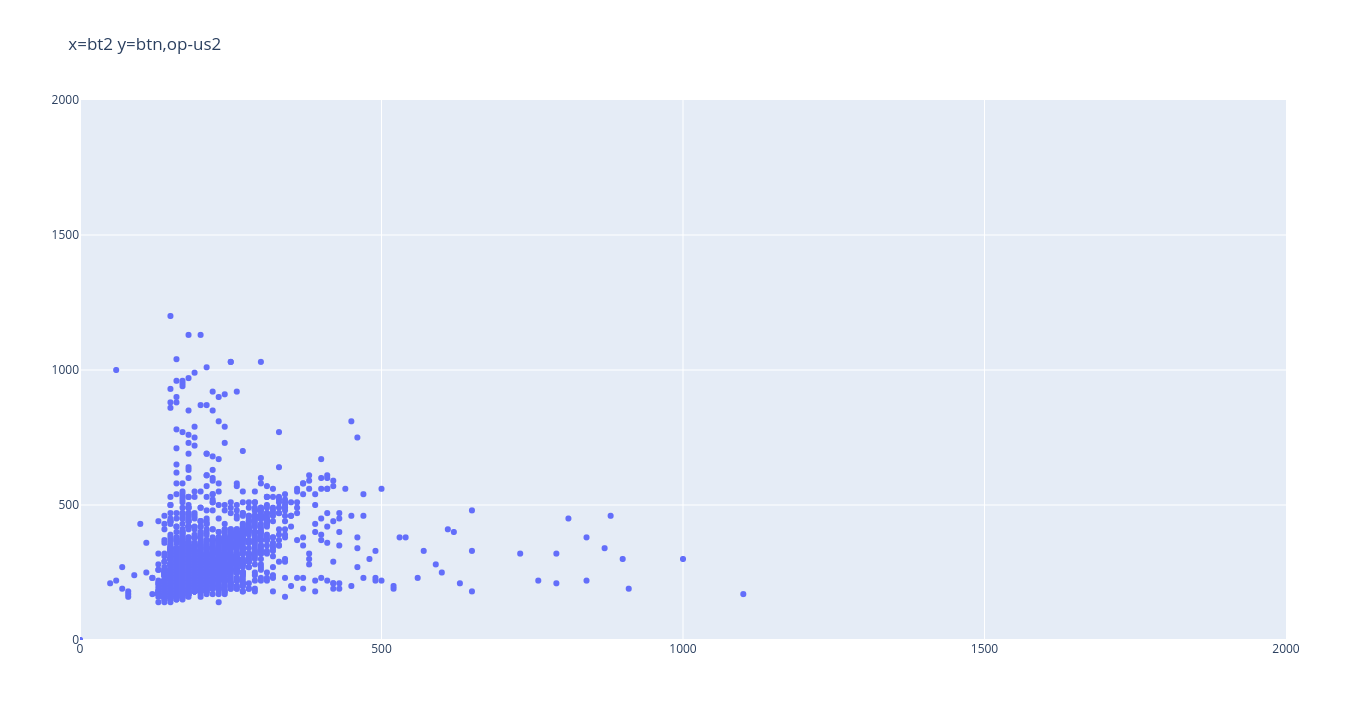

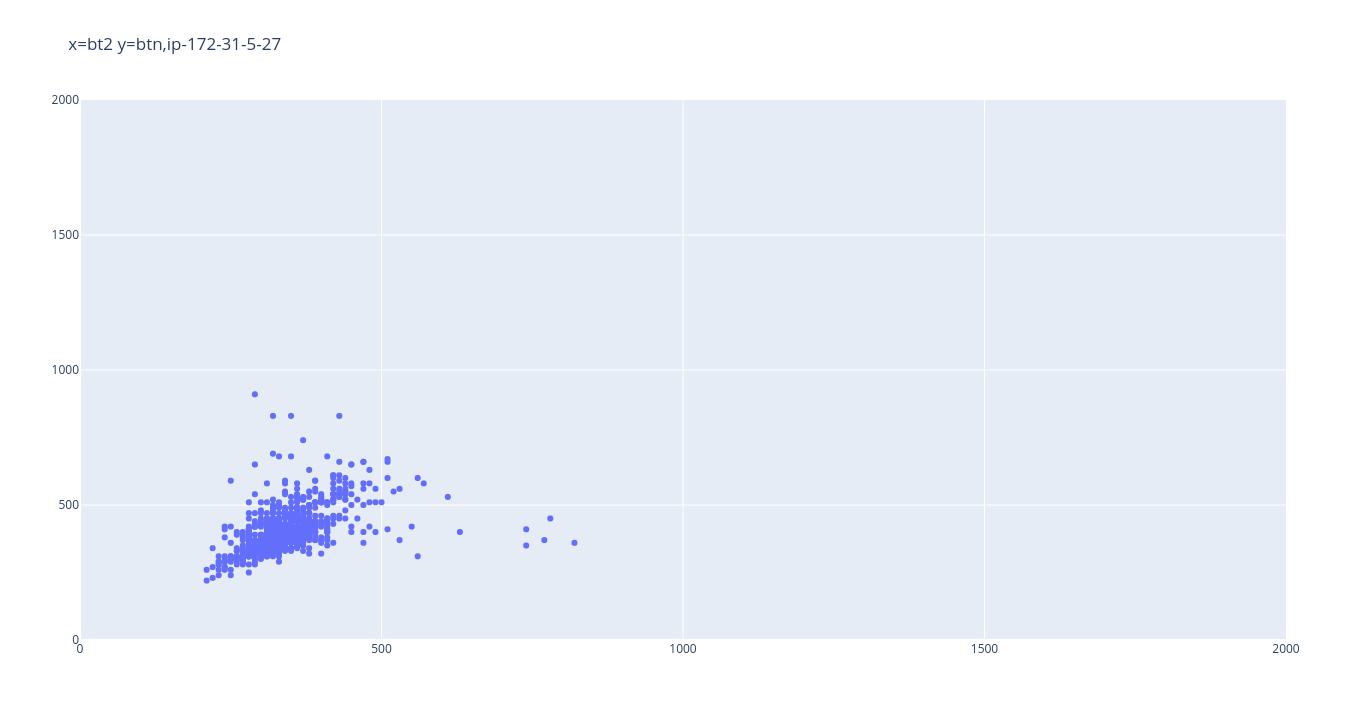

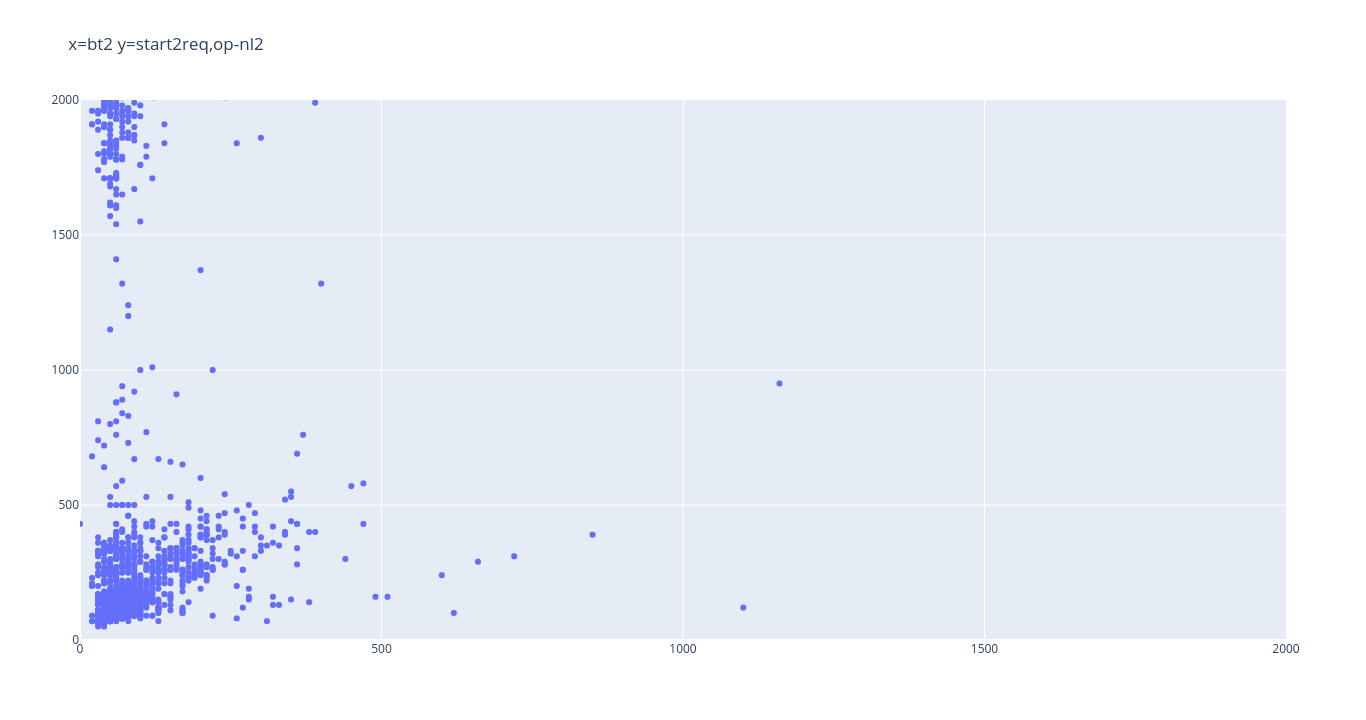

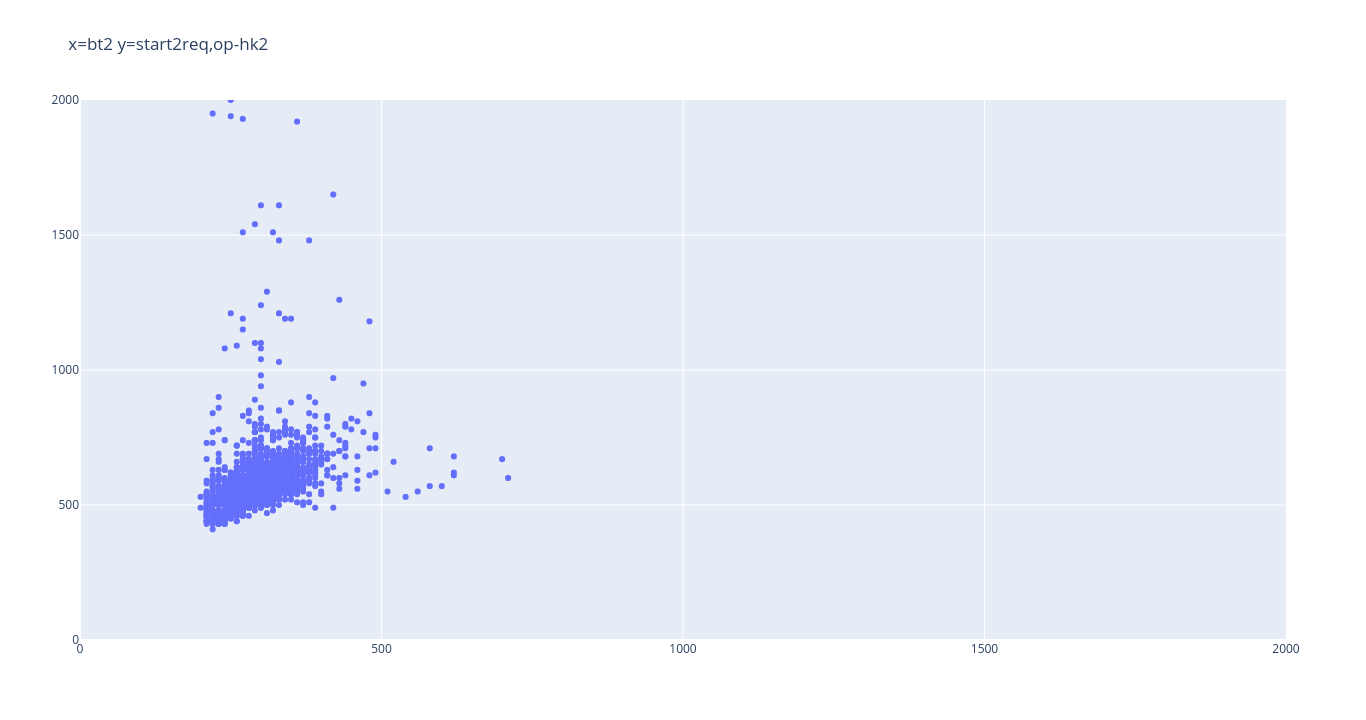

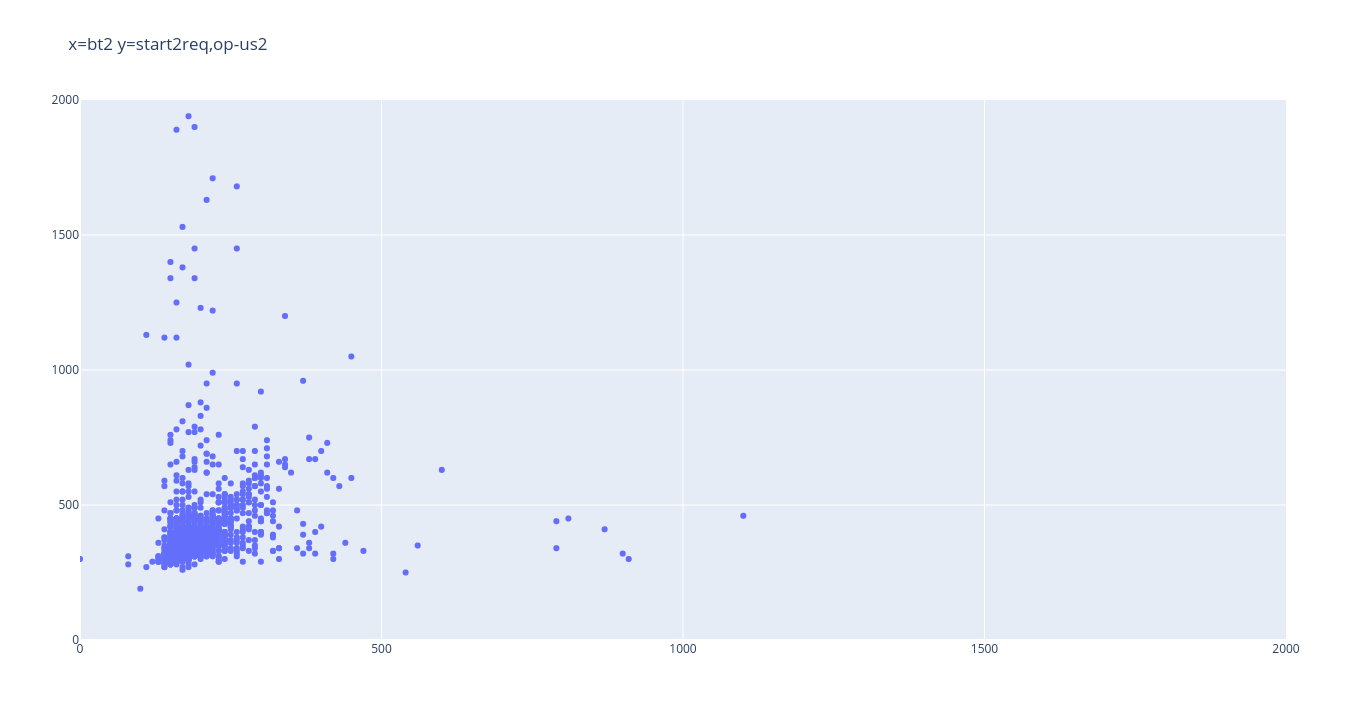

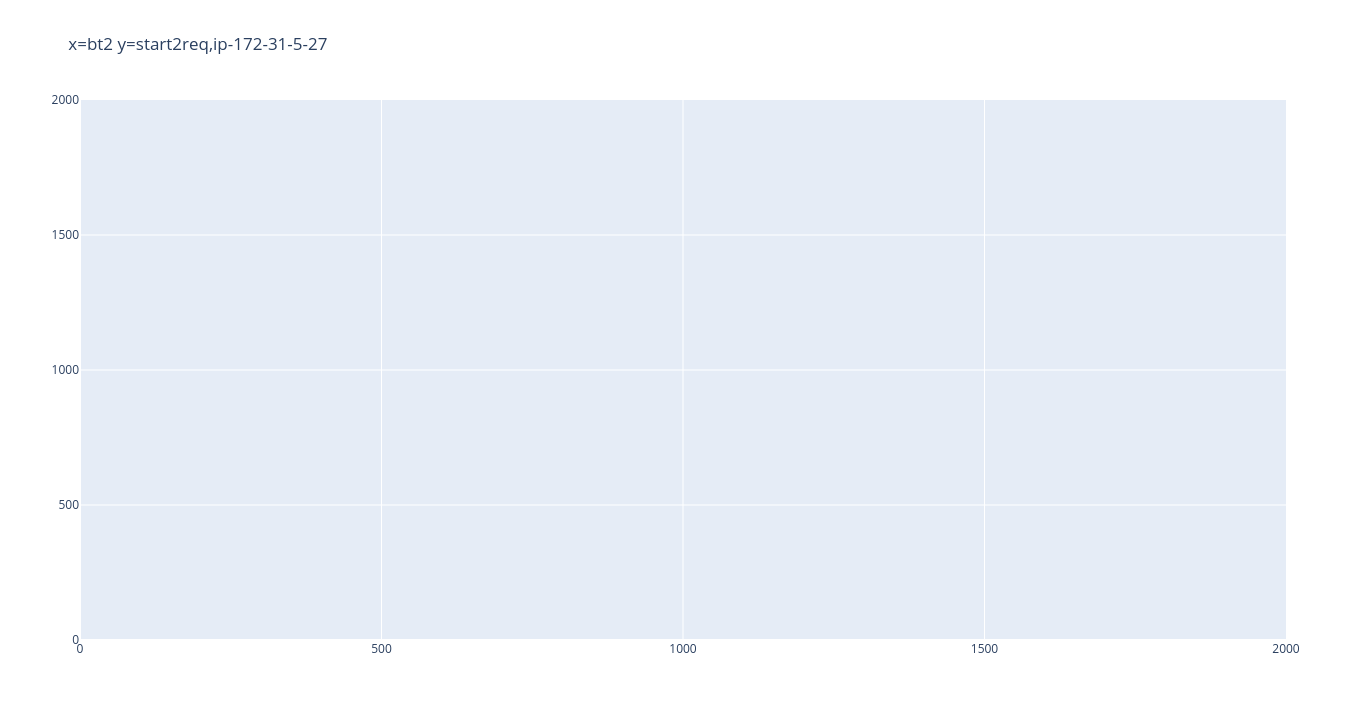

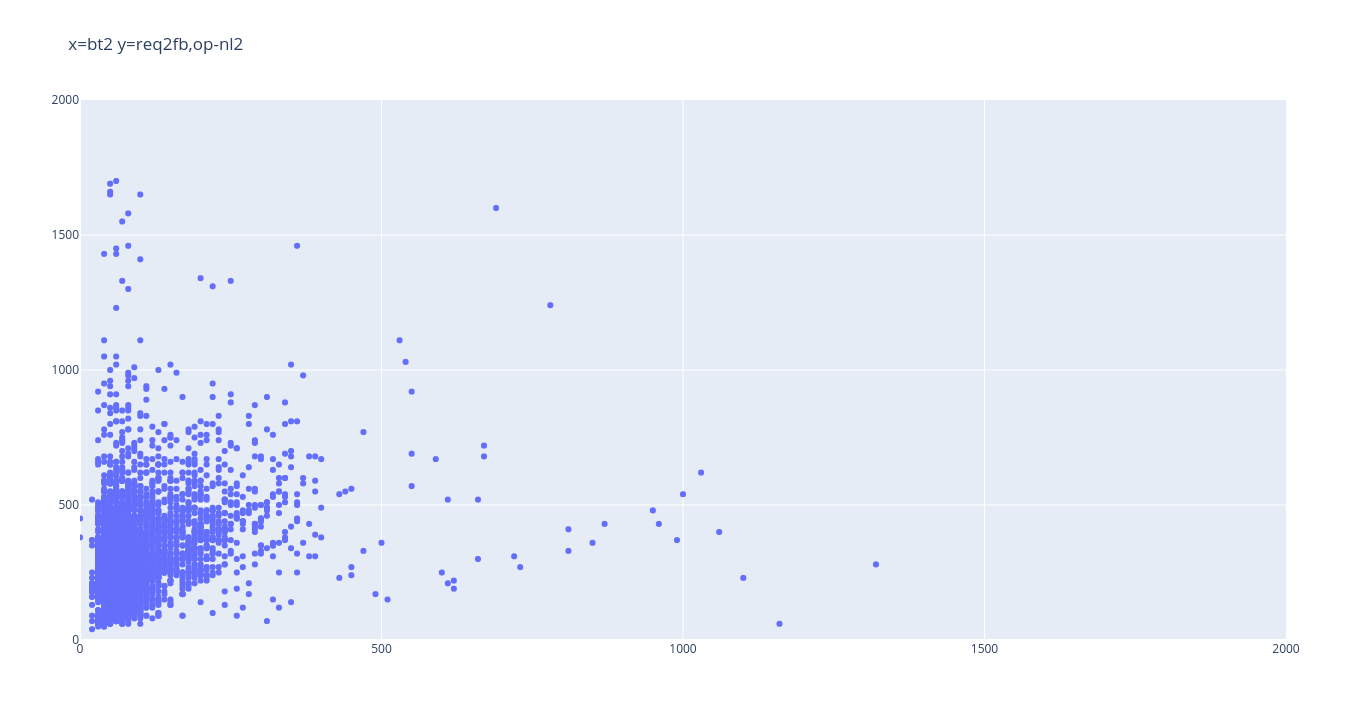

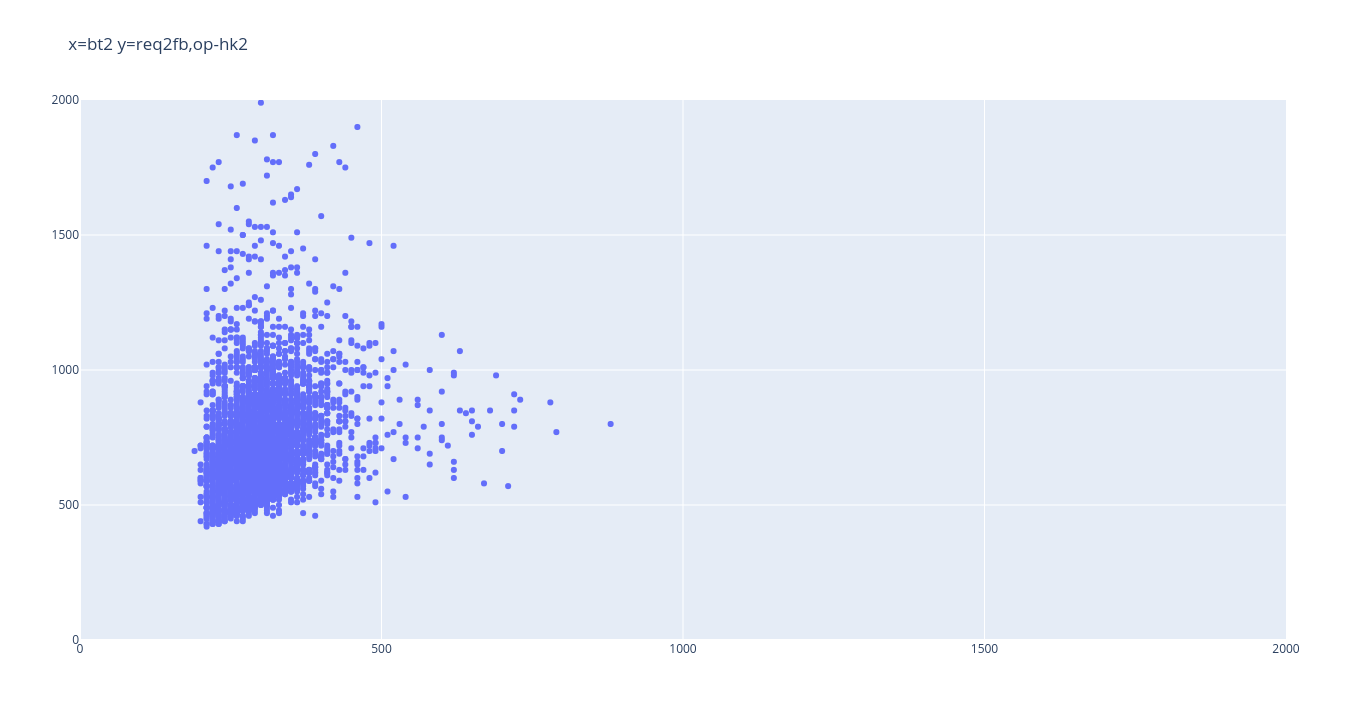

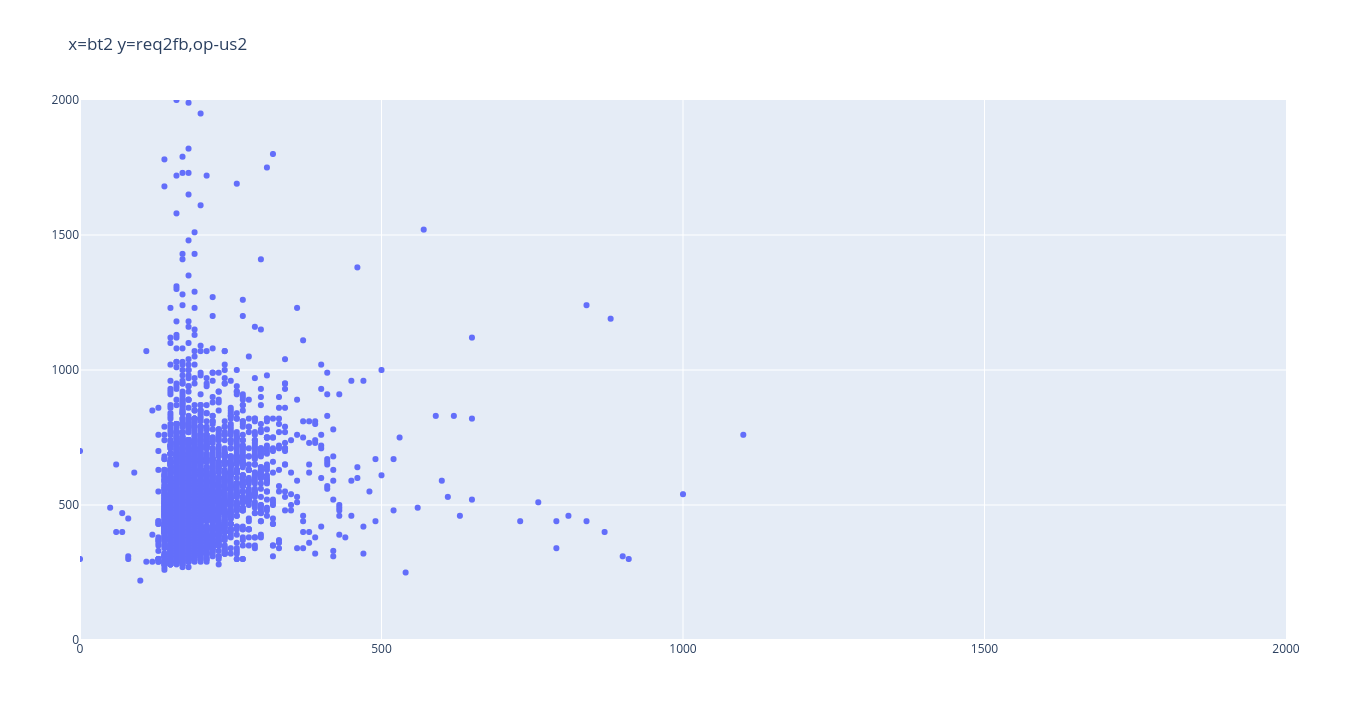

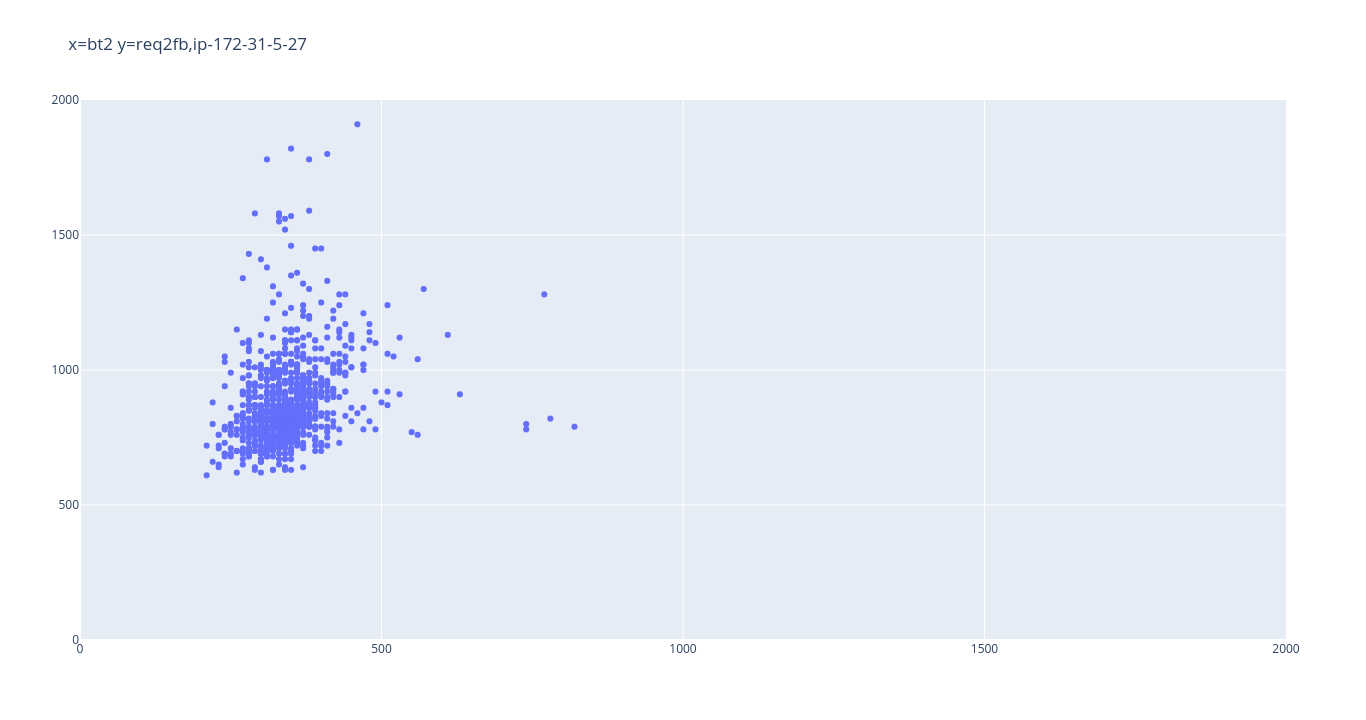

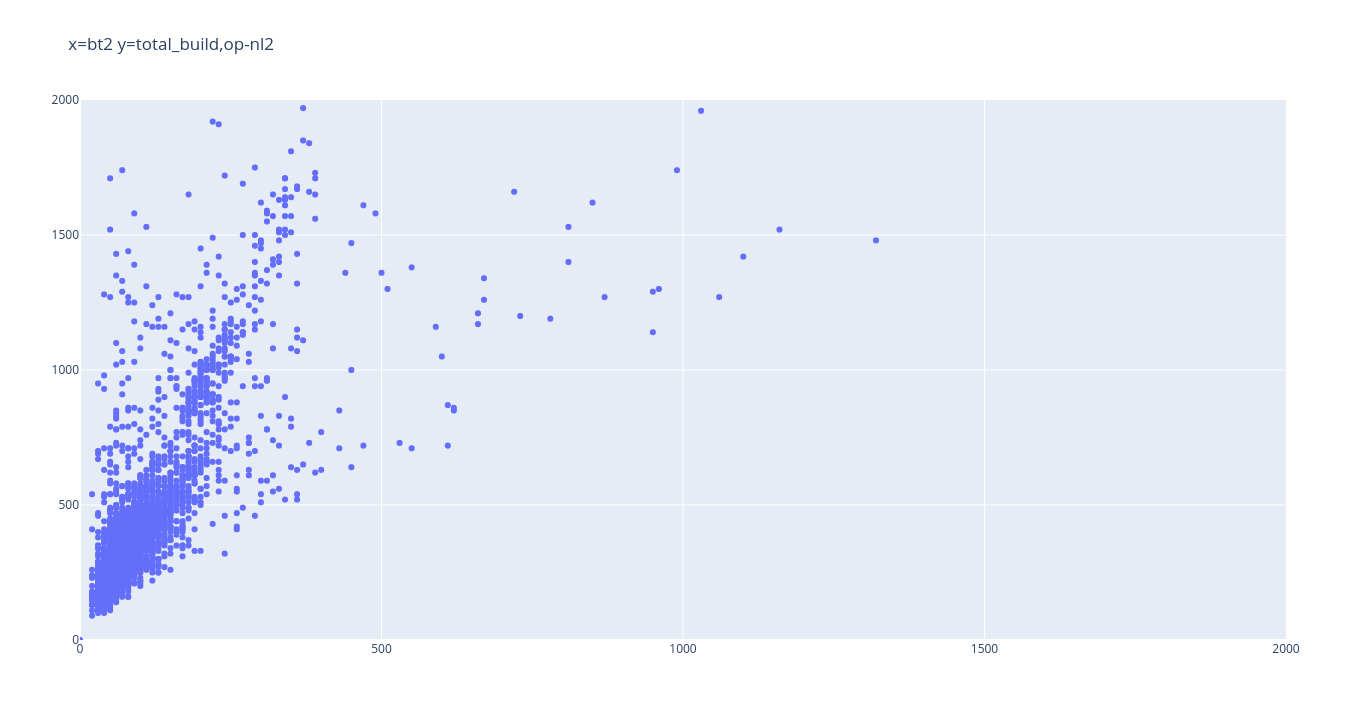

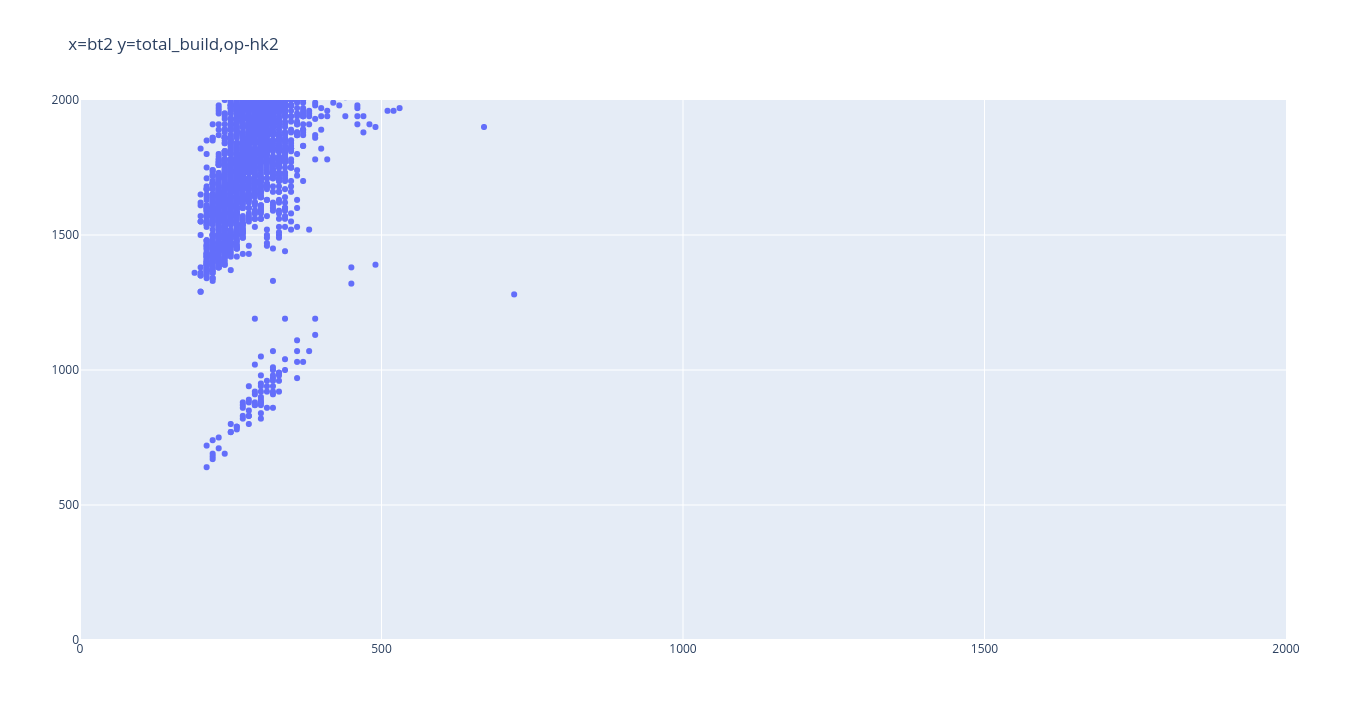

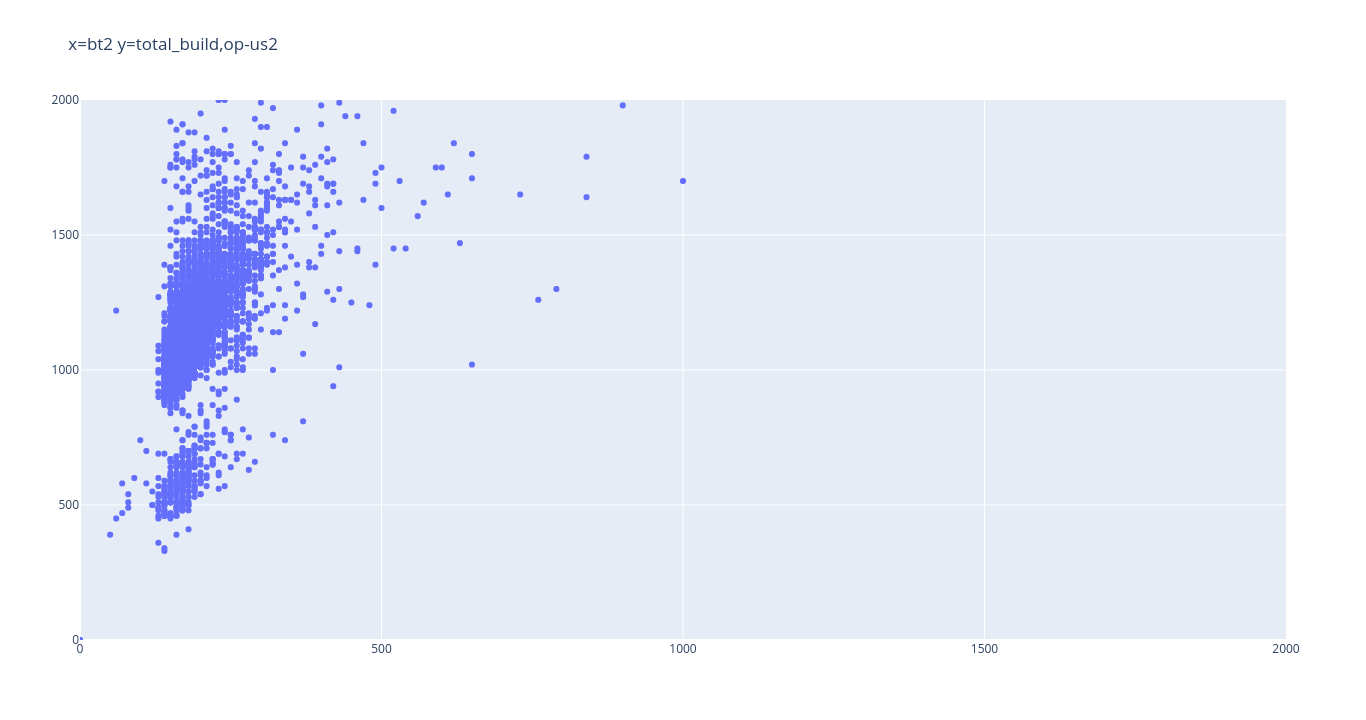

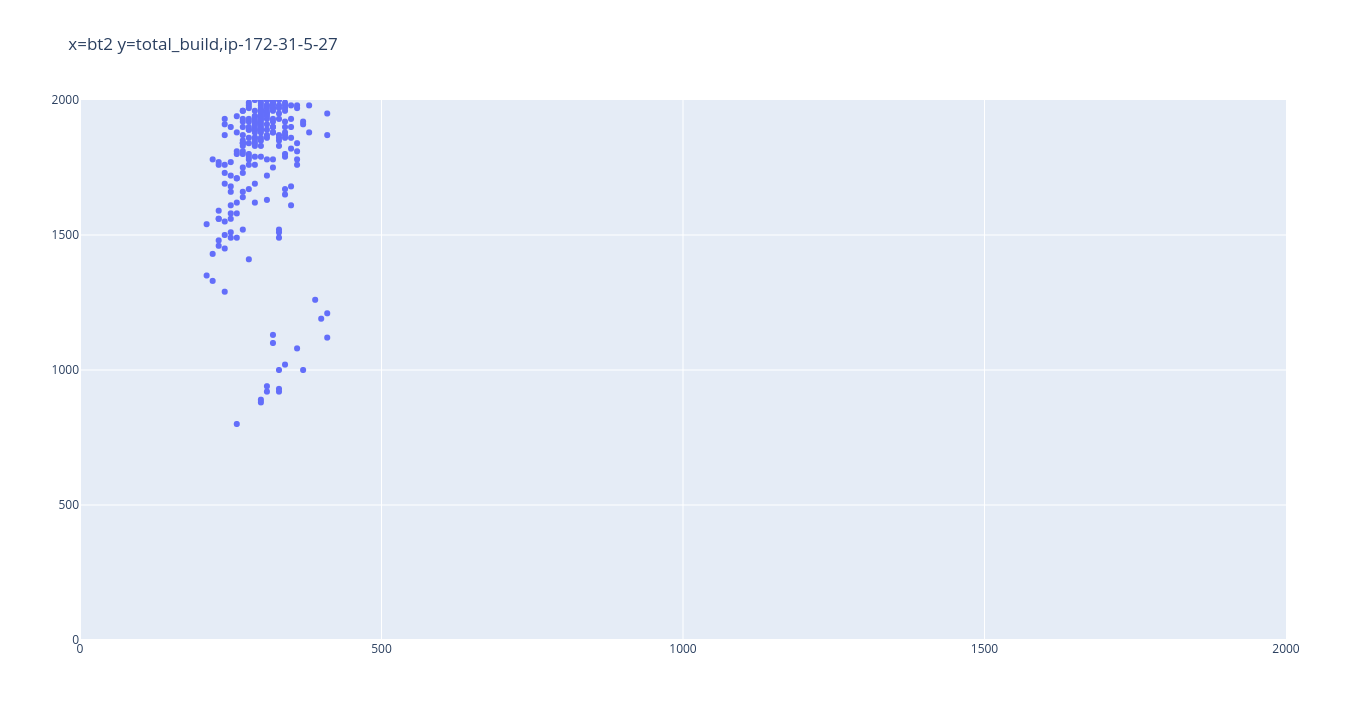

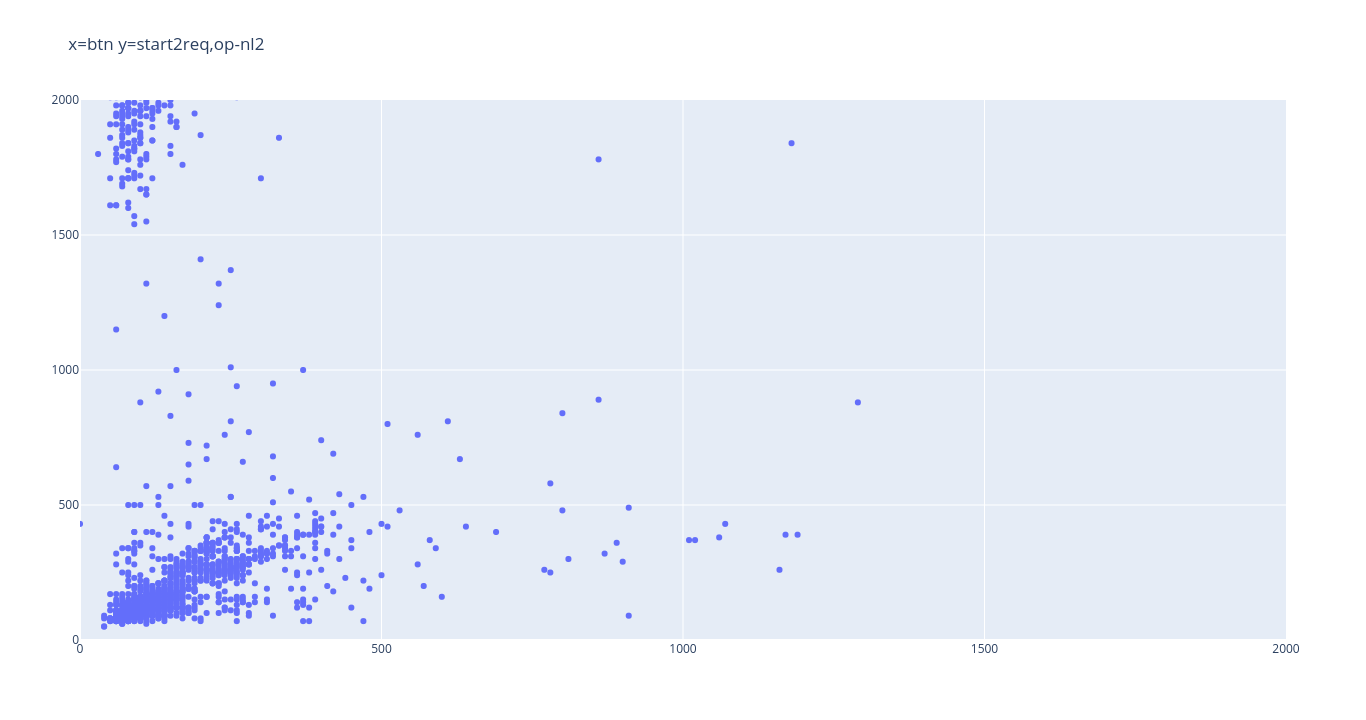

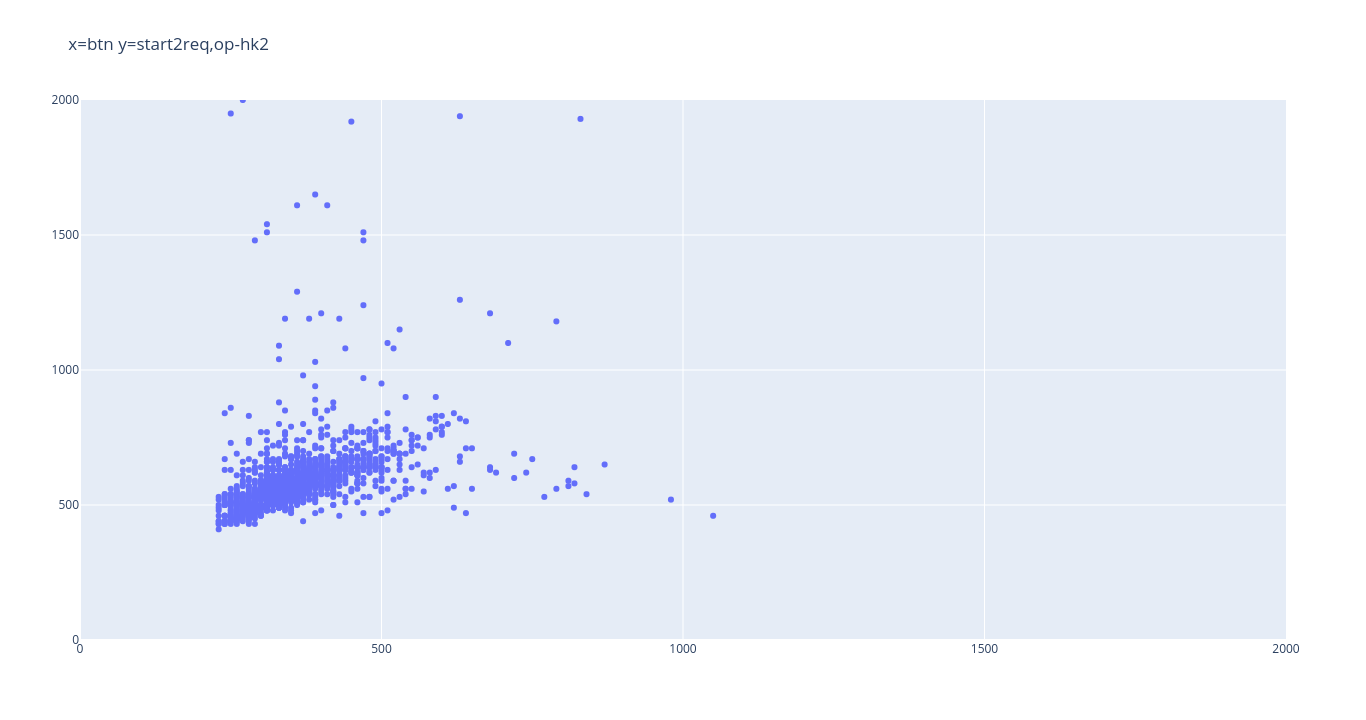

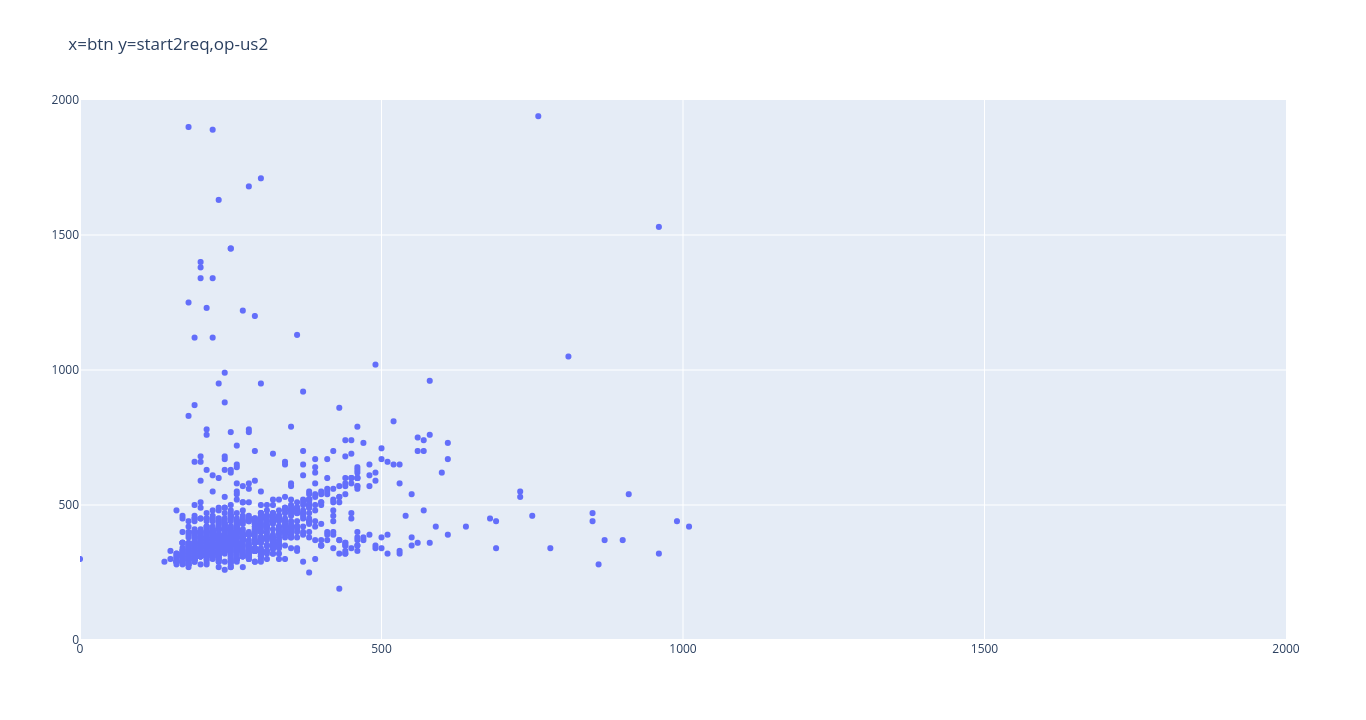

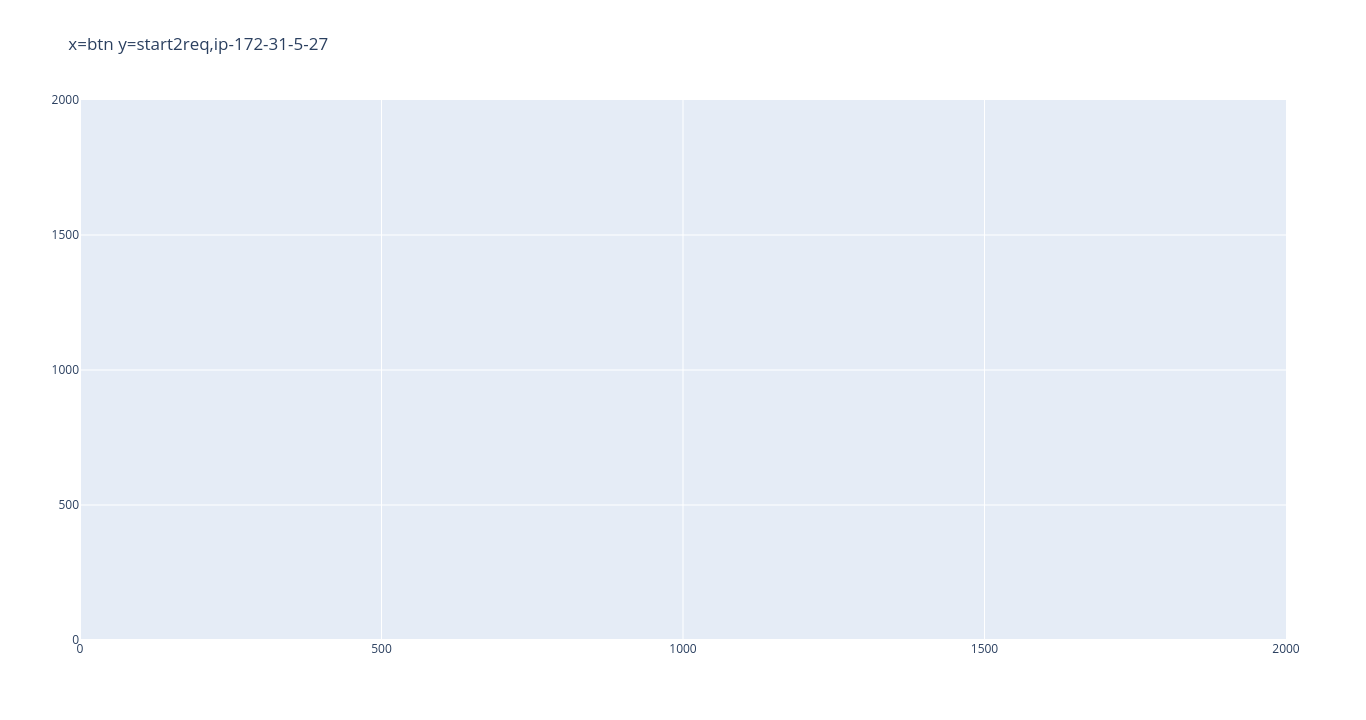

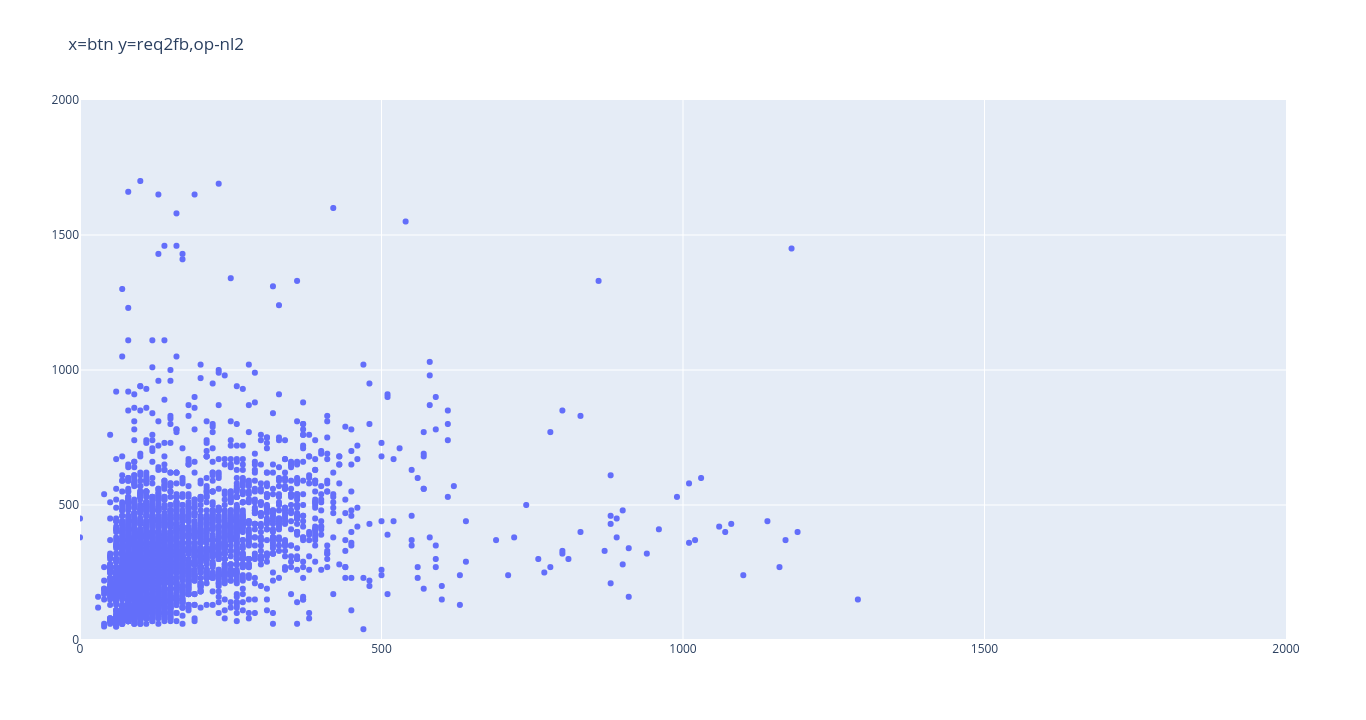

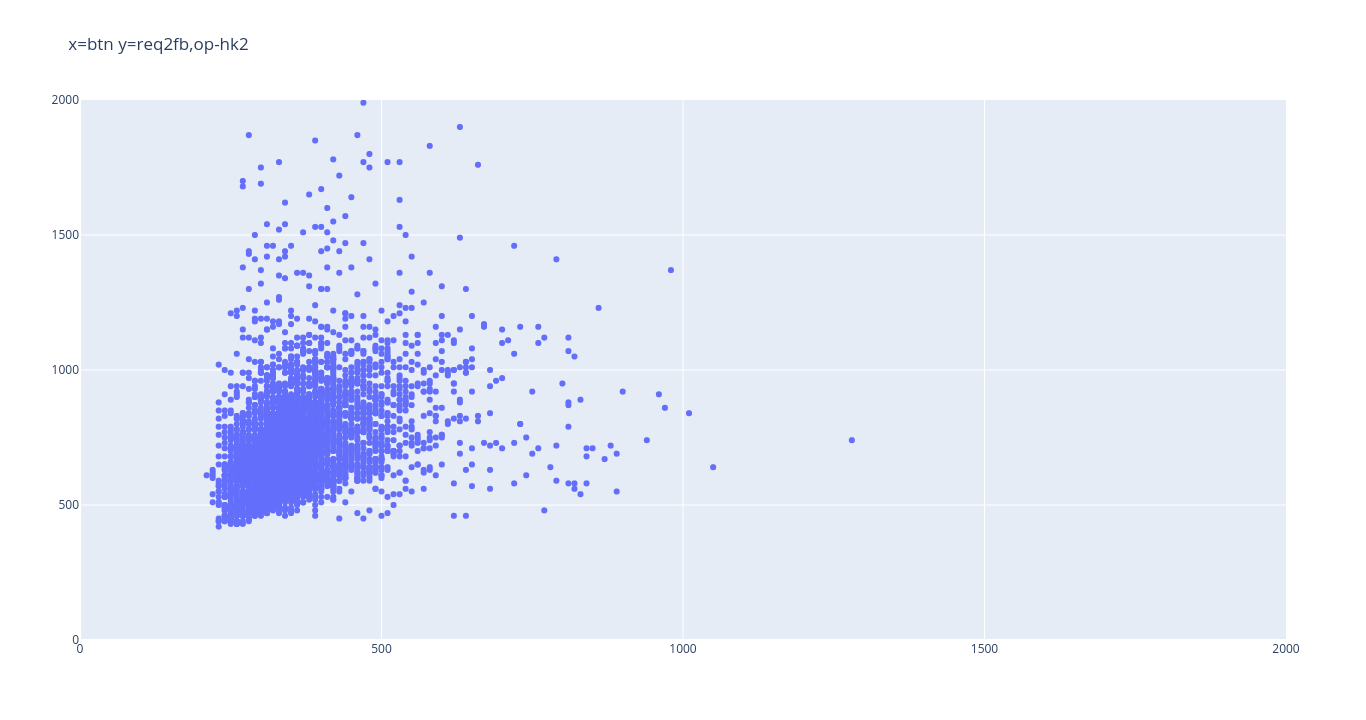

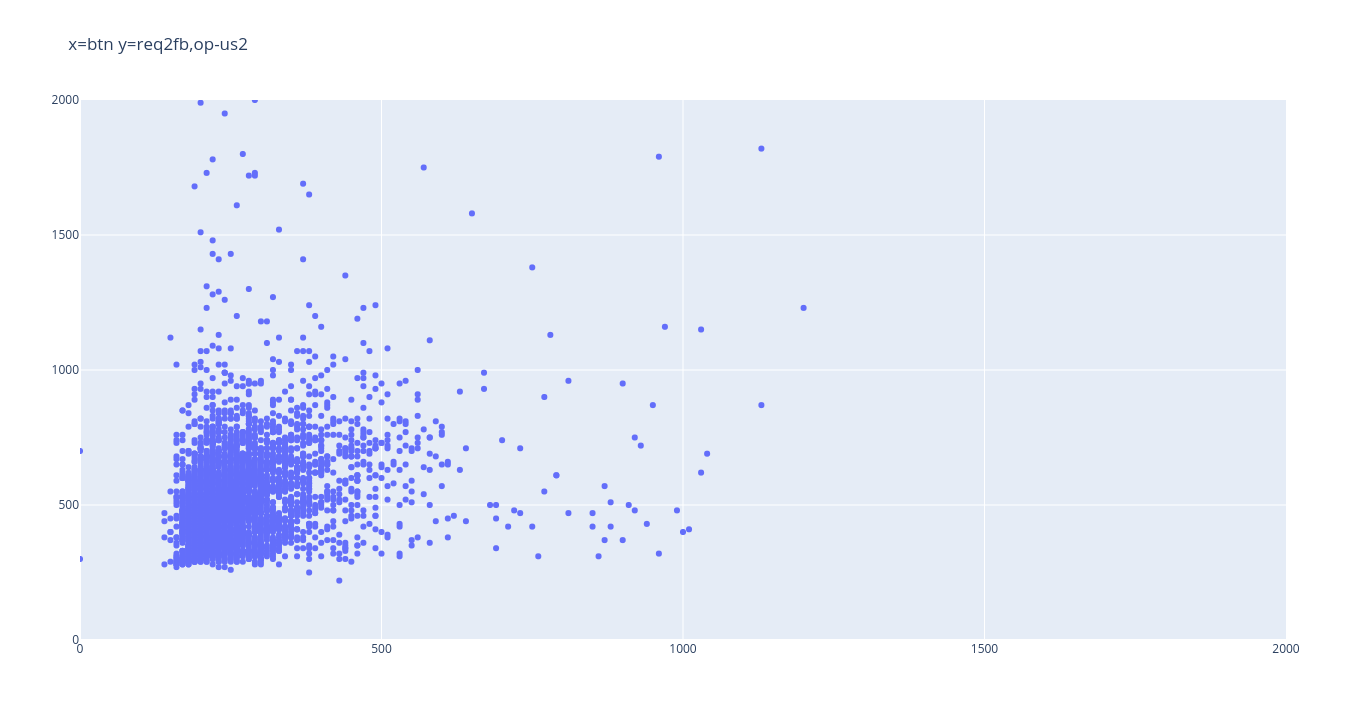

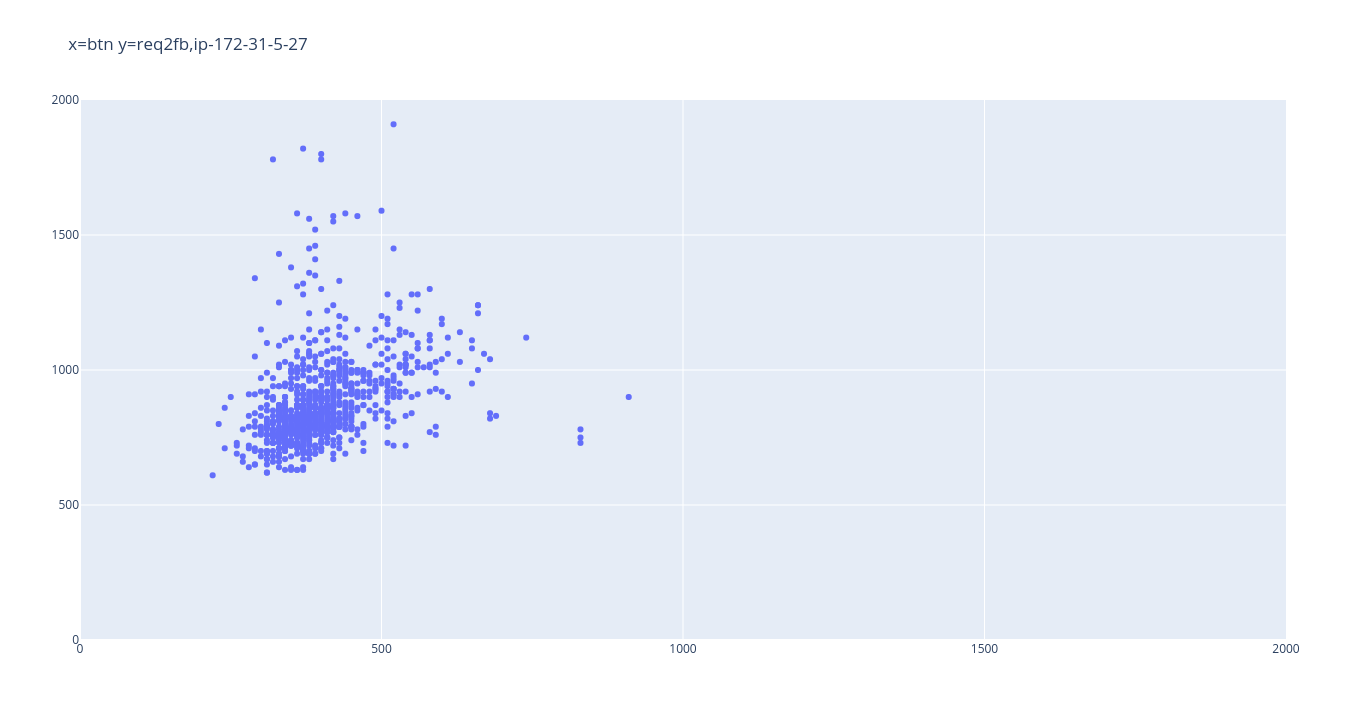

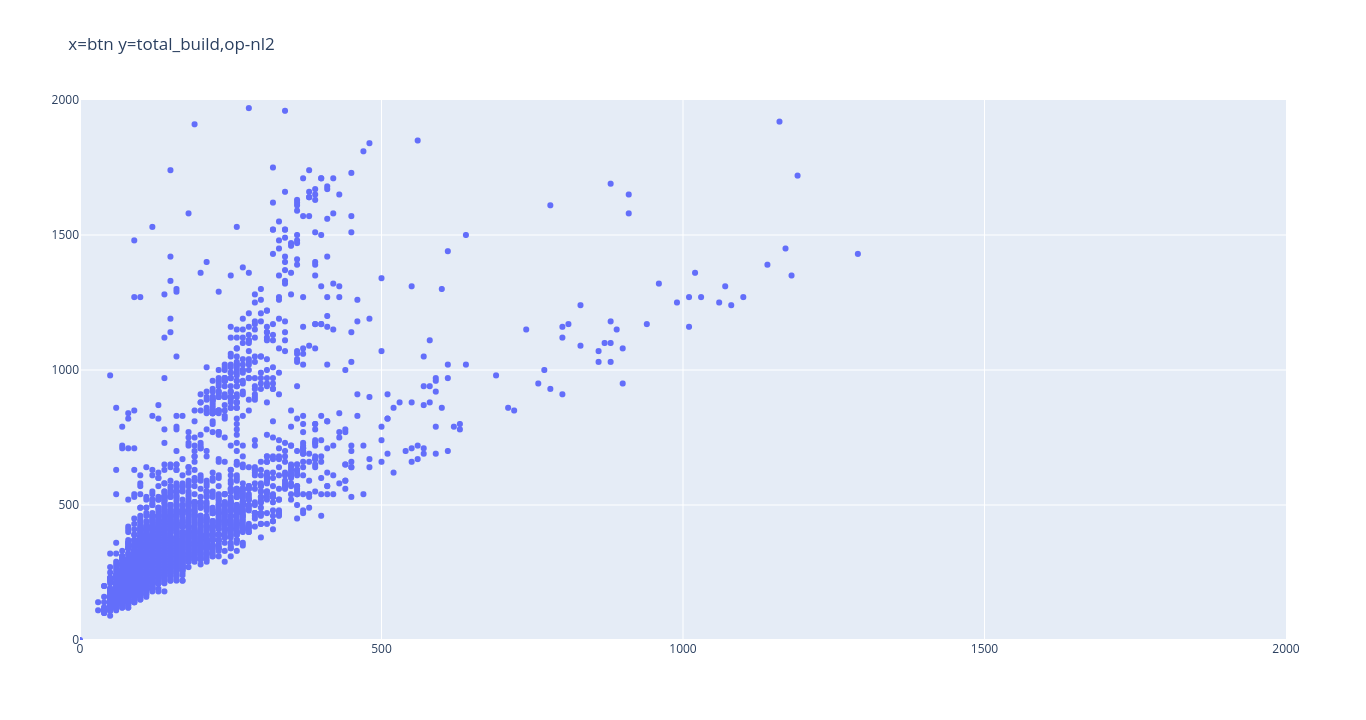

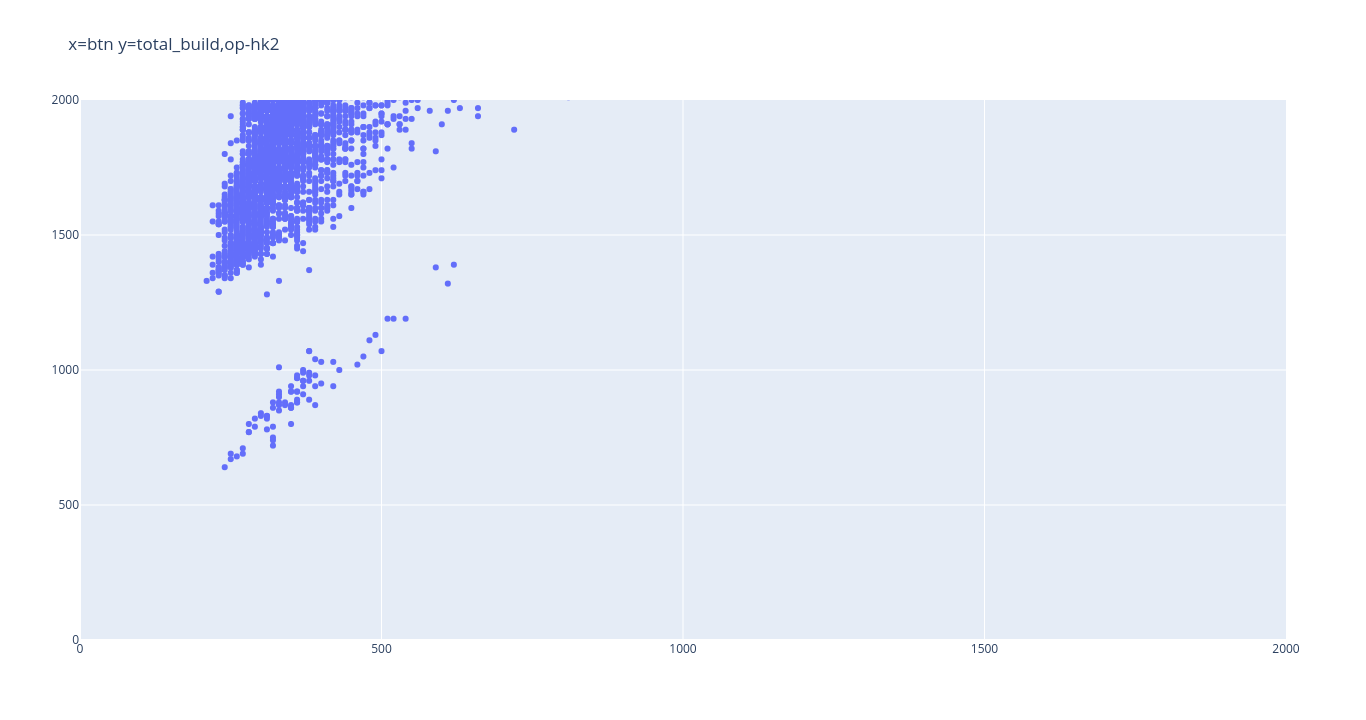

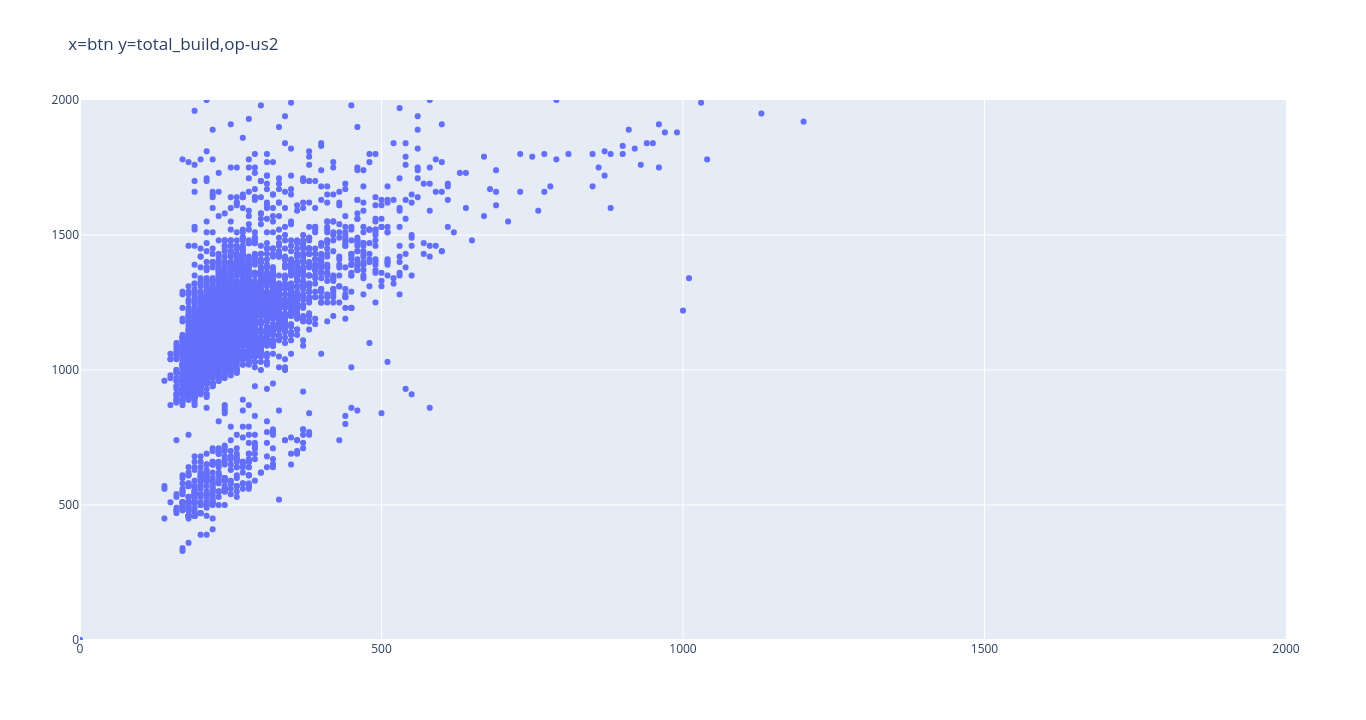

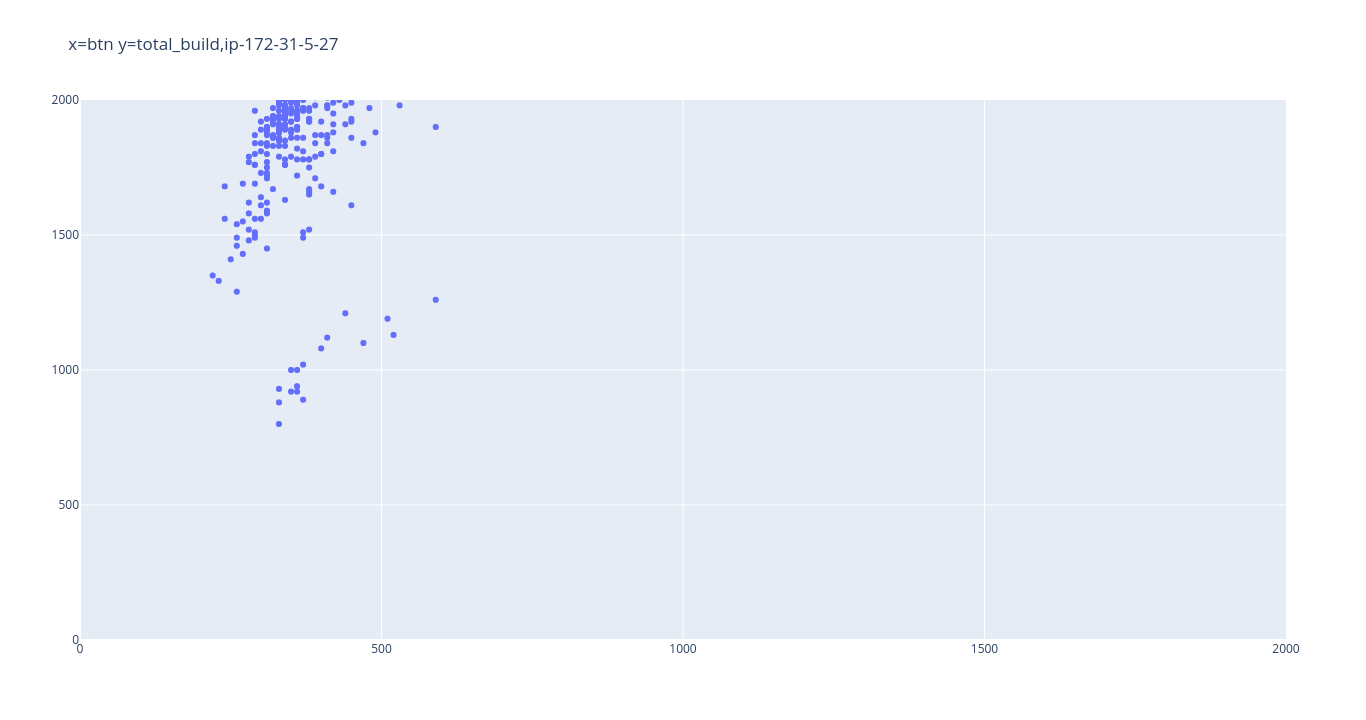

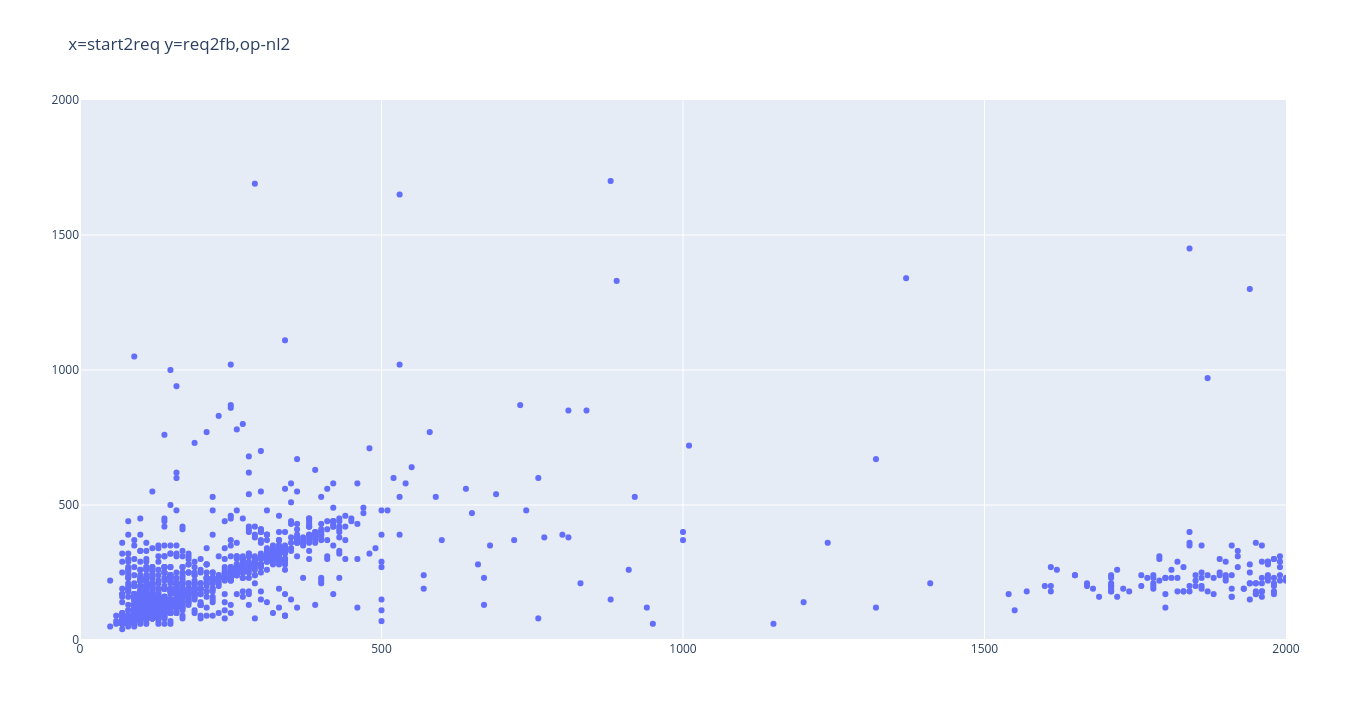

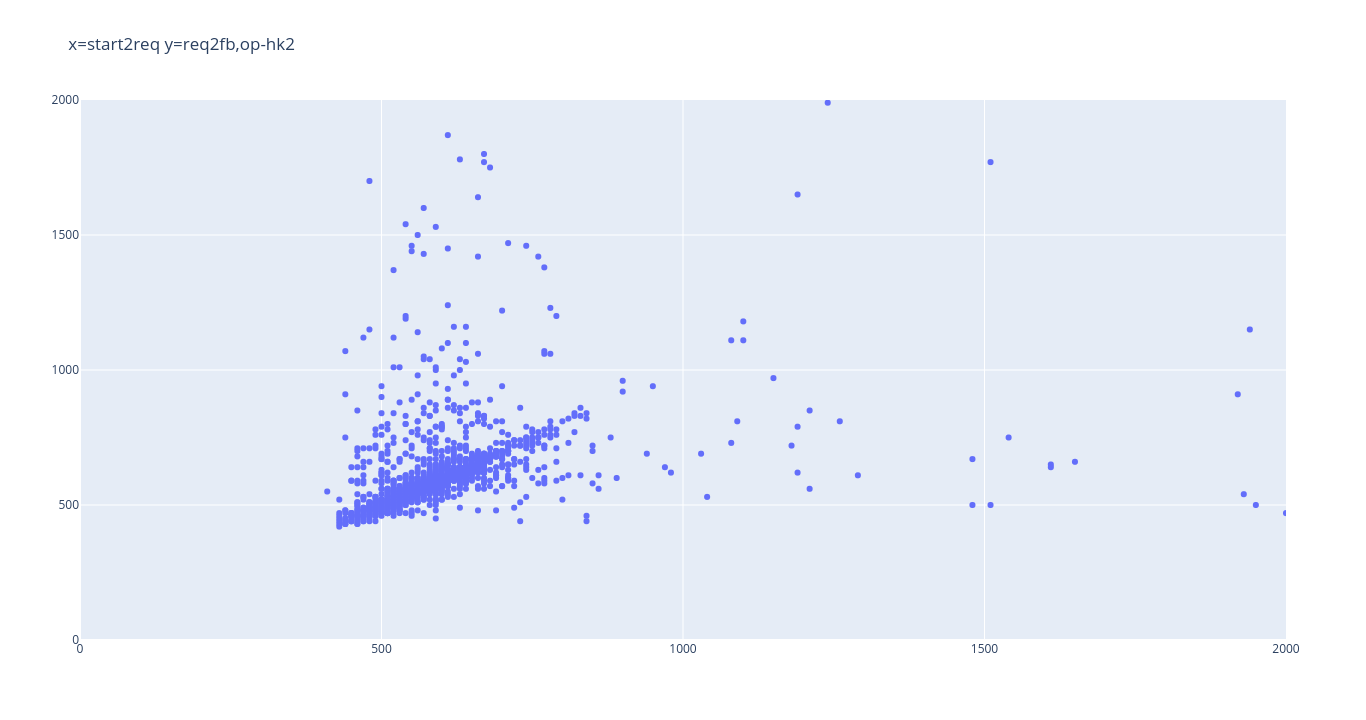

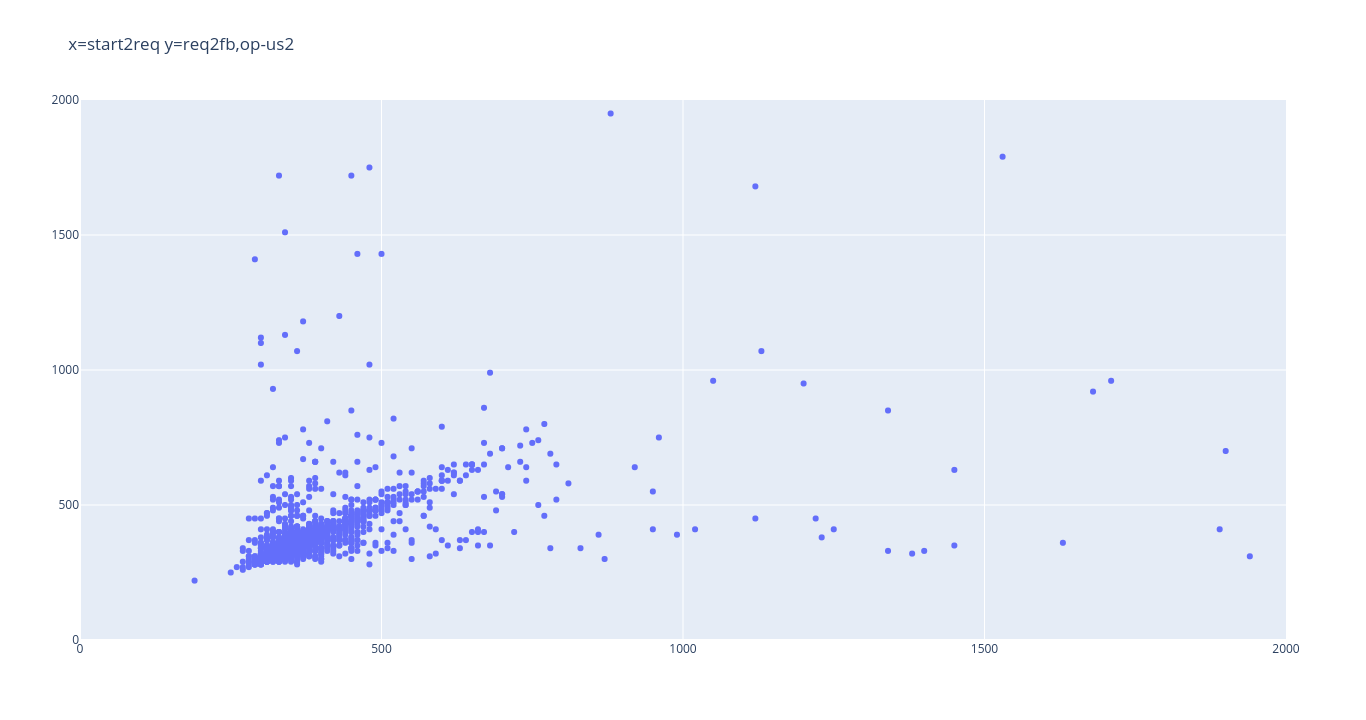

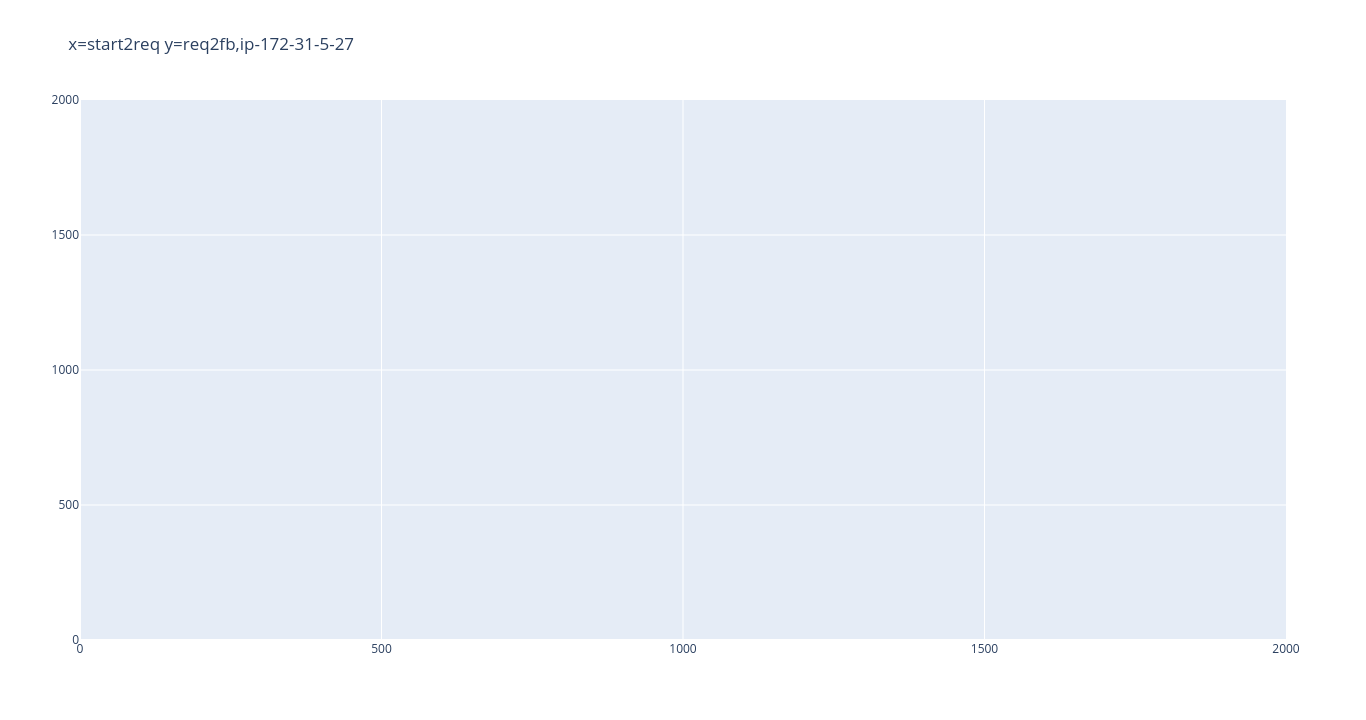

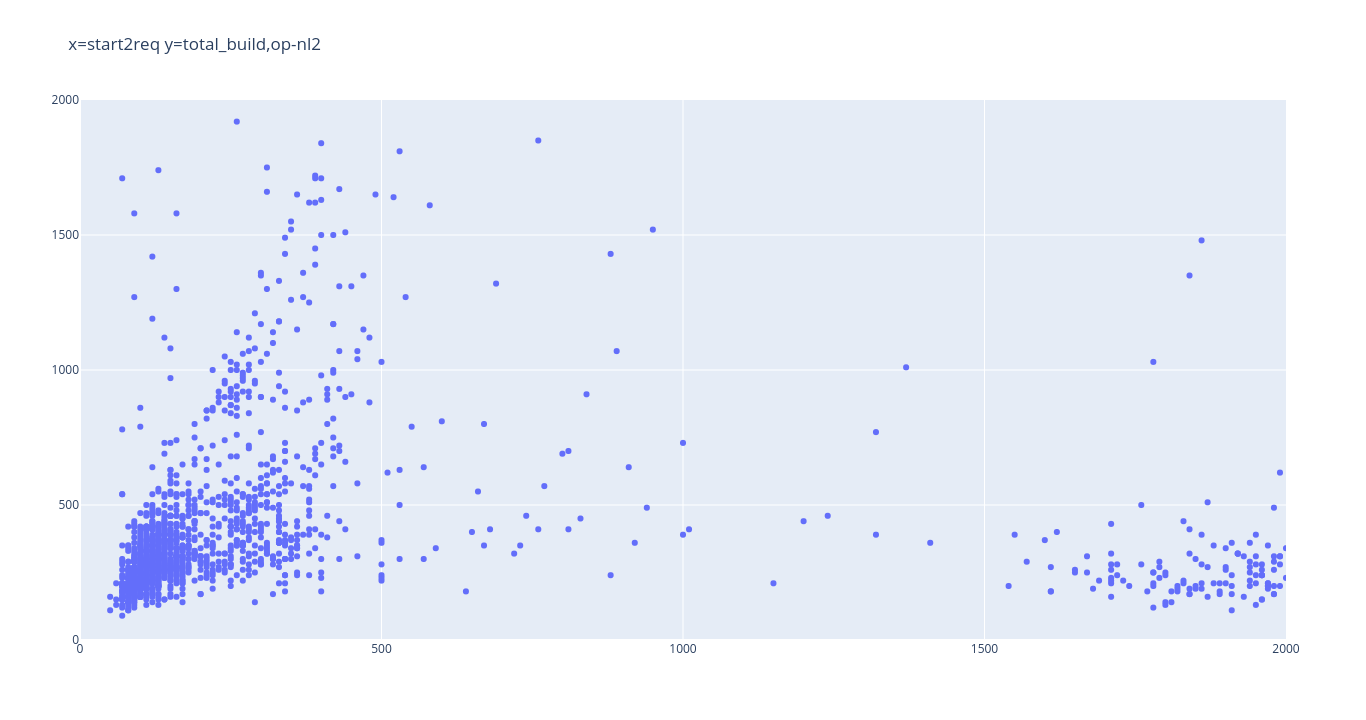

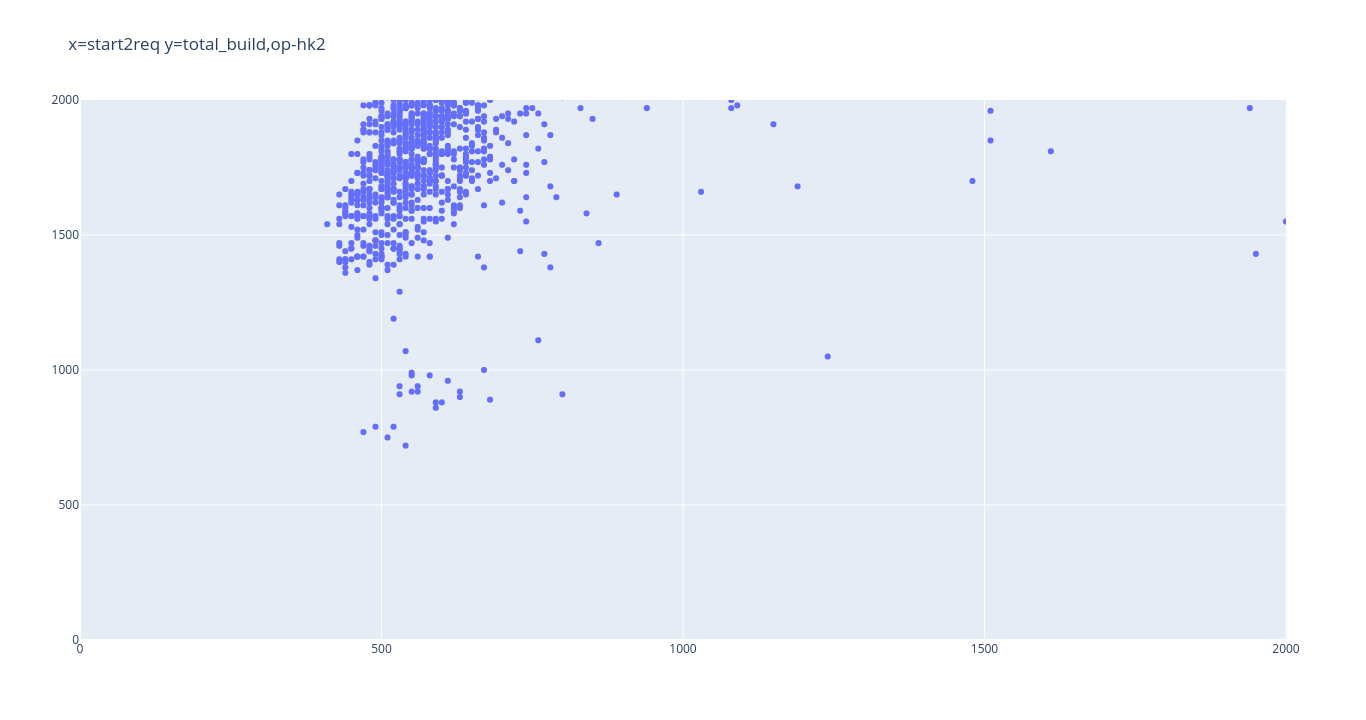

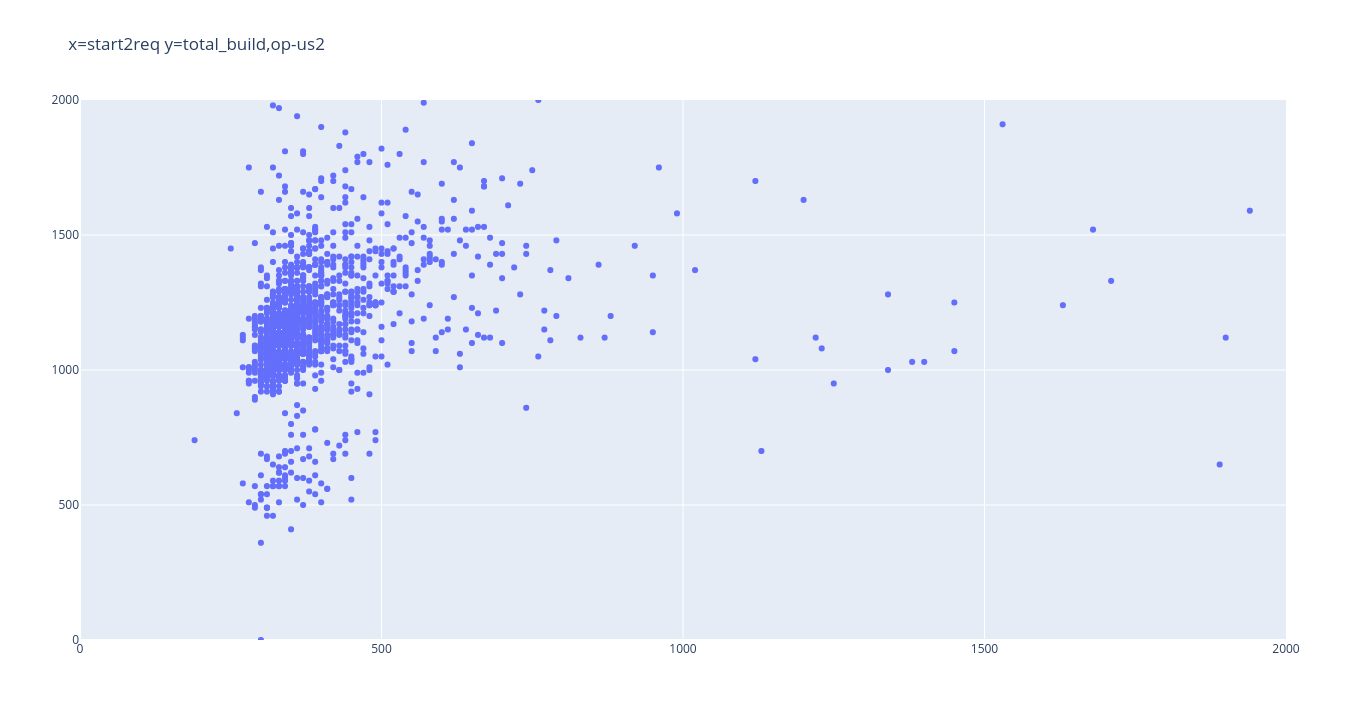

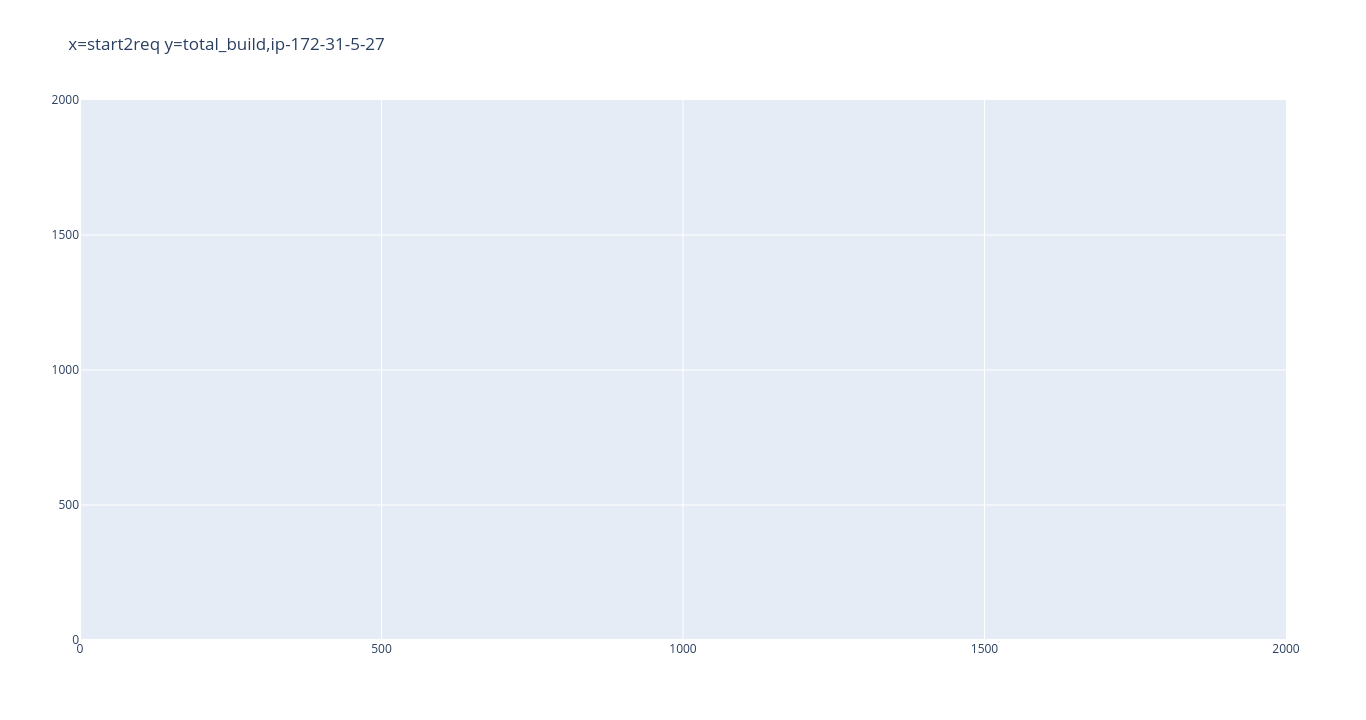

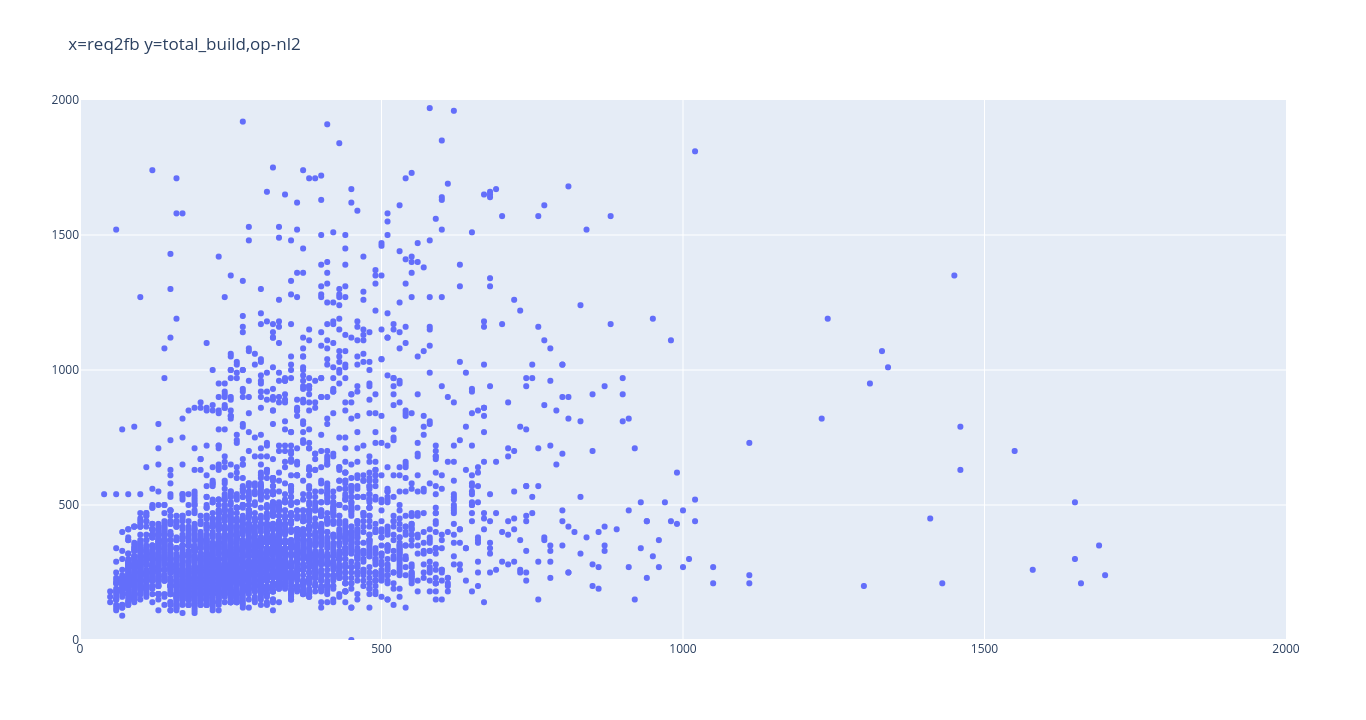

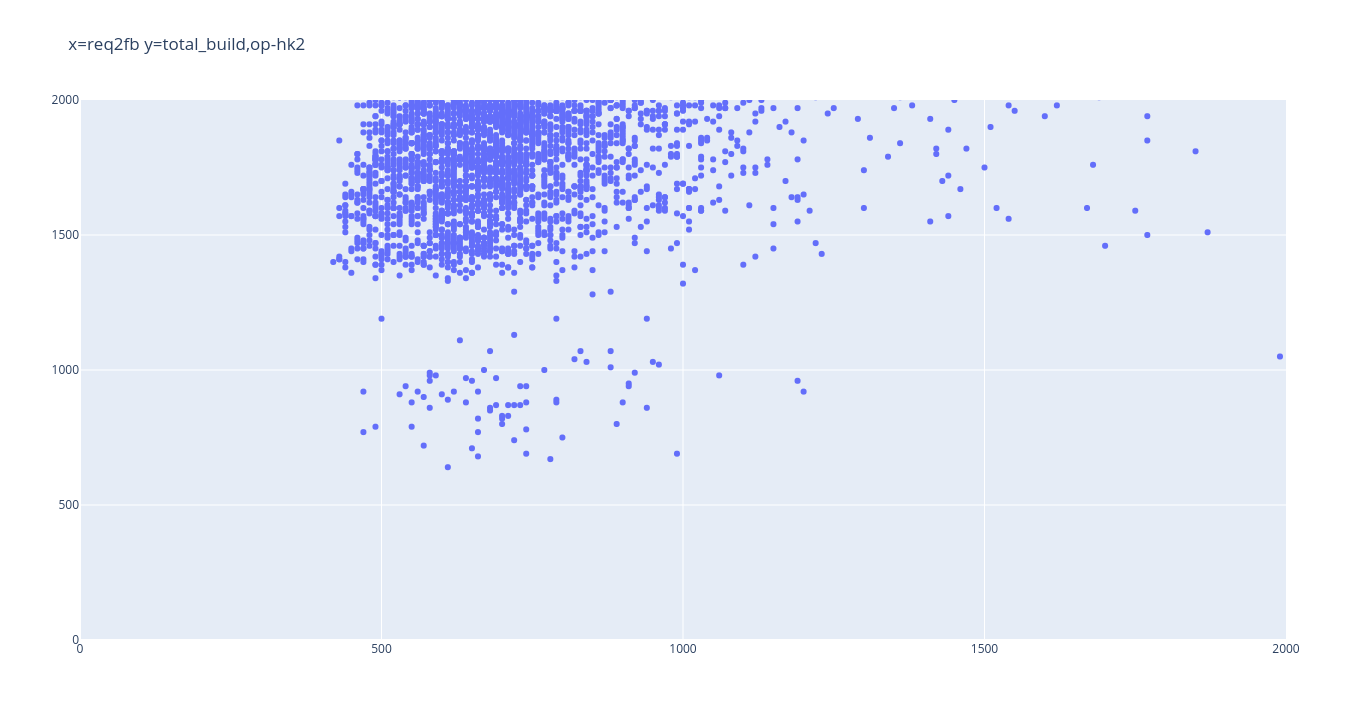

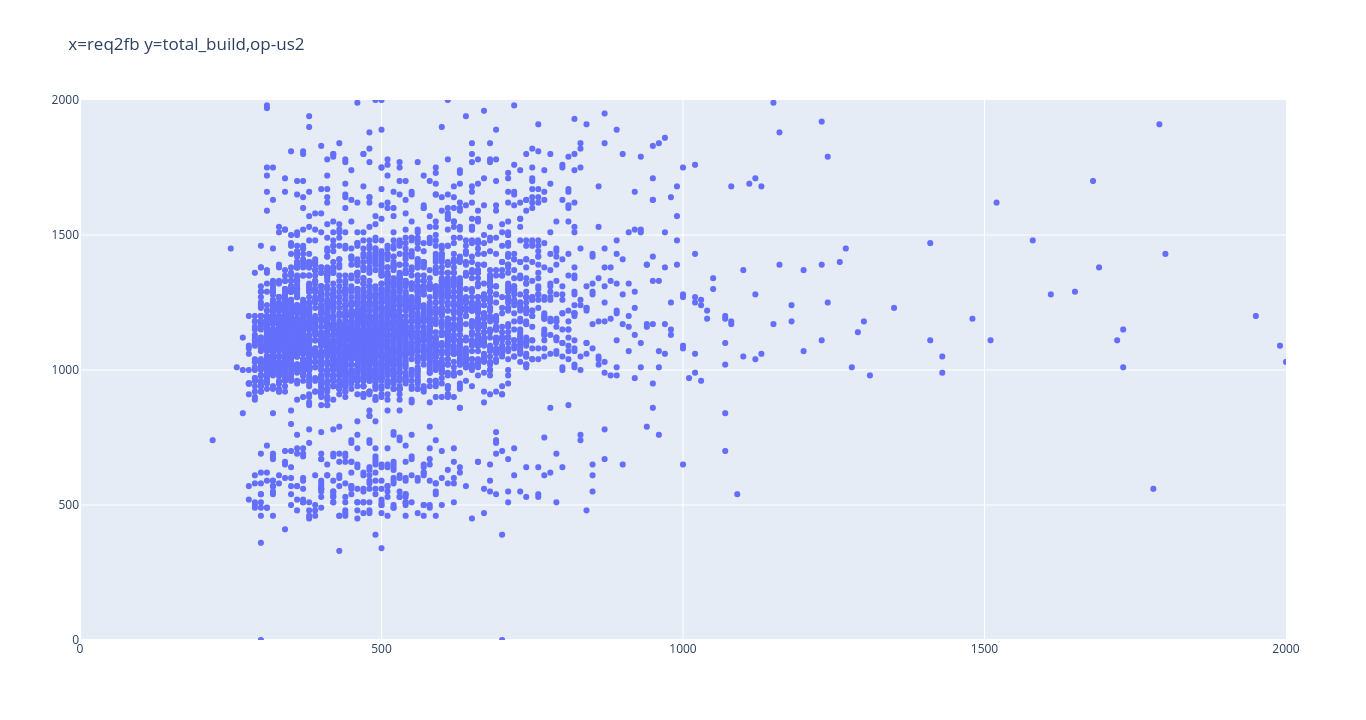

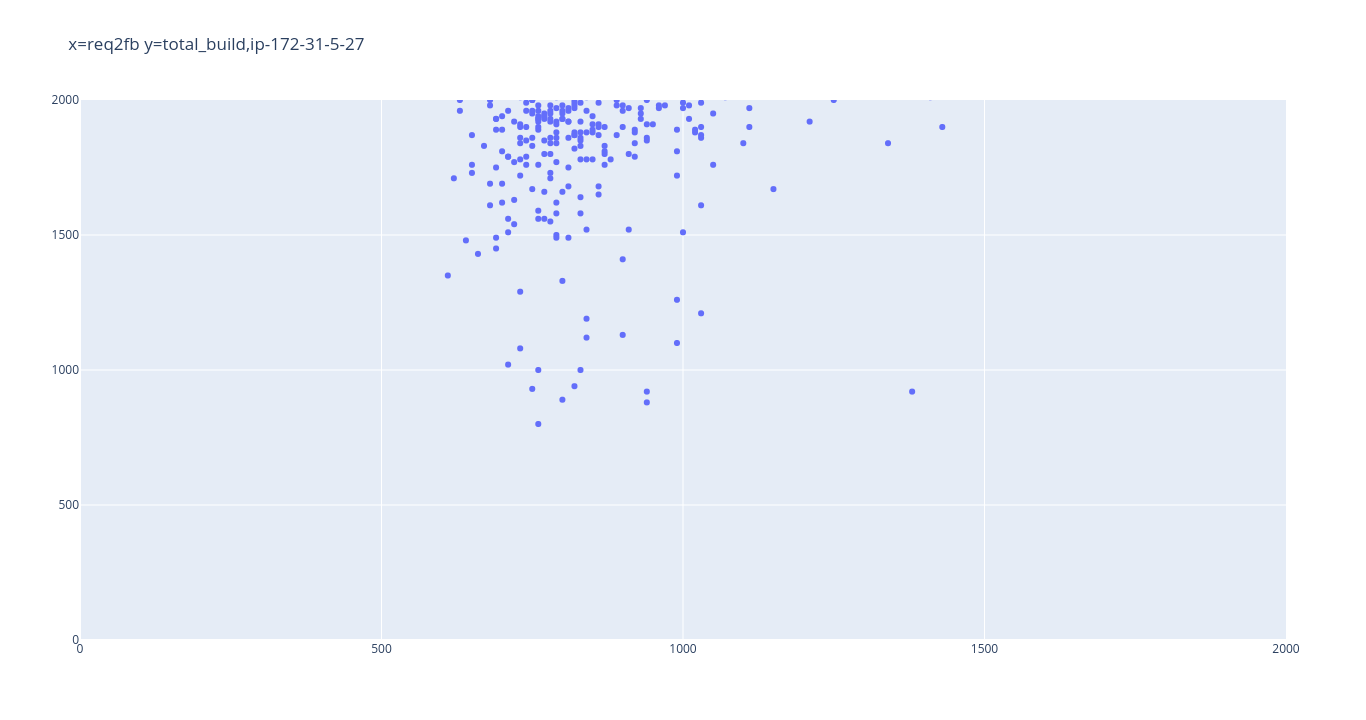

Created 60 scatter graphs


In [4]:
#scatter

if not os.path.exists("images/scatter"):
    os.mkdir("images/scatter")


values = ['bt1','bt2','btn','start2req','req2fb','total_build']

count = 0
already_done = list()
for k1 in values:
    for k2 in values:
        if set([k1,k2]) in already_done:
            continue
        else:
            already_done.append(set([k1,k2]))
        if k1 == k2:
            continue
        for s in sources:
            count += 1
            server_measurements = [x for x in measurements if x['source'] == s]
            x=[int(x[k1]) for x in server_measurements]
            y = [int(x[k2]) for x in server_measurements]
            fig = go.Figure([go.Scatter(x=x,y=y,mode='markers')])
            fig.update_layout(title_text=f"x={k1} y={k2},{s}")
            fig.update_xaxes(range=[0,2000])
            fig.update_yaxes(range=[0,2000])
            byt = fig.to_image(format="png",width=1366,height=720)
            fig.write_image(f"images/scatter/{k1}_{k2}_{s}.png",format="png",width=1366,height=720)
            display(Image(byt))
            
print(f"Created {count} scatter graphs")

In [5]:
#Check Correlations

import scipy.stats
import numpy as np


circuits = ['public','onion']
values = ['start2req','req2fb','total_build']

already_done = list()
results = list()
for k1 in values:
    for k2 in values:
        if set([k1,k2]) in already_done:
            continue
        else:
            already_done.append(set([k1,k2]))
        if k1 == k2:
            continue
        for c in circuits:
            for s in sources:
                server_measurements = [x for x in measurements if x['source'] == s and x['server']==c]
                x=[int(x[k1]) for x in server_measurements]
                y = [int(x[k2]) for x in server_measurements]
                r= scipy.stats.spearmanr(x, y)
                results.append([f"{s},{c},{k1},{k2}",r[0]])

results.sort(key=lambda x: -abs(x[1]))                           
for r in results:
    print(r)
            

['op-nl2,public,start2req,req2fb', 0.6663782621968707]
['op-us2,public,start2req,req2fb', 0.6516485005115249]
['op-nl2,public,start2req,total_build', 0.6297887235661617]
['op-hk2,public,start2req,req2fb', 0.6262807105324466]
['ip-172-31-5-27,public,start2req,req2fb', nan]
['op-nl2,public,req2fb,total_build', 0.5314680670242597]
['op-nl2,onion,req2fb,total_build', 0.4868140884875895]
['op-hk2,public,start2req,total_build', 0.4421435991718628]
['op-us2,public,start2req,total_build', 0.43186586805012234]
['op-us2,public,req2fb,total_build', 0.4231599798026954]
['op-hk2,onion,req2fb,total_build', 0.36115525053999625]
['op-hk2,public,req2fb,total_build', 0.35395772056800157]
['op-us2,onion,req2fb,total_build', 0.3423980259990133]
['op-nl2,onion,start2req,req2fb', 0.3232570551972543]
['op-us2,onion,start2req,req2fb', 0.27044144121735336]
['ip-172-31-5-27,onion,start2req,req2fb', 0.23316606523479322]
['op-hk2,onion,start2req,req2fb', 0.22256596270882092]
['ip-172-31-5-27,public,start2req,tota